In [1]:
#Importing the necessary libraries which are used for the execution of Part 1
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#To prevent warnings being displayed
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore") #ignoring the warnings

In [3]:
headers = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
           'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
           'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
           'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
           'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']

In [4]:
train_data = pd.read_csv("KDDTrain+.txt", header=None)
train_data.columns = headers

In [5]:
#Checking the dimensions of the train_data dataframe
train_data.shape

(125973, 43)

In [6]:
#Printing the first 5 records of the train_data dataframe to get the essence of the data
train_data.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

    attack  level  
0   normal     20  
1   normal     15  
2  neptune     19  
3   normal     21  
4   normal     21  

[5 rows x 43 columns]

In [7]:
#train_data.to_csv("train_data.csv",index=False)
handling_missing_values_dict = {}

In [8]:
#Getting to know the data types of each field in the train_data dataframe
train_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
#Checking if there are any null records in any of the fields in the dataset
train_data.isna().sum()>0

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

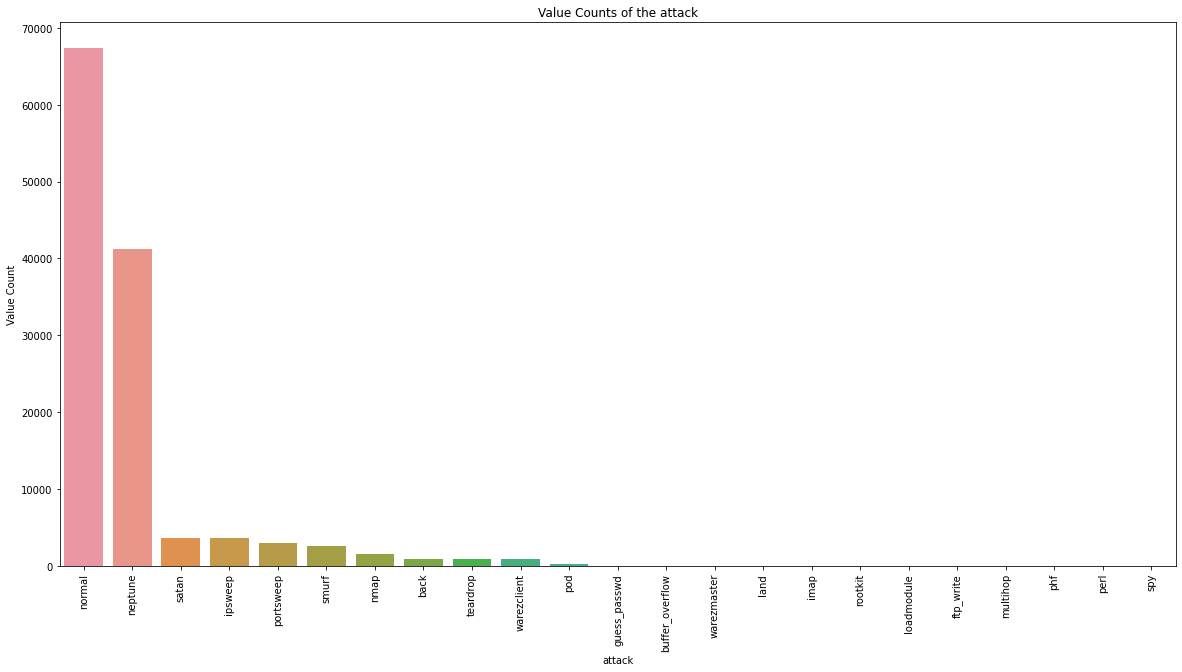

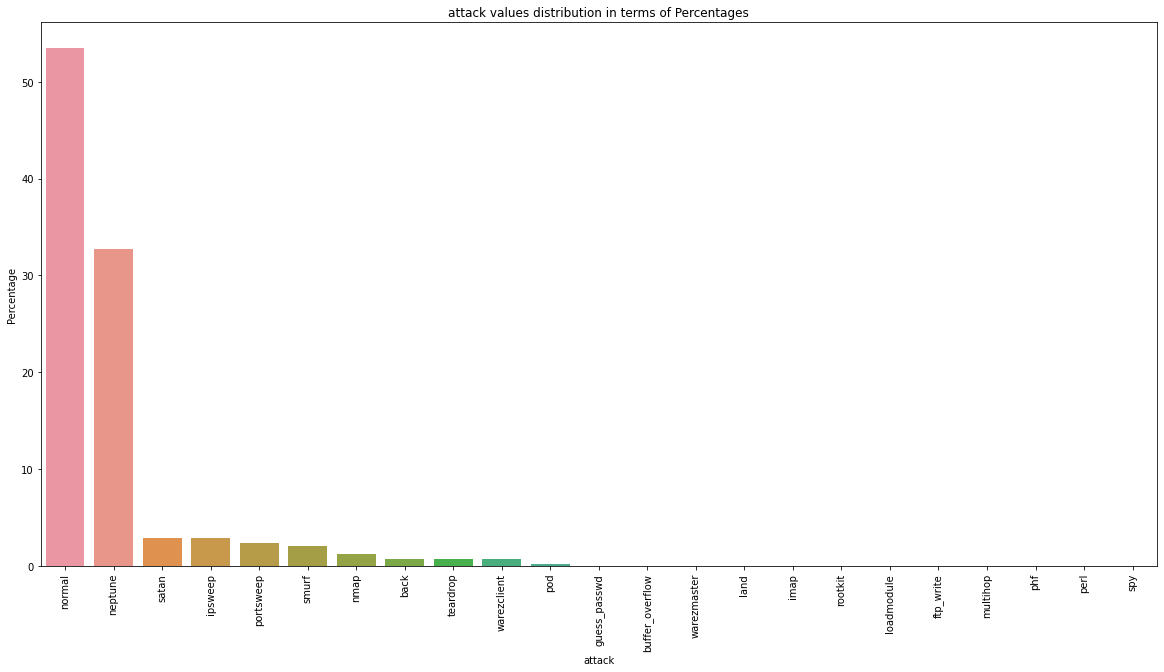

             attack  Value Count
0            normal        67343
1           neptune        41214
2             satan         3633
3           ipsweep         3599
4         portsweep         2931
5             smurf         2646
6              nmap         1493
7              back          956
8          teardrop          892
9       warezclient          890
10              pod          201
11     guess_passwd           53
12  buffer_overflow           30
13      warezmaster           20
14             land           18
15             imap           11
16          rootkit           10
17       loadmodule            9
18        ftp_write            8
19         multihop            7
20              phf            4
21             perl            3
22              spy            2
             attack  counts  Percentage
0            normal   67343    53.45828
1           neptune   41214    32.71653
2             satan    3633     2.88395
3           ipsweep    3599     2.85696
4       

In [10]:
#Analyzing the distribution of Class Label / Dependent Variable to choose the right metric for classification task
feature = "attack"
feature_value_counts = train_data[feature].value_counts() #getting value counts for each unique value present in the attack column
feature_value_counts = pd.DataFrame({feature:feature_value_counts.index,'Value Count':feature_value_counts.values}) #Converting the series into Dataframe object
plt.figure(figsize=(20,10))
s = sns.barplot(x = feature, y="Value Count",data=feature_value_counts) # Plotting the value counts of each unique value present in the attack
s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks for the plot
s.set_title("Value Counts of the "+feature) #setting title for the plot
plt.show()
feature_percentages = train_data[feature].value_counts().reset_index(name ="counts") #getting value counts for each unique value present in the attack column
feature_percentages.rename(columns = {'index':feature}, inplace = True) #replacing index name with attack
feature_percentages["Percentage"] = feature_percentages["counts"].apply(lambda x:round(x*100/feature_percentages["counts"].sum(),5)) # Computing the percentage value
plt.figure(figsize=(20,10))
s = sns.barplot(x = feature, y="Percentage",data=feature_percentages) #Plotting the percentage values of each unique value present in the attack
s.set_title(feature+" values distribution in terms of Percentages") #setting title for the plot
s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks for the plot
plt.show(); #to show the plots
print(feature_value_counts) # To print the value counts
print(feature_percentages) # To print the percentages

In [11]:
train_data["attack"] = train_data["attack"].apply(lambda x:"attack" if x!="normal" else x)

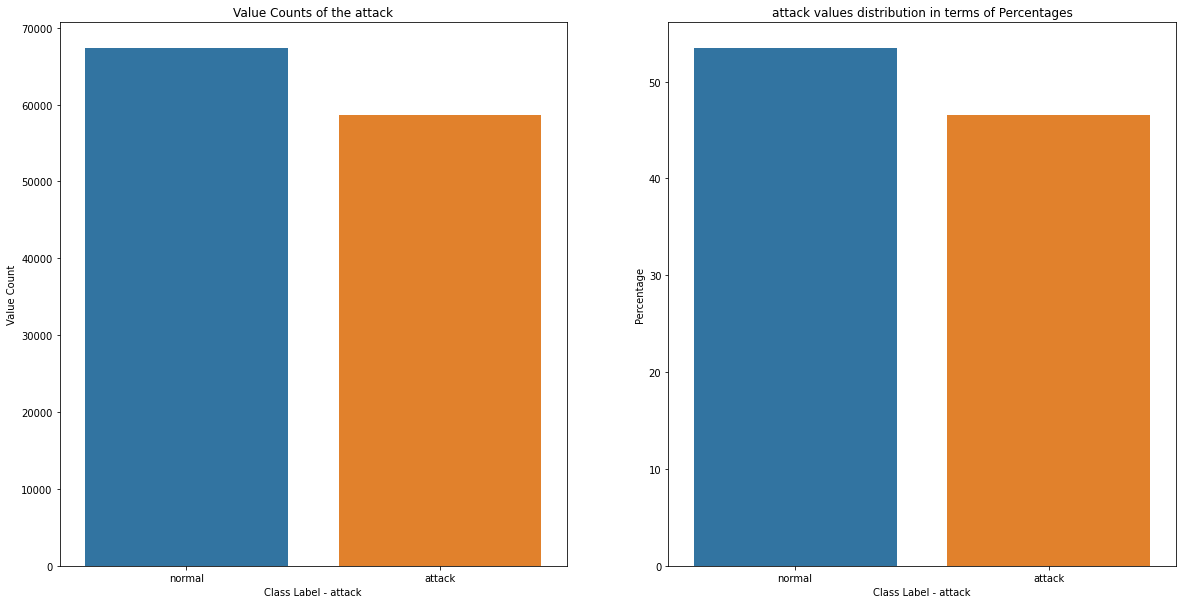

   attack  Value Count
0  normal        67343
1  attack        58630
   attack  counts  Percentage
0  normal   67343    53.45828
1  attack   58630    46.54172


In [12]:
#Analyzing the distribution of Class Label / Dependent Variable to choose the right metric for classification task
feature = "attack"
feature_value_counts = train_data[feature].value_counts() #getting value counts for each unique value present in the attack column
feature_value_counts = pd.DataFrame({feature:feature_value_counts.index,'Value Count':feature_value_counts.values}) #Converting the series into Dataframe object
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10)) #Creating a plot with 2 subplots\n",
s = sns.barplot(ax=ax1,x = feature, y="Value Count",data=feature_value_counts) # Plotting the value counts of each unique value present in the attack
s.set_xticklabels(s.get_xticklabels()) #setting x-ticks for the plot
s.set_title("Value Counts of the "+feature) #setting title for the plot
s.set_xlabel("Class Label - "+feature) #setting xlabel for the plot
feature_percentages = train_data[feature].value_counts().reset_index(name ="counts") #getting value counts for each unique value present in the attack column
feature_percentages.rename(columns = {'index':feature}, inplace = True) #replacing index name with attack
feature_percentages["Percentage"] = feature_percentages["counts"].apply(lambda x:round(x*100/feature_percentages["counts"].sum(),5)) # Computing the percentage value
s = sns.barplot(ax=ax2,x = feature, y="Percentage",data=feature_percentages) #Plotting the percentage values of each unique value present in the attack
s.set_title(feature+" values distribution in terms of Percentages") #setting title for the plot
s.set_xticklabels(s.get_xticklabels()) #setting x-ticks for the plot
s.set_xlabel("Class Label - "+feature) #setting xlabel for the plot
plt.show(); #to show the plots
print(feature_value_counts) # To print the value counts
print(feature_percentages) # To print the percentages

In [13]:
#Function to analyze the categorical features in the dataset
def plot_categorical_features(feature,train_data=train_data):
    print("Bar Plots to analyze the {} distribution".format(feature))
    feature_value_counts = train_data[feature].value_counts() #getting value counts for each unique value present in the feature
    feature_value_counts = pd.DataFrame({feature:feature_value_counts.index,'Value Count':feature_value_counts.values}) #Converting the series into Dataframe object
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10)) #Creating a plot with 2 subplots
    s = sns.barplot(ax=ax1,x = feature, y="Value Count",data=feature_value_counts) # Plotting the value counts of each unique value present in the feature
    s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks for the plot
    s.set_title("Value Counts of the "+feature) #Setting the title
    feature_percentages = train_data[feature].value_counts().reset_index(name ="counts") #getting value counts for each unique value present in the feature
    feature_percentages.rename(columns = {'index':feature}, inplace = True) #replacing index with the feature name
    feature_percentages["Percentage"] = feature_percentages["counts"].apply(lambda x:round(x*100/feature_percentages["counts"].sum(),4)) #computing the percentage value
    s = sns.barplot(ax=ax2,x = feature, y="Percentage",data=feature_percentages) #Plotting the percentage values of each unique value present in the attack
    s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks for the plot
    s.set_title(feature+" values distribution in terms of Percentages") #setting the title
    plt.subplots_adjust(wspace = .6) #ensuring enough width between two subplots
    plt.show(); #displaying the plot
    print(feature_percentages) #printing the feature values and the percentages
    print("="*100)
    feature_value_counts1 = train_data[train_data["attack"]=="attack"][feature].value_counts() #getting value counts for each unique value present in the feature for attack records
    feature_value_counts1 = pd.DataFrame({feature:feature_value_counts1.index,'Value Count (attack = attack)':feature_value_counts1.values}) #Converting the series into Dataframe object
    feature_value_counts0 = train_data[train_data["attack"]=="normal"][feature].value_counts() #getting value counts for each unique value present in the feature for normal records
    feature_value_counts0 = pd.DataFrame({feature:feature_value_counts0.index,'Value Count (attack = normal)':feature_value_counts0.values}) #Converting the series into Dataframe object
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))  #Creating a plot with 2 subplots
    s = sns.barplot(ax=ax1, x = feature, y="Value Count (attack = attack)",data=feature_value_counts1) # Plotting the value counts of each unique value present in the feature for attack records
    s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks for the plot
    s.set_title("Value Counts of the "+feature+" (attack = attack)") #setting title for the plot
    s = sns.barplot(ax=ax2, x = feature, y="Value Count (attack = normal)",data=feature_value_counts0) # Plotting the value counts of each unique value present in the feature for normal records
    s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks for the plot
    s.set_title("Value Counts of the "+feature+" (attack = normal)") #setting title for the plot
    plt.subplots_adjust(wspace = .6) #ensuring enough space between the two plots
    plt.show(); #Displaying the pot
    feature_df = train_data[[feature,'attack']].value_counts().reset_index(name ="counts") #getting value counts for each unique value present in the feature
    groupby_df = feature_df.groupby(["attack"]).sum().reset_index() #getting value counts for each unique value present in the feature grouped by the attack value
    if feature in groupby_df.columns:
        groupby_df = groupby_df.drop(columns = [feature]) #dropping feature column from the groupby_df dataframe
    merged_df = pd.merge(left= feature_df, right=groupby_df, how='left', left_on='attack', right_on='attack') #joining feature_df with the groupby_df to get all the columnns in a single dataframe
    merged_df["Percentage (attack = attack)"] = round(merged_df["counts_x"]*100/merged_df["counts_y"],4) #Caluclating percentage 
    merged_df["Percentage (attack = normal)"] = merged_df["Percentage (attack = attack)"] #Duplicating the column to use it for normal records as well
    merged_df0 = merged_df[merged_df["attack"]=="normal"][[feature,"counts_x","Percentage (attack = normal)"]] # creating a new dataframe for normal records
    merged_df1 = merged_df[merged_df["attack"]=="attack"][[feature,"counts_x","Percentage (attack = attack)"]] # creating a new dataframe for attack records
    merged_df0.rename(columns = {'counts_x':'Counts (attack = normal)'}, inplace = True) #renaming columns in the dataframe
    merged_df1.rename(columns = {'counts_x':'Counts (attack = attack)'}, inplace = True) #renaming columns in the dataframe
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10)) #creating plot with 2 subplots
    s = sns.barplot(ax=ax1, x = feature, y="Percentage (attack = attack)",data=merged_df1) #plotting the percentage of each unique value present in the feature for attack = attack records
    s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks for the plot
    s.set_title(feature+" values distribution in terms of Percentages (attack = attack)") #setting title for the plot
    s = sns.barplot(ax=ax2, x = feature, y="Percentage (attack = normal)",data=merged_df0) #plotting the percentage of each unique value present in the feature for normal records
    s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks for the plot
    s.set_title(feature+" values distribution in terms of Percenatges (attack = normal)") #setting title for the plot
    plt.subplots_adjust(wspace = .6) #ensuring sufficient width between the subplots
    plt.show(); # displaying the plot
    print(merged_df1) # printing the obtained dataframe which consists value counts and percentages for the unique value in feature with attack ="attack"
    print(merged_df0) # printing the obtained dataframe which consists value counts and percentages for the unique value in feature with attack ="normal"
    print("="*100)
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,10)) # creating a plot with 3 subplots
    s = sns.barplot(ax=ax1,x = feature, y="Value Count",data=feature_value_counts) #plotting value counts for each of the unique value present in the feature
    s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks
    s.set_title("Value Counts of the "+feature) #setting title
    s = sns.barplot(ax=ax2, x = feature, y="Value Count (attack = attack)",data=feature_value_counts1) # plotting value counts for each of the unique value present in the feature with attack value as 1
    s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks
    s.set_title("Value Counts of the "+feature+" (attack = attack)") #setting title
    s = sns.barplot(ax=ax3, x = feature, y="Value Count (attack = normal)",data=feature_value_counts0) # plotting value counts for each of the unique value present in the feature with attack value as 0
    s.set_xticklabels(s.get_xticklabels(),rotation=90) #setting x-ticks
    s.set_title("Value Counts of the "+feature+" (attack = normal)") #setting title
    plt.subplots_adjust(wspace = .6) #ensuring sufficient width between the subplots
    plt.show(); #displaying the plot
#     merged_df_print = pd.merge(left= merged_df1, right=merged_df0, how='left', left_on=feature, right_on=feature)
#     merged_df_html = pd.merge(left= feature_percentages, right=merged_df_print, how='left', left_on=feature, right_on=feature)
#     merged_df_html.style.set_table_styles([dict(selector="th",props=[('max-width', '50px')])])
#     print(merged_df_html)

In [14]:
#Function to analyze the numerical features in the dataset
def plot_numerical_features(feature,train_data=train_data):
    print("Histograms to analyze the {} distribution".format(feature))
    feature_value_counts1 = train_data[train_data["attack"]=="attack"][[feature,"attack"]] # Selecting records which have the attack value as 1
    feature_value_counts0 = train_data[train_data["attack"]=="normal"][[feature,"attack"]] # Selecting records which have the attack value as 0
    s = sns.FacetGrid(feature_value_counts1, hue="attack", size=5).map(sns.distplot, feature).add_legend(); #Plotting value counts of the records with attack value as 1
    s.fig.suptitle("Histogram of the feature {} (attack = attack)".format(feature)) #Setting title to the plot
    plt.show(); # To display the plot
    print(train_data[train_data["attack"]=="attack"][feature].describe()) # To print the min, max, 25th, 50th , 75th etc., statistical value for the records with Target Atrack value as 1
    print("="*100)
    s = sns.FacetGrid(feature_value_counts0, hue="attack", size=5).map(sns.distplot, feature).add_legend(); #Plotting value counts of the records with attack value as 0
    s.fig.suptitle("Histogram of the feature {} (attack = normal)".format(feature)) #Setting title to the plot
    plt.show(); # To display the plot
    print(train_data[train_data["attack"]=="normal"][feature].describe()) # To print the min, max, 25th, 50th , 75th etc., statistical value for the records with Target Atrack value as 0
    print("="*100)
    s = sns.FacetGrid(train_data, hue="attack", size=5).map(sns.distplot, feature).add_legend(); #Plotting value counts of all the records present in the data
    s.fig.suptitle("Histogram of the feature {}".format(feature)) #Setting title to the plot
    plt.show(); # To display the plot
    print("Box Plots to analyze the {} distribution".format(feature))
    s = sns.boxplot(x='attack',y=feature, data=train_data) #Plotting the box plot for the data distribution of the feature
    s.set_title("Box Plot for the feature "+feature)
    plt.show();
    print(train_data[feature].describe()) # To print the min, max, 25th, 50th , 75th etc., statistical value for all the records
    print("="*100)

In [15]:
def percentile_values(feature):
    for i in range(0,101,10):
        print("{1}-percentile value is {0}".format(np.percentile(train_data[feature],i),i))

    for i in range(90,101,1):
        print("{1}-percentile value is {0}".format(np.percentile(train_data[feature],i),i))

    for i in np.arange(99.0,100.1,0.1):
        print("{1}-percentile value is {0}".format(np.percentile(train_data[feature],i),i))

In [16]:
def remove_outliers(feature):
    q3 = np.percentile(train_data[feature],75)
    q1 = np.percentile(train_data[feature],25)

    iqr = q3-q1

    upper_cutoff = q3+(1.5*iqr)
    lower_cutoff = q1-(1.5*iqr)
    return lower_cutoff,upper_cutoff

# feature = "duration"
# train_data.drop(train_data[train_data[feature]< lower_cutoff].index, inplace=True)
# train_data.drop(train_data[train_data[feature]> upper_cutoff].index, inplace=True)
# train_data.shape

In [17]:
feature = "duration"
percentile_values(feature)

0-percentile value is 0.0
10-percentile value is 0.0
20-percentile value is 0.0
30-percentile value is 0.0
40-percentile value is 0.0
50-percentile value is 0.0
60-percentile value is 0.0
70-percentile value is 0.0
80-percentile value is 0.0
90-percentile value is 0.0
100-percentile value is 42908.0
90-percentile value is 0.0
91-percentile value is 0.0
92-percentile value is 0.0
93-percentile value is 1.0
94-percentile value is 2.0
95-percentile value is 4.0
96-percentile value is 15.0
97-percentile value is 31.0
98-percentile value is 2050.679999999993
99-percentile value is 9590.559999999998
100-percentile value is 42908.0
99.0-percentile value is 9590.559999999998
99.1-percentile value is 10880.827999999732
99.19999999999999-percentile value is 12655.911999999837
99.29999999999998-percentile value is 13844.33199999969
99.39999999999998-percentile value is 16676.35999999952
99.49999999999997-percentile value is 19790.07999999018
99.59999999999997-percentile value is 25725.47999999858

Max value is : 42908
Min value is : 0
Histograms to analyze the duration distribution


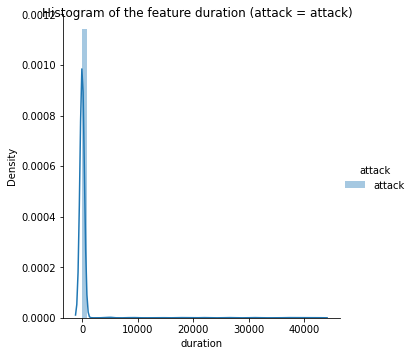

count    58630.000000
mean       423.320689
std       3547.684533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      42908.000000
Name: duration, dtype: float64


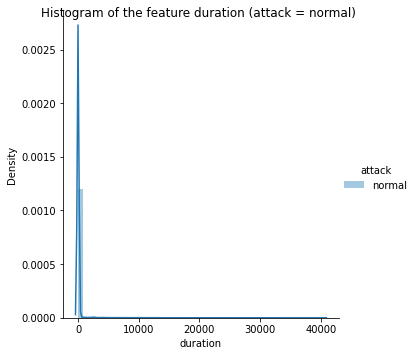

count    67343.000000
mean       168.587396
std       1304.452127
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      40504.000000
Name: duration, dtype: float64


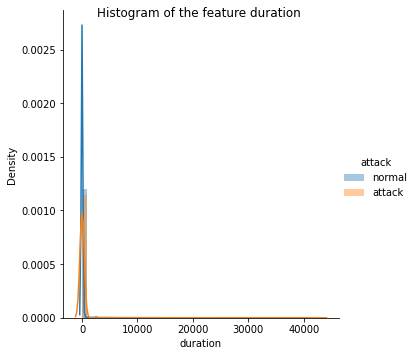

Box Plots to analyze the duration distribution


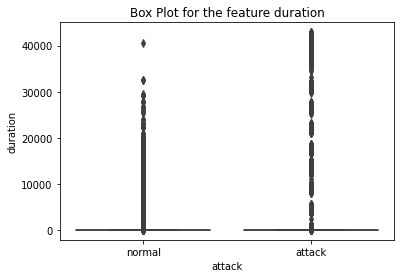

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
Name: duration, dtype: float64


In [18]:
feature = "duration"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

In [19]:
feature ="duration"
q_99 = np.percentile(train_data[feature],99)
train_data.drop(train_data[train_data["duration"]>q_99].index, inplace = True)

Bar Plots to analyze the protocol_type distribution


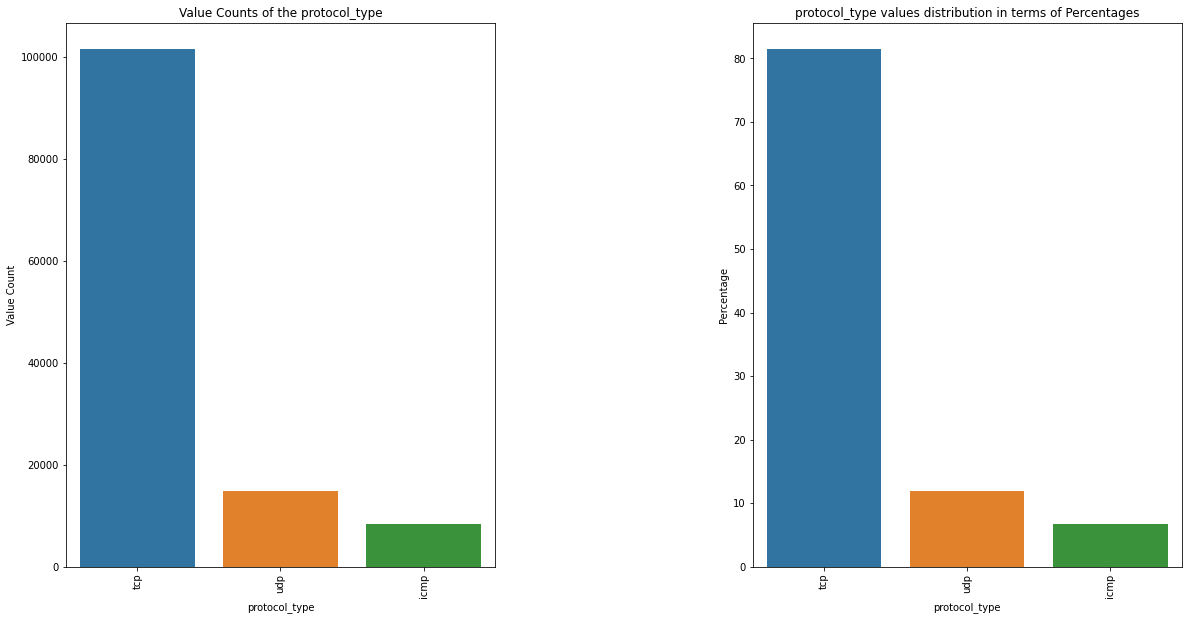

  protocol_type  counts  Percentage
0           tcp  101629     81.4903
1           udp   14793     11.8616
2          icmp    8291      6.6481


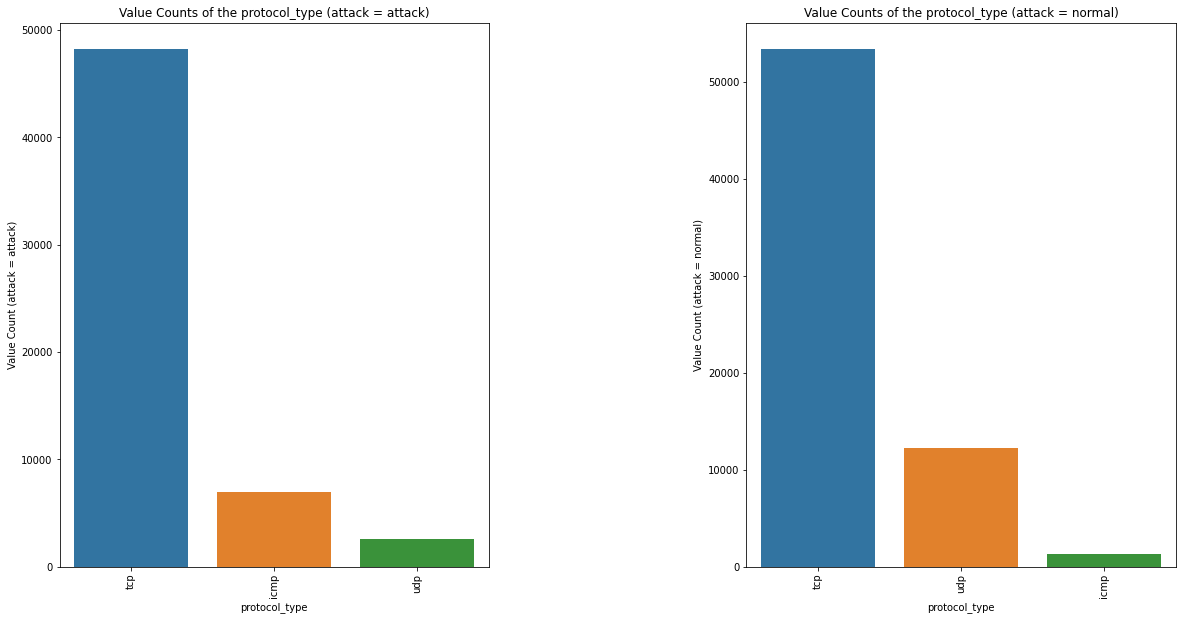

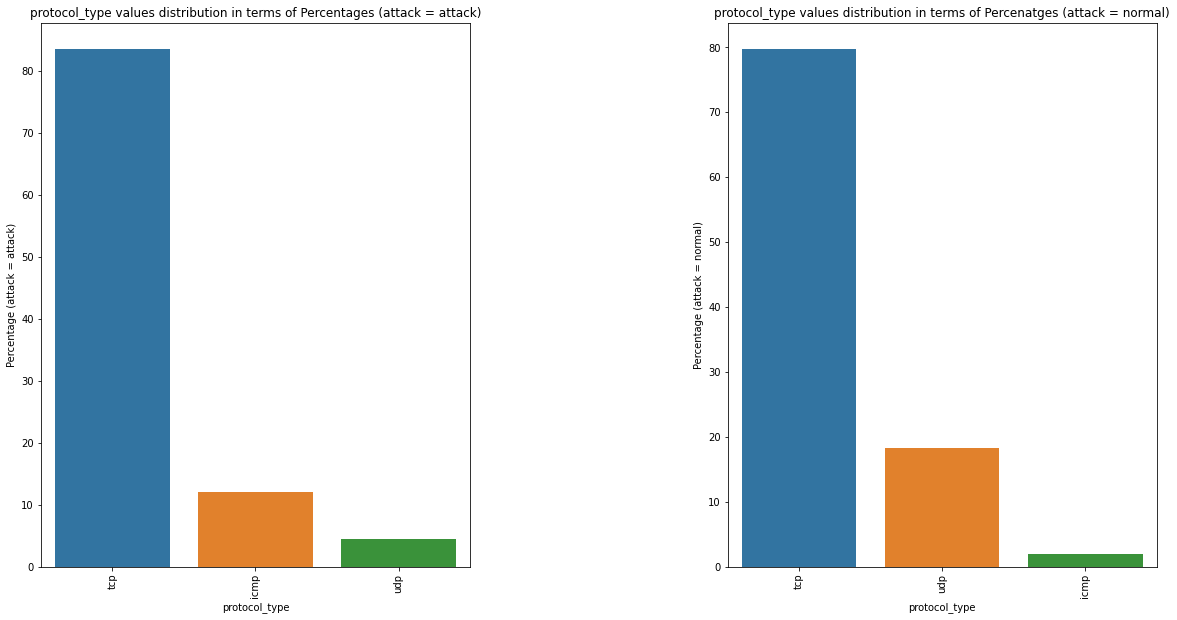

  protocol_type  Counts (attack = attack)  Percentage (attack = attack)
1           tcp                     48251                       83.4908
3          icmp                      6982                       12.0813
4           udp                      2559                        4.4279
  protocol_type  Counts (attack = normal)  Percentage (attack = normal)
0           tcp                     53378                       79.7627
2           udp                     12234                       18.2813
5          icmp                      1309                        1.9560


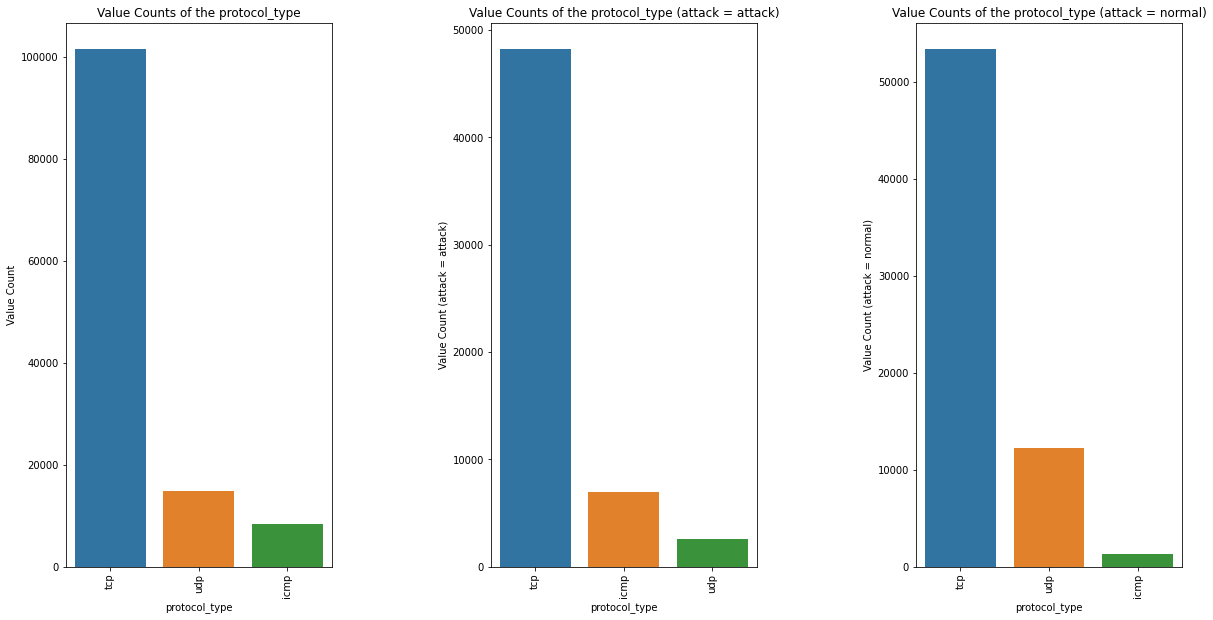

In [20]:
feature = "protocol_type"
plot_categorical_features(feature) # For plotting the data distribution of the feature

Bar Plots to analyze the service distribution


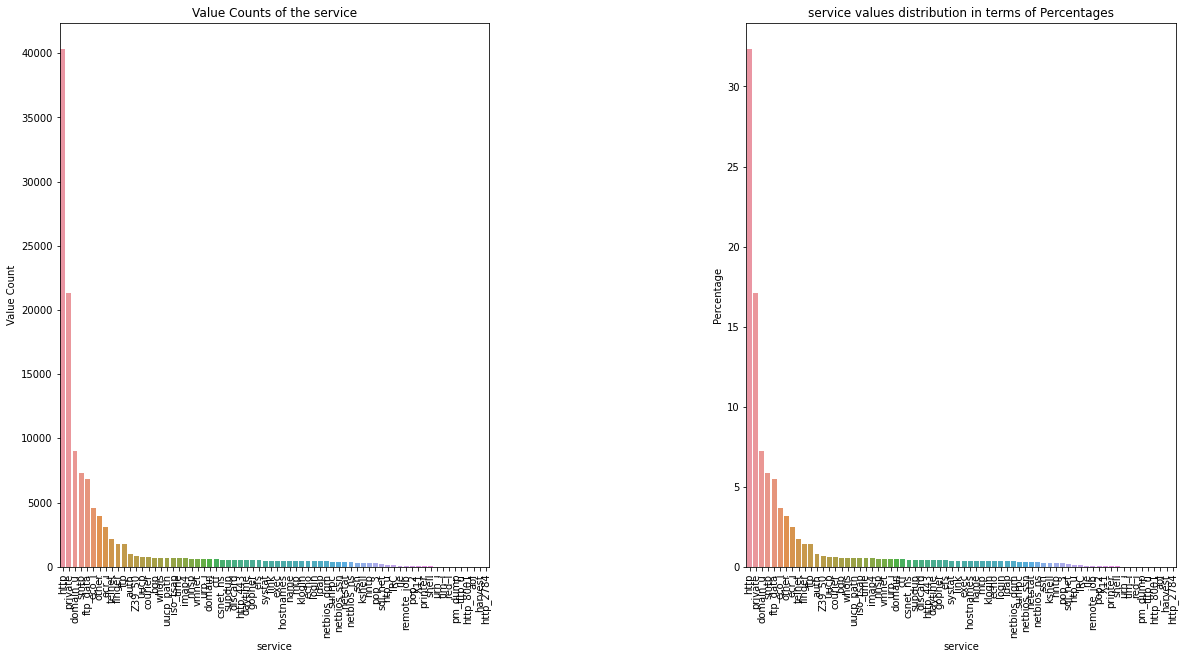

      service  counts  Percentage
0        http   40337     32.3439
1     private   21312     17.0888
2    domain_u    9042      7.2502
3        smtp    7311      5.8623
4    ftp_data    6859      5.4998
..        ...     ...         ...
65     tftp_u       3      0.0024
66  http_8001       2      0.0016
67        aol       2      0.0016
68    harvest       2      0.0016
69  http_2784       1      0.0008

[70 rows x 3 columns]


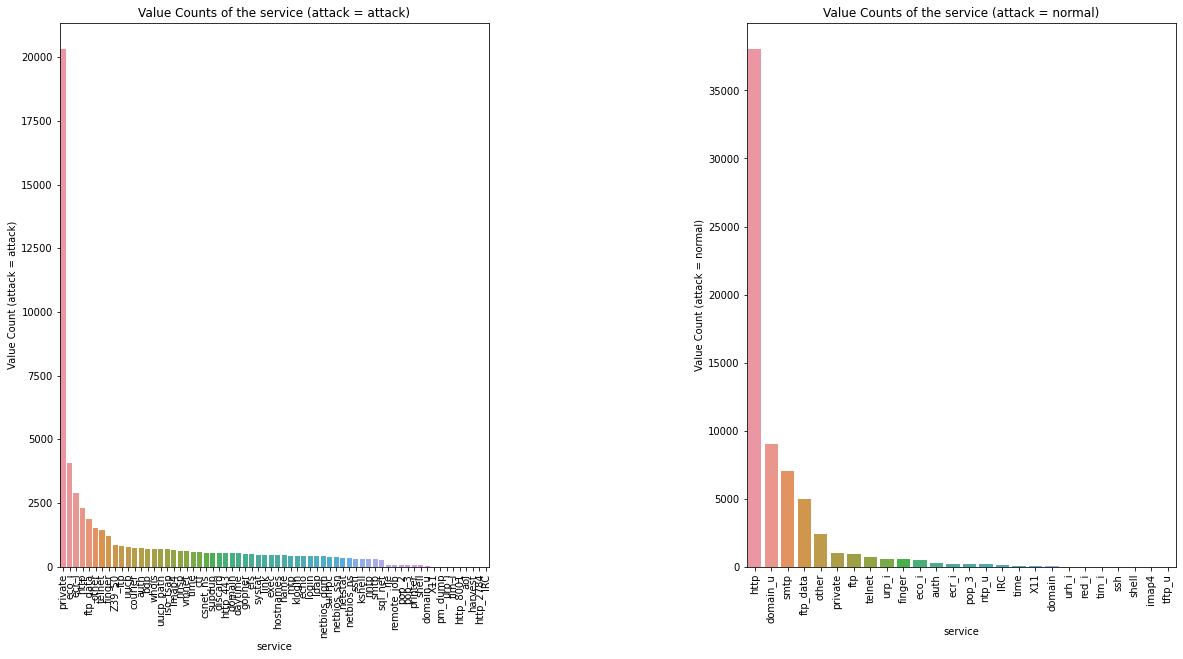

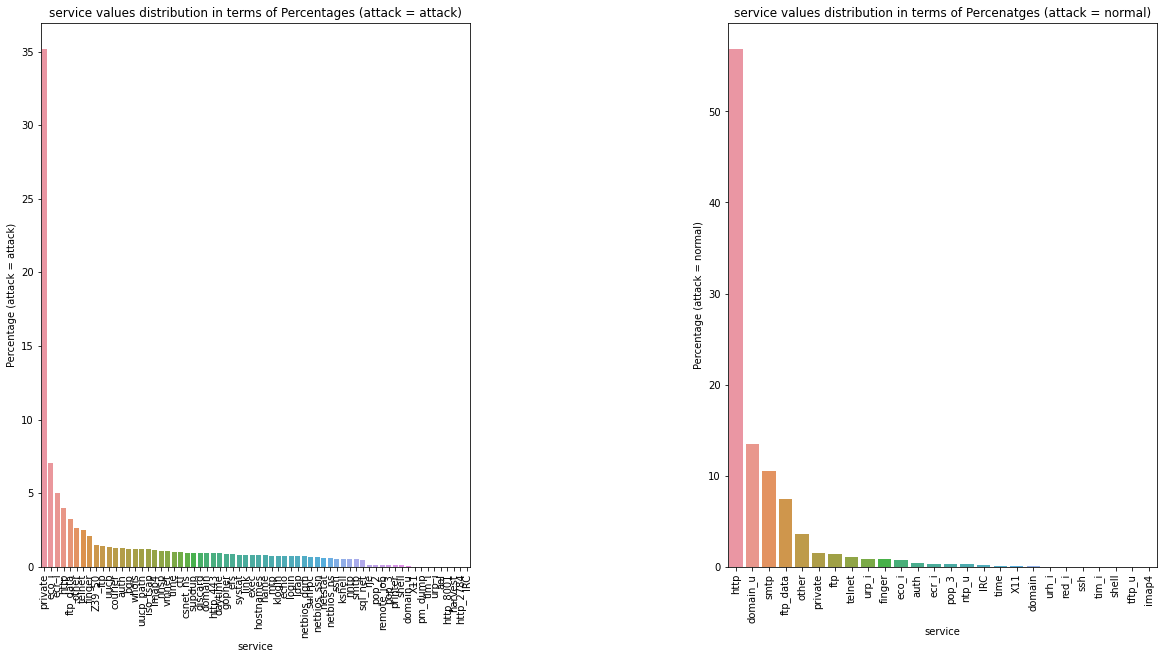

      service  Counts (attack = attack)  Percentage (attack = attack)
1     private                     20330                       35.1779
5       eco_i                      4089                        7.0754
6       ecr_i                      2887                        4.9955
8        http                      2288                        3.9590
9    ftp_data                      1875                        3.2444
..        ...                       ...                           ...
87        aol                         2                        0.0035
88  http_8001                         2                        0.0035
89    harvest                         2                        0.0035
90  http_2784                         1                        0.0017
91        IRC                         1                        0.0017

[66 rows x 3 columns]
     service  Counts (attack = normal)  Percentage (attack = normal)
0       http                     38049                       56.8566

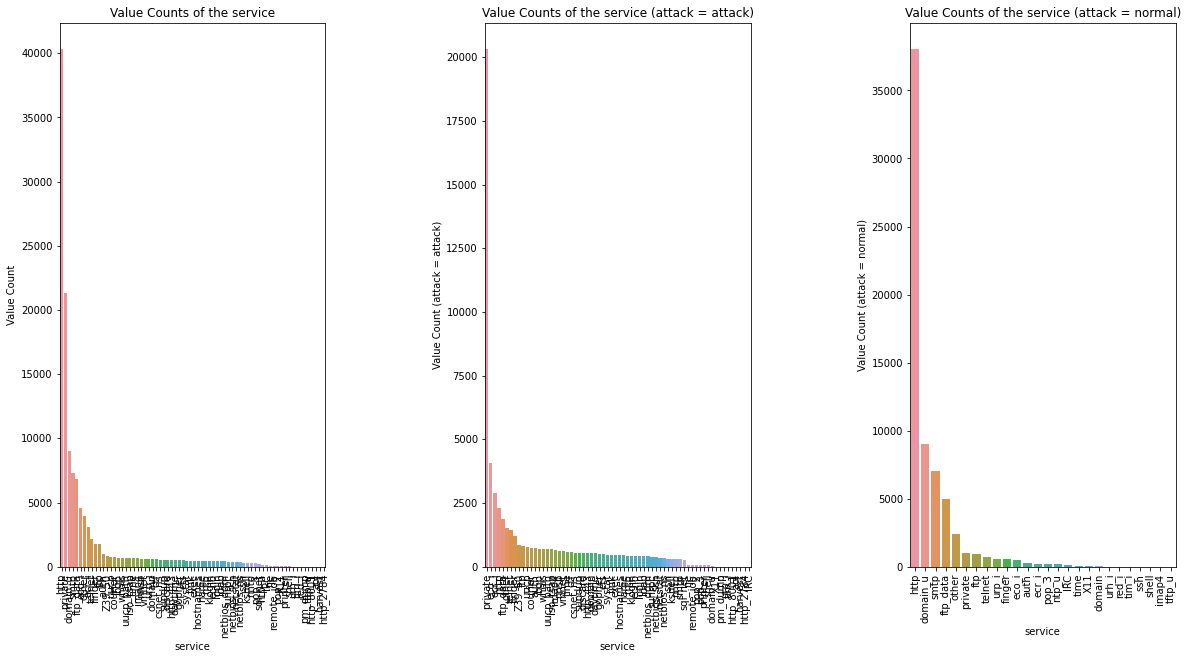

In [21]:
feature = "service"
plot_categorical_features(feature) # For plotting the data distribution of the feature

In [22]:
#Getting the Target Encoded values of each of the value present in the Categorical Feature - service
from category_encoders import TargetEncoder
service_target_encoder = TargetEncoder() # Declaring new instance of Target Encoding object
train_data["attack_encoded"] = train_data["attack"].apply(lambda x: 1 if x=="attack" else 0)
train_data['service'] = service_target_encoder.fit_transform(train_data['service'], train_data['attack_encoded']) #Training the target encoder using sld and attack and transforming the sld values
train_data['service'] = train_data['service'].apply(lambda x: '%.6f' % float(x)).astype(float) #Converting the precision value after decimal point to 6

In [23]:
pickle.dump(service_target_encoder, open('service_target_encoder.pkl', 'wb'))

Bar Plots to analyze the flag distribution


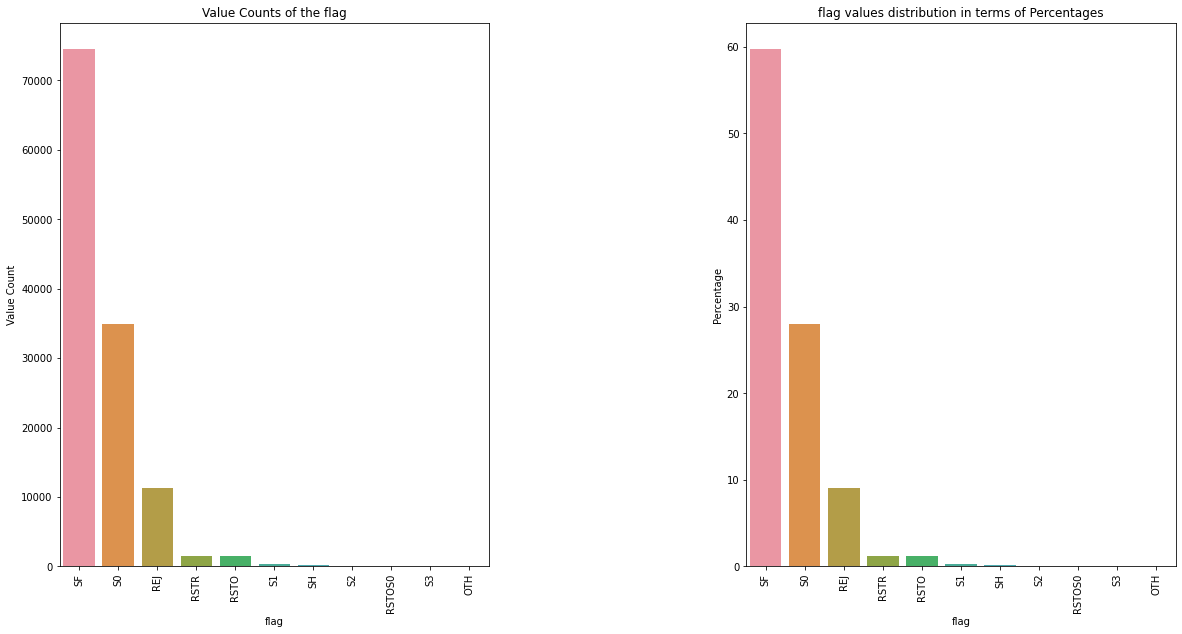

      flag  counts  Percentage
0       SF   74555     59.7813
1       S0   34851     27.9450
2      REJ   11233      9.0071
3     RSTR    1570      1.2589
4     RSTO    1554      1.2461
5       S1     365      0.2927
6       SH     271      0.2173
7       S2     127      0.1018
8   RSTOS0      93      0.0746
9       S3      48      0.0385
10     OTH      46      0.0369


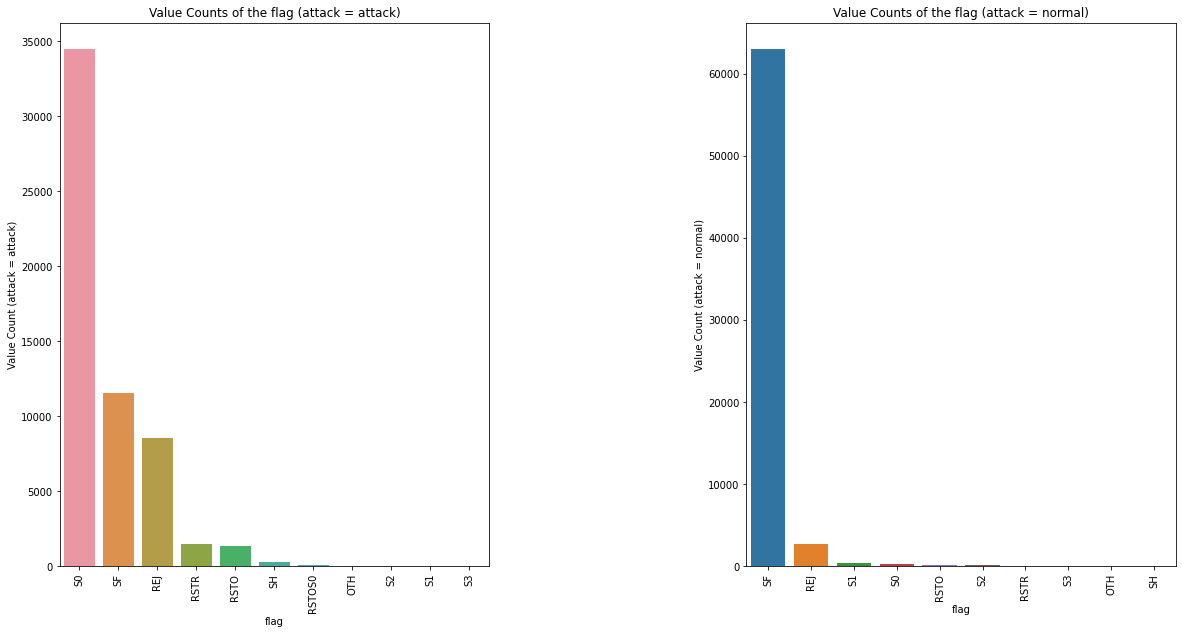

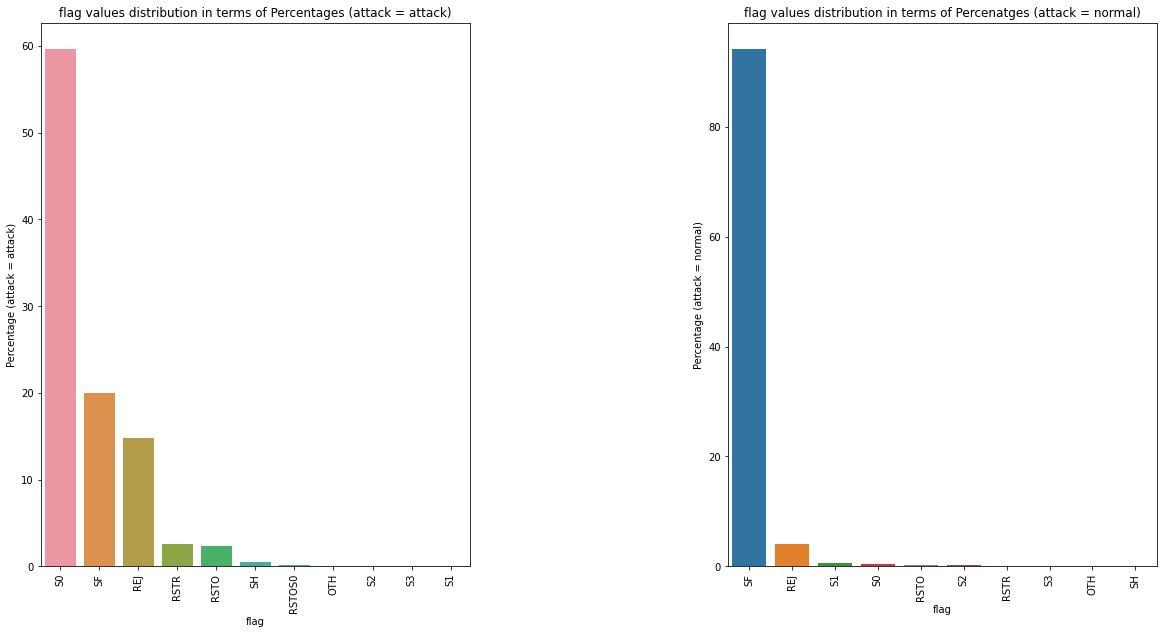

      flag  Counts (attack = attack)  Percentage (attack = attack)
1       S0                     34497                       59.6917
2       SF                     11530                       19.9509
3      REJ                      8540                       14.7771
5     RSTR                      1470                        2.5436
6     RSTO                      1342                        2.3221
9       SH                       269                        0.4655
13  RSTOS0                        93                        0.1609
15     OTH                        35                        0.0606
17      S2                         8                        0.0138
18      S3                         4                        0.0069
19      S1                         4                        0.0069
    flag  Counts (attack = normal)  Percentage (attack = normal)
0     SF                     63025                       94.1782
4    REJ                      2693                        4.0241
7

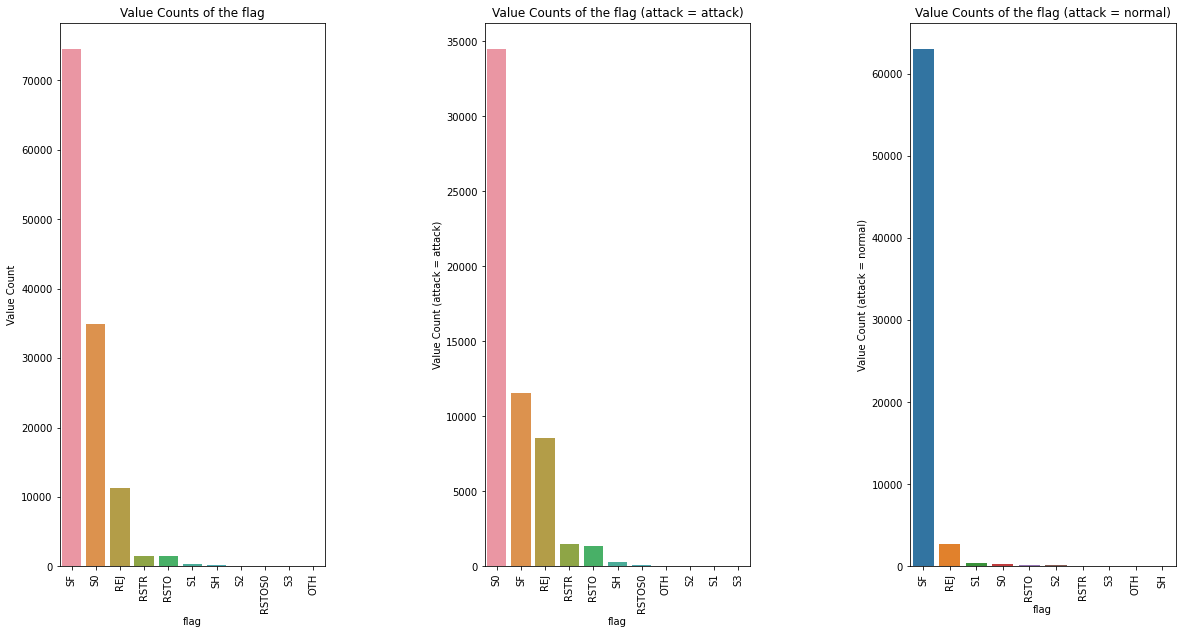

In [24]:
feature = "flag"
plot_categorical_features(feature) # For plotting the data distribution of the feature

In [25]:
#Getting the Target Encoded values of each of the value present in the Categorical Feature - flag
from category_encoders import TargetEncoder
flag_target_encoder = TargetEncoder() # Declaring new instance of Target Encoding object
train_data['flag'] = flag_target_encoder.fit_transform(train_data['flag'], train_data['attack_encoded']) #Training the target encoder using sld and attack and transforming the sld values
train_data['flag'] = train_data['flag'].apply(lambda x: '%.6f' % float(x)).astype(float) #Converting the precision value after decimal point to 6

In [26]:
pickle.dump(flag_target_encoder, open('flag_target_encoder.pkl', 'wb'))

Max value is : 693375640
Min value is : 0
Histograms to analyze the src_bytes distribution


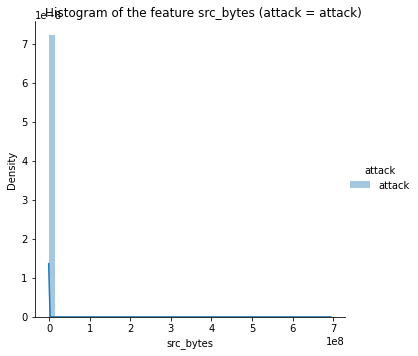

count    5.779200e+04
mean     1.823307e+04
std      2.888918e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.933756e+08
Name: src_bytes, dtype: float64


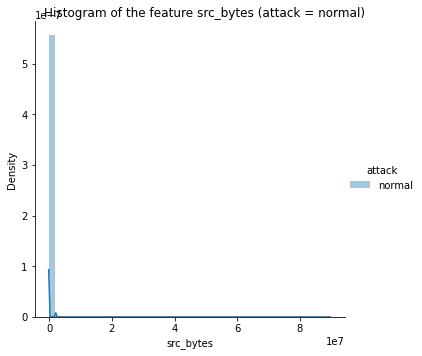

count    6.692100e+04
mean     1.320854e+04
std      4.194283e+05
min      0.000000e+00
25%      1.260000e+02
50%      2.330000e+02
75%      3.230000e+02
max      8.958152e+07
Name: src_bytes, dtype: float64


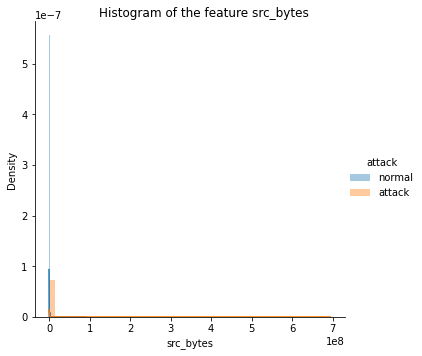

Box Plots to analyze the src_bytes distribution


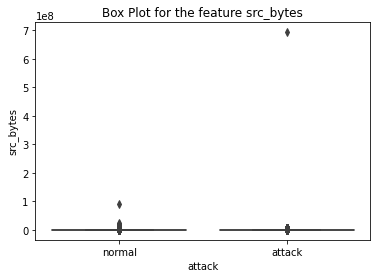

count    1.247130e+05
mean     1.553691e+04
std      1.990436e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.770000e+02
max      6.933756e+08
Name: src_bytes, dtype: float64


In [27]:
feature = "src_bytes"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

In [28]:
percentile_values("src_bytes")

0-percentile value is 0.0
10-percentile value is 0.0
20-percentile value is 0.0
30-percentile value is 0.0
40-percentile value is 1.0
50-percentile value is 44.0
60-percentile value is 194.0
70-percentile value is 236.0
80-percentile value is 307.0
90-percentile value is 845.0
100-percentile value is 693375640.0
90-percentile value is 845.0
91-percentile value is 1003.0
92-percentile value is 1032.0
93-percentile value is 1081.0
94-percentile value is 1257.0
95-percentile value is 1480.0
96-percentile value is 1808.0
97-percentile value is 2922.9199999999983
98-percentile value is 8737.0
99-percentile value is 54540.0
100-percentile value is 693375640.0
99.0-percentile value is 54540.0
99.1-percentile value is 54540.0
99.19999999999999-percentile value is 54540.0
99.29999999999998-percentile value is 54540.0
99.39999999999998-percentile value is 54540.0
99.49999999999997-percentile value is 54540.0
99.59999999999997-percentile value is 175337.0
99.69999999999996-percentile value is 501

In [29]:
feature ="src_bytes"
q_99 = np.percentile(train_data[feature],99)
train_data.drop(train_data[train_data[feature]>q_99].index, inplace = True)

Max value is : 5155468
Min value is : 0
Histograms to analyze the dst_bytes distribution


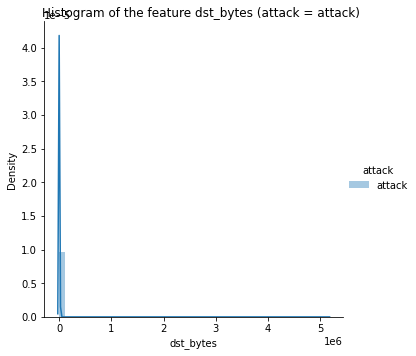

count    5.773100e+04
mean     1.549460e+03
std      8.333925e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.155468e+06
Name: dst_bytes, dtype: float64


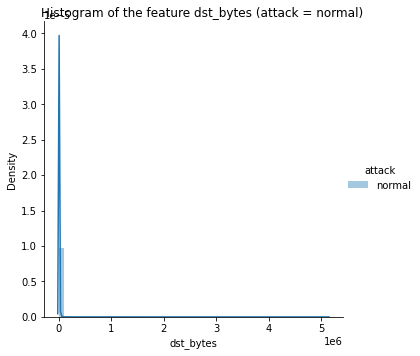

count    6.640100e+04
mean     3.977212e+03
std      5.858800e+04
min      0.000000e+00
25%      1.050000e+02
50%      3.860000e+02
75%      2.056000e+03
max      5.134218e+06
Name: dst_bytes, dtype: float64


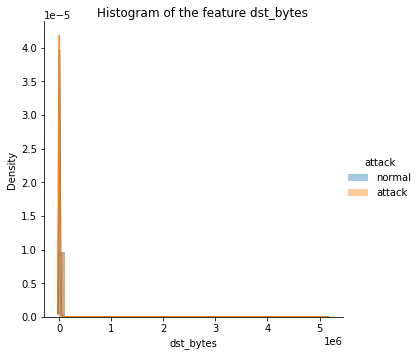

Box Plots to analyze the dst_bytes distribution


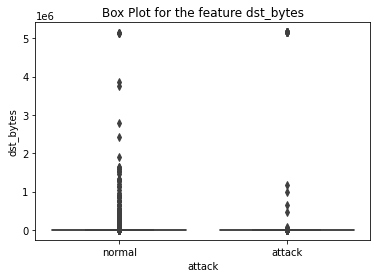

count    1.241320e+05
mean     2.848119e+03
std      7.118804e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.290000e+02
max      5.155468e+06
Name: dst_bytes, dtype: float64


In [30]:
feature = "dst_bytes"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

In [31]:
percentile_values("dst_bytes")

0-percentile value is 0.0
10-percentile value is 0.0
20-percentile value is 0.0
30-percentile value is 0.0
40-percentile value is 0.0
50-percentile value is 0.0
60-percentile value is 117.0
70-percentile value is 334.0
80-percentile value is 1098.0
90-percentile value is 3368.0
100-percentile value is 5155468.0
90-percentile value is 3368.0
91-percentile value is 4027.0
92-percentile value is 4729.0
93-percentile value is 5790.0
94-percentile value is 7184.0
95-percentile value is 8314.0
96-percentile value is 9284.0
97-percentile value is 11471.069999999992
98-percentile value is 14942.420000000042
99-percentile value is 24716.0
100-percentile value is 5155468.0
99.0-percentile value is 24716.0
99.1-percentile value is 25788.30299999984
99.19999999999999-percentile value is 27554.0
99.29999999999998-percentile value is 29291.493999999715
99.39999999999998-percentile value is 31941.35399999976
99.49999999999997-percentile value is 34906.22499999554
99.59999999999997-percentile value is

In [32]:
feature ="dst_bytes"
q_99 = np.percentile(train_data[feature],99)
train_data.drop(train_data[train_data[feature]>q_99].index, inplace = True)
train_data.shape

(122893, 44)

Max value is : 1
Min value is : 0
Bar Plots to analyze the land distribution


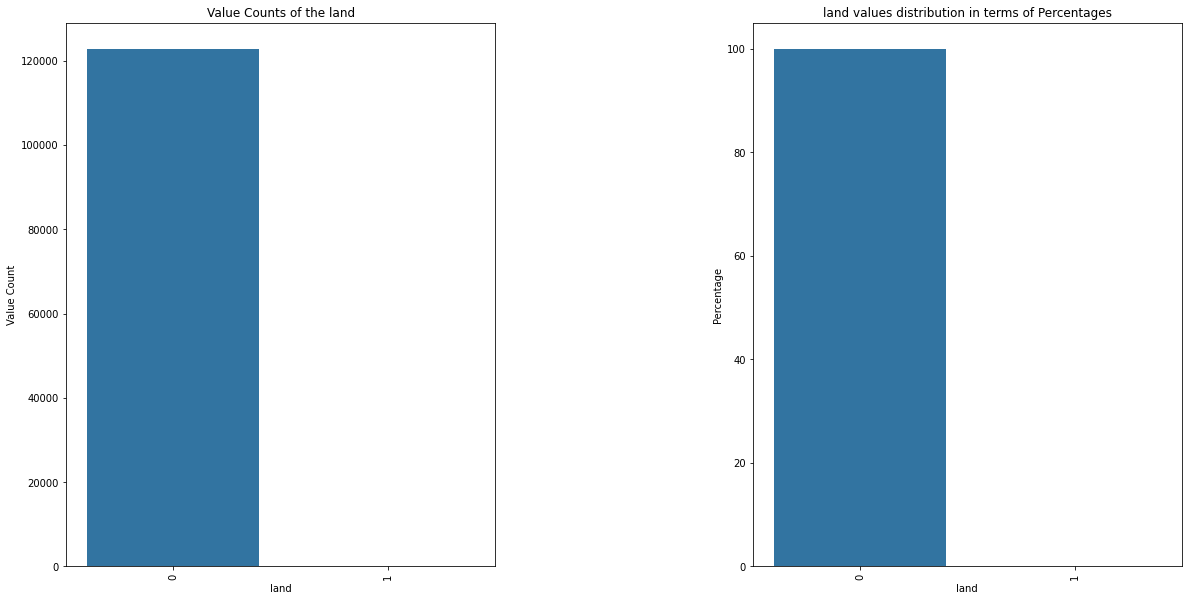

   land  counts  Percentage
0     0  122868     99.9797
1     1      25      0.0203


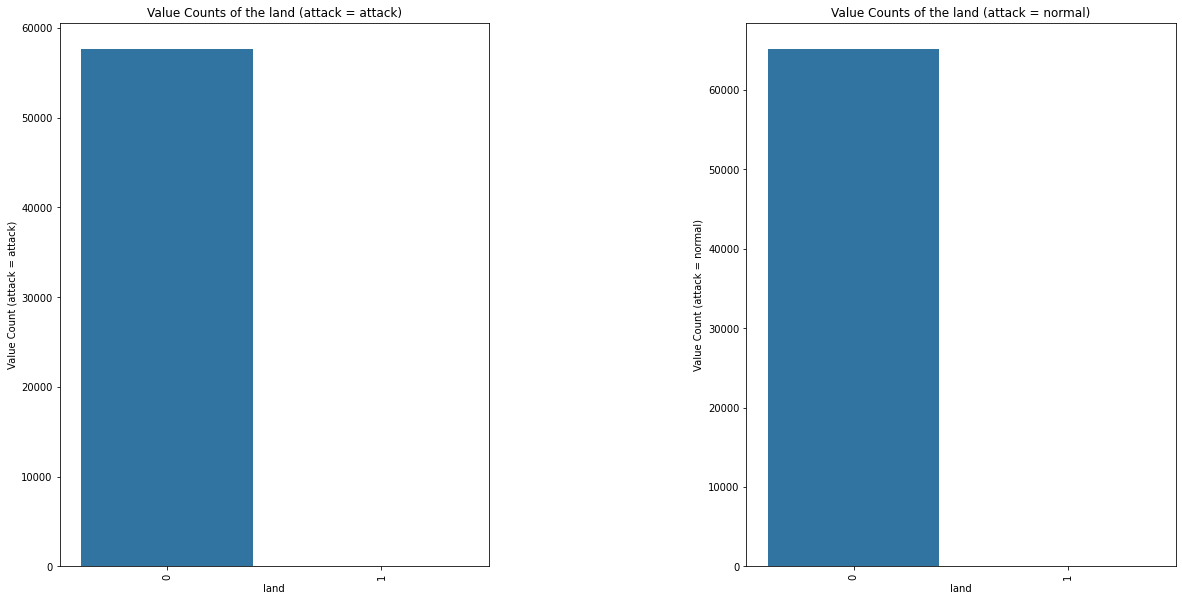

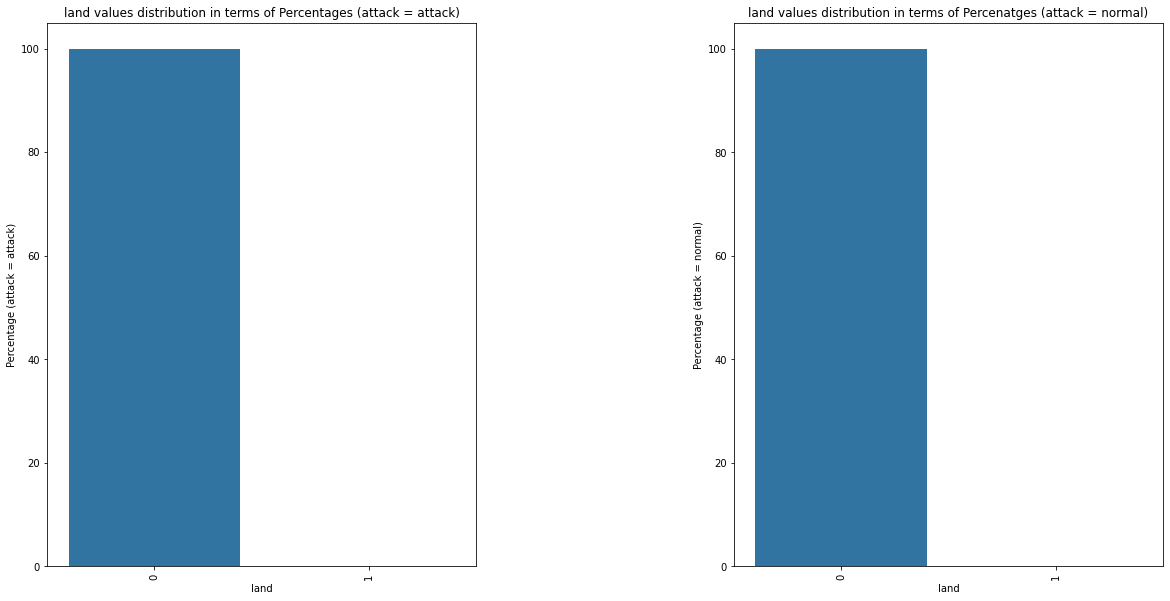

   land  Counts (attack = attack)  Percentage (attack = attack)
1     0                     57691                       99.9688
2     1                        18                        0.0312
   land  Counts (attack = normal)  Percentage (attack = normal)
0     0                     65177                       99.9893
3     1                         7                        0.0107


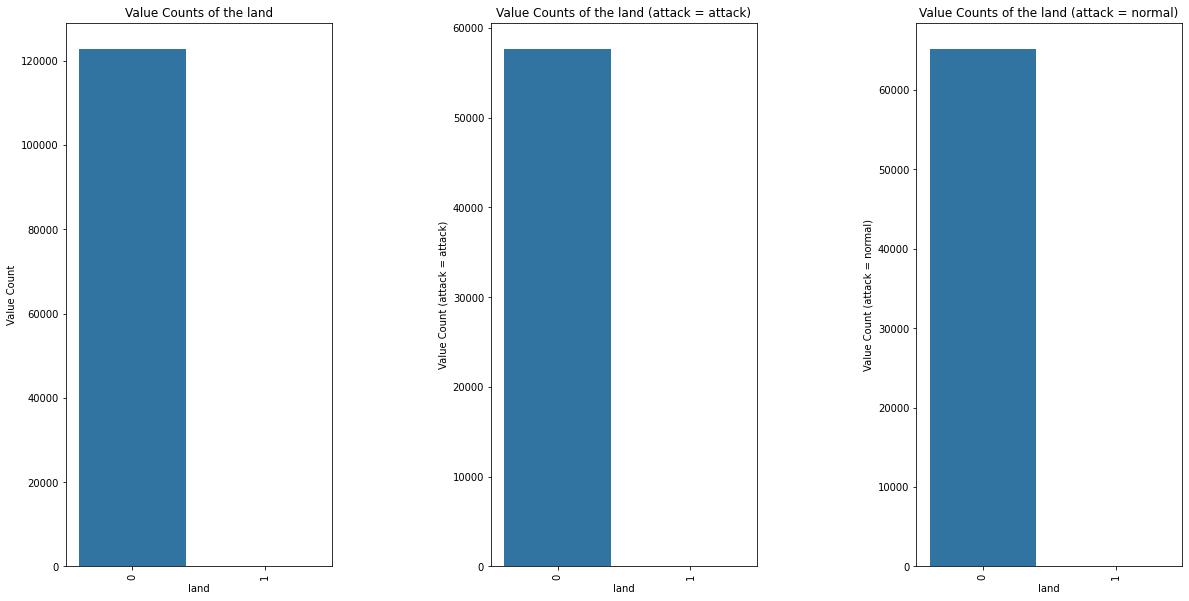

In [33]:
feature = "land"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 3
Min value is : 0
Histograms to analyze the wrong_fragment distribution


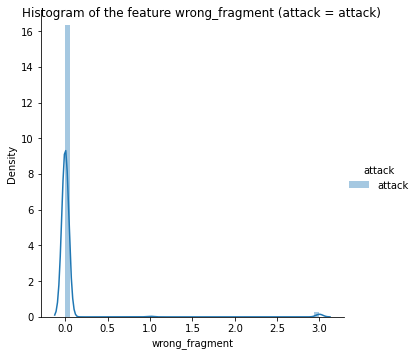

count    57709.000000
mean         0.049524
std          0.372805
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: wrong_fragment, dtype: float64


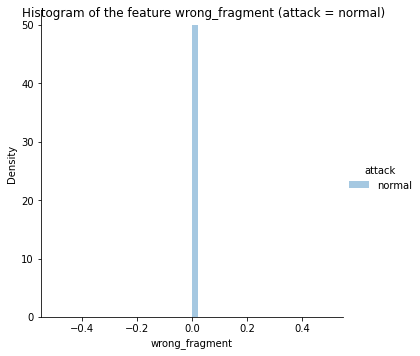

count    65184.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: wrong_fragment, dtype: float64


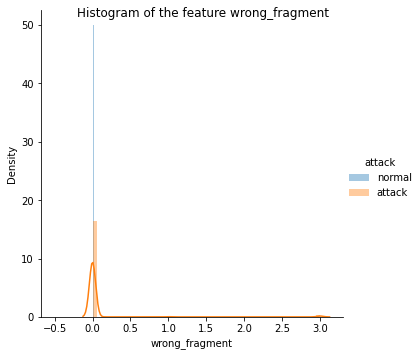

Box Plots to analyze the wrong_fragment distribution


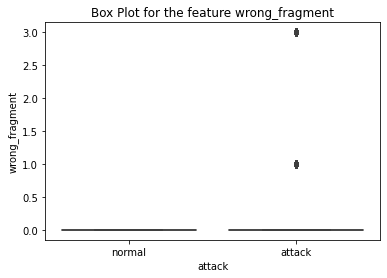

count    122893.000000
mean          0.023256
std           0.256662
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: wrong_fragment, dtype: float64


In [34]:
feature = "wrong_fragment"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

In [35]:
percentile_values(feature)

0-percentile value is 0.0
10-percentile value is 0.0
20-percentile value is 0.0
30-percentile value is 0.0
40-percentile value is 0.0
50-percentile value is 0.0
60-percentile value is 0.0
70-percentile value is 0.0
80-percentile value is 0.0
90-percentile value is 0.0
100-percentile value is 3.0
90-percentile value is 0.0
91-percentile value is 0.0
92-percentile value is 0.0
93-percentile value is 0.0
94-percentile value is 0.0
95-percentile value is 0.0
96-percentile value is 0.0
97-percentile value is 0.0
98-percentile value is 0.0
99-percentile value is 0.0
100-percentile value is 3.0
99.0-percentile value is 0.0
99.1-percentile value is 0.0
99.19999999999999-percentile value is 1.0
99.29999999999998-percentile value is 3.0
99.39999999999998-percentile value is 3.0
99.49999999999997-percentile value is 3.0
99.59999999999997-percentile value is 3.0
99.69999999999996-percentile value is 3.0
99.79999999999995-percentile value is 3.0
99.89999999999995-percentile value is 3.0
99.99999999

Max value is : 30
Min value is : 0
Histograms to analyze the hot distribution


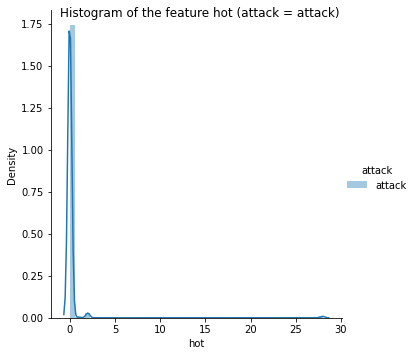

count    57709.000000
mean         0.170736
std          1.954004
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         28.000000
Name: hot, dtype: float64


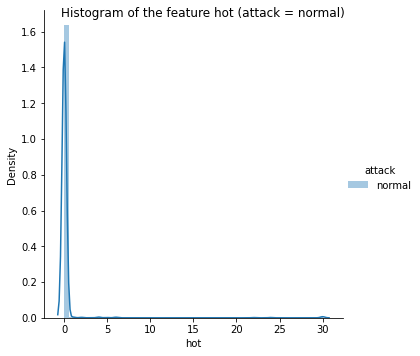

count    65184.000000
mean         0.232618
std          2.308681
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: hot, dtype: float64


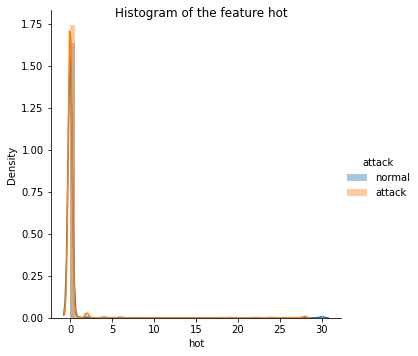

Box Plots to analyze the hot distribution


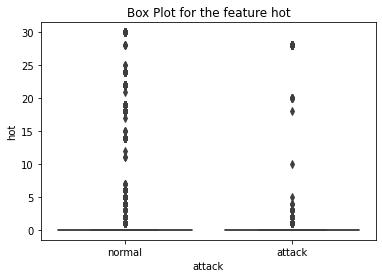

count    122893.000000
mean          0.203559
std           2.149643
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: hot, dtype: float64


In [36]:
feature = "hot"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

In [37]:
percentile_values(feature)

0-percentile value is 0.0
10-percentile value is 0.0
20-percentile value is 0.0
30-percentile value is 0.0
40-percentile value is 0.0
50-percentile value is 0.0
60-percentile value is 0.0
70-percentile value is 0.0
80-percentile value is 0.0
90-percentile value is 0.0
100-percentile value is 30.0
90-percentile value is 0.0
91-percentile value is 0.0
92-percentile value is 0.0
93-percentile value is 0.0
94-percentile value is 0.0
95-percentile value is 0.0
96-percentile value is 0.0
97-percentile value is 0.0
98-percentile value is 1.0
99-percentile value is 2.0
100-percentile value is 30.0
99.0-percentile value is 2.0
99.1-percentile value is 4.0
99.19999999999999-percentile value is 5.0
99.29999999999998-percentile value is 6.0
99.39999999999998-percentile value is 18.0
99.49999999999997-percentile value is 22.0
99.59999999999997-percentile value is 28.0
99.69999999999996-percentile value is 28.0
99.79999999999995-percentile value is 30.0
99.89999999999995-percentile value is 30.0
99.

In [38]:
feature ="hot"
print(train_data.shape)
train_data.drop(train_data[train_data[feature]>28].index, inplace = True)
print(train_data.shape)

(122893, 44)
(122637, 44)


Max value is : 5
Min value is : 0
Bar Plots to analyze the num_failed_logins distribution


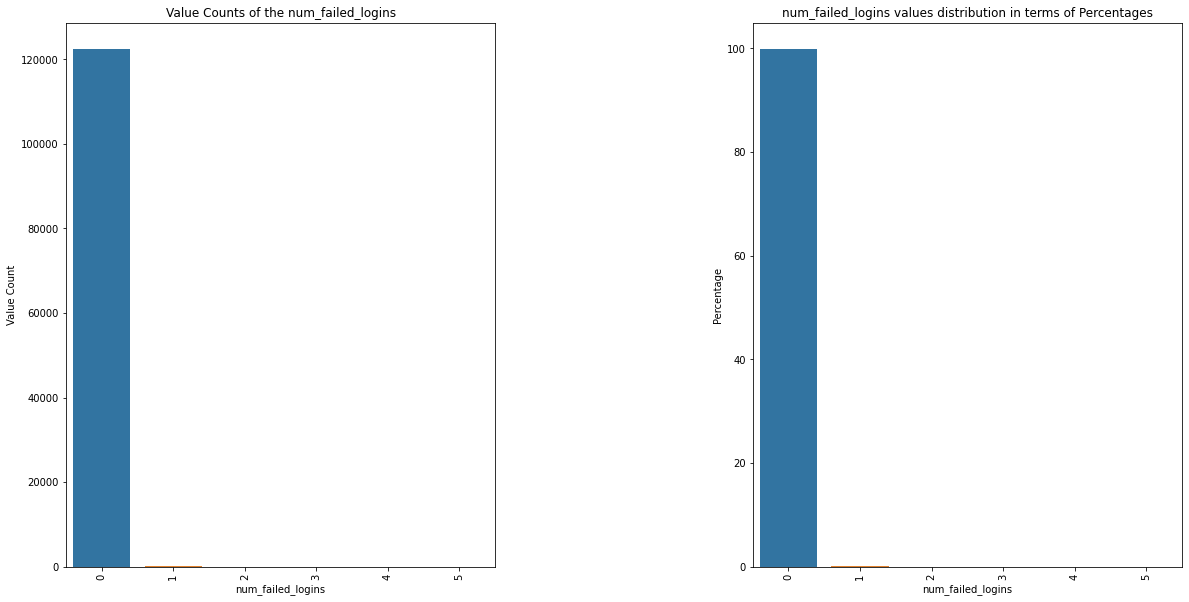

   num_failed_logins  counts  Percentage
0                  0  122527     99.9103
1                  1      98      0.0799
2                  3       4      0.0033
3                  2       4      0.0033
4                  4       3      0.0024
5                  5       1      0.0008


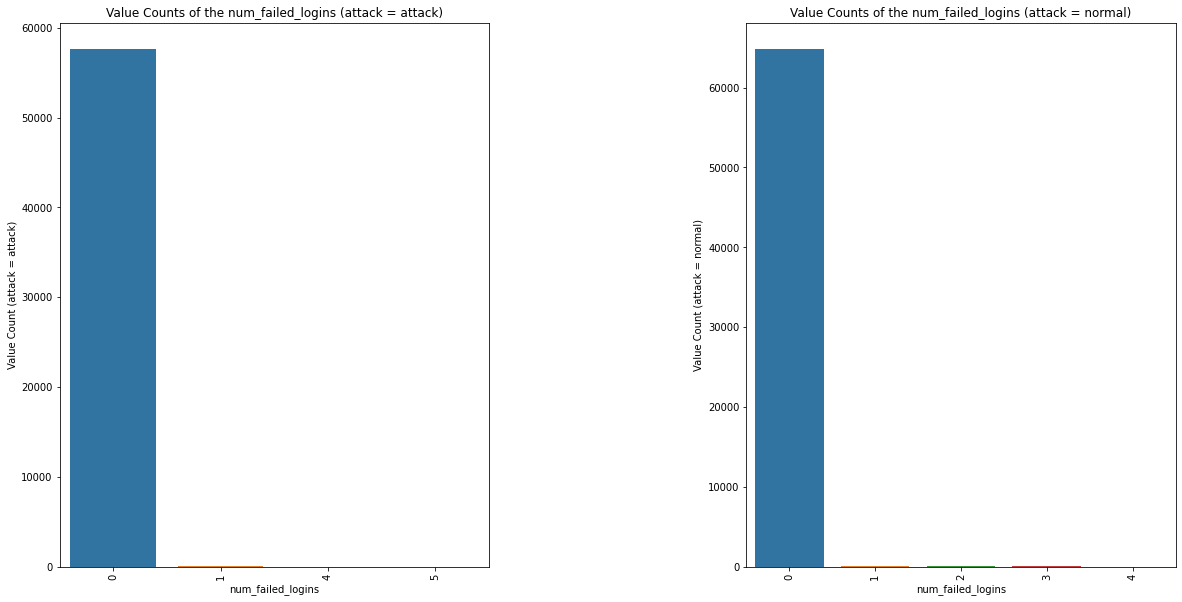

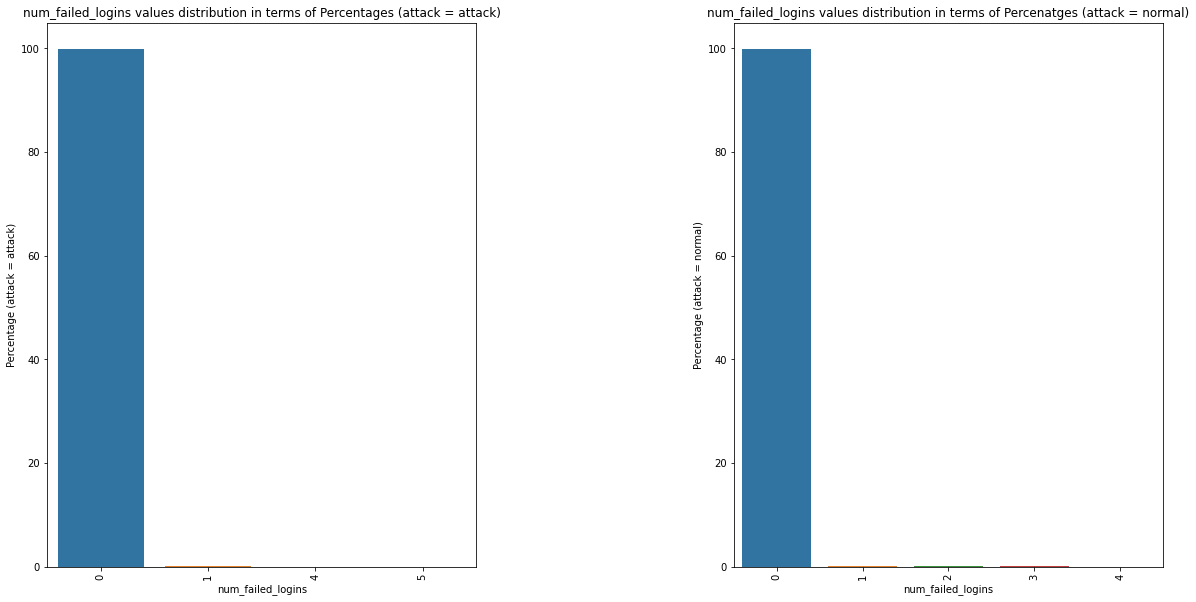

   num_failed_logins  Counts (attack = attack)  Percentage (attack = attack)
1                  0                     57655                       99.9064
2                  1                        52                        0.0901
7                  4                         1                        0.0017
8                  5                         1                        0.0017
   num_failed_logins  Counts (attack = normal)  Percentage (attack = normal)
0                  0                     64872                       99.9138
3                  1                        46                        0.0708
4                  2                         4                        0.0062
5                  3                         4                        0.0062
6                  4                         2                        0.0031


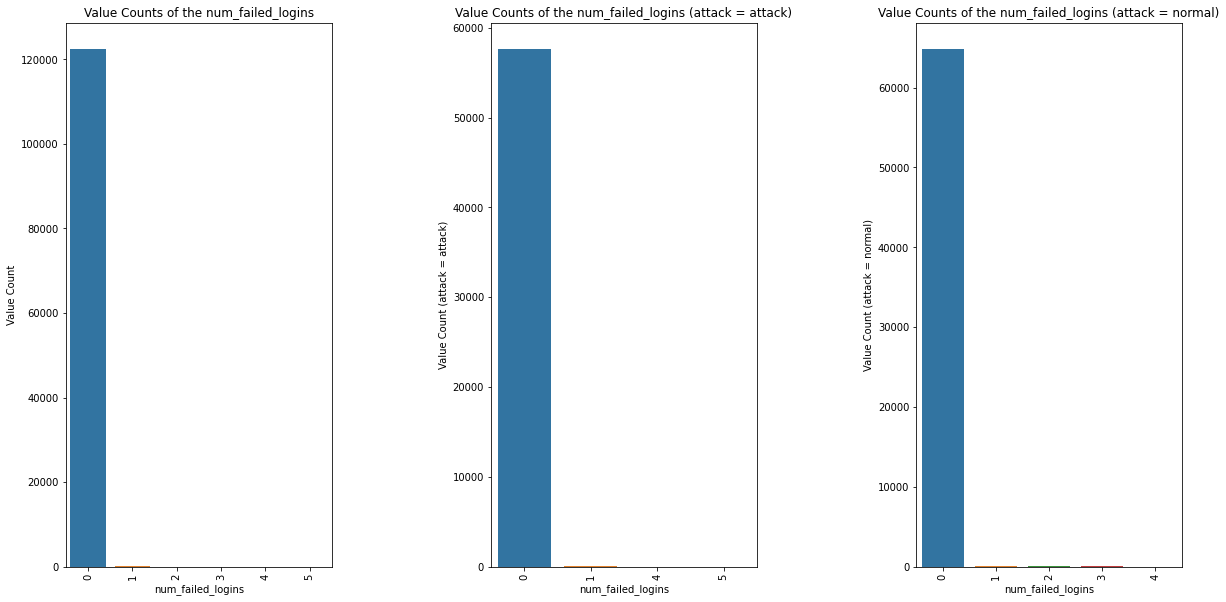

In [39]:
feature = "num_failed_logins"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 1
Min value is : 0
Bar Plots to analyze the logged_in distribution


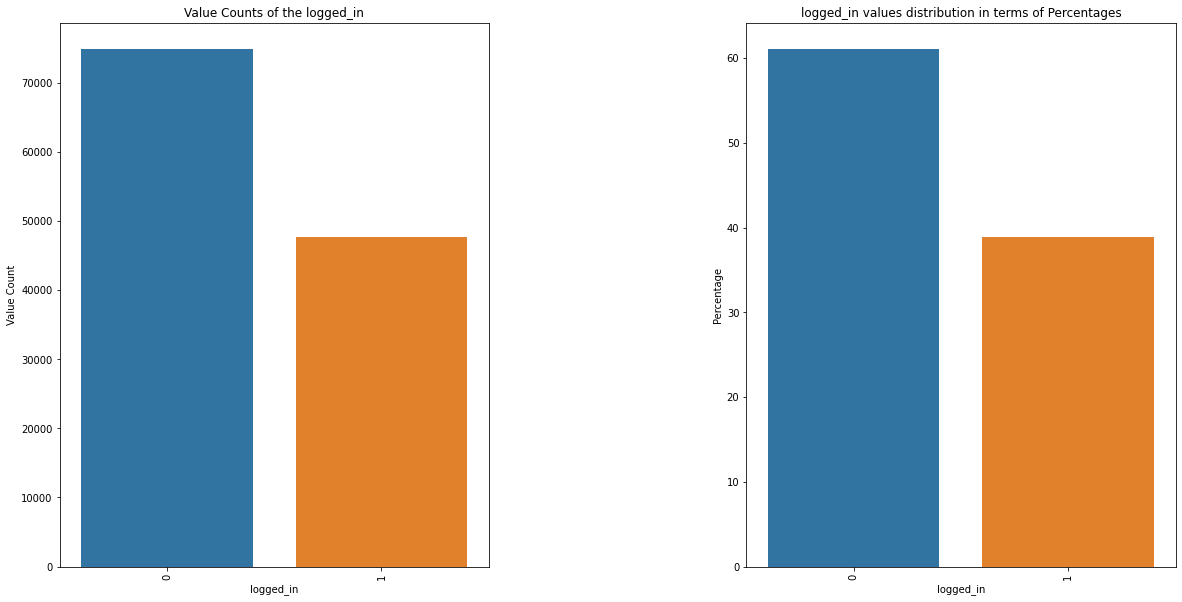

   logged_in  counts  Percentage
0          0   74930      61.099
1          1   47707      38.901


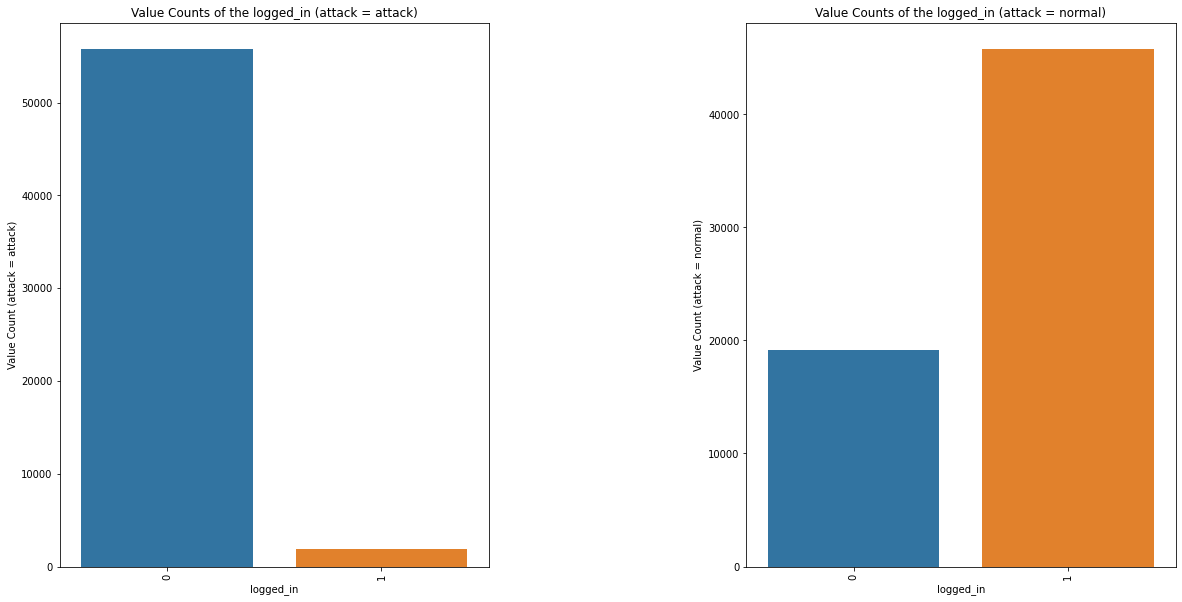

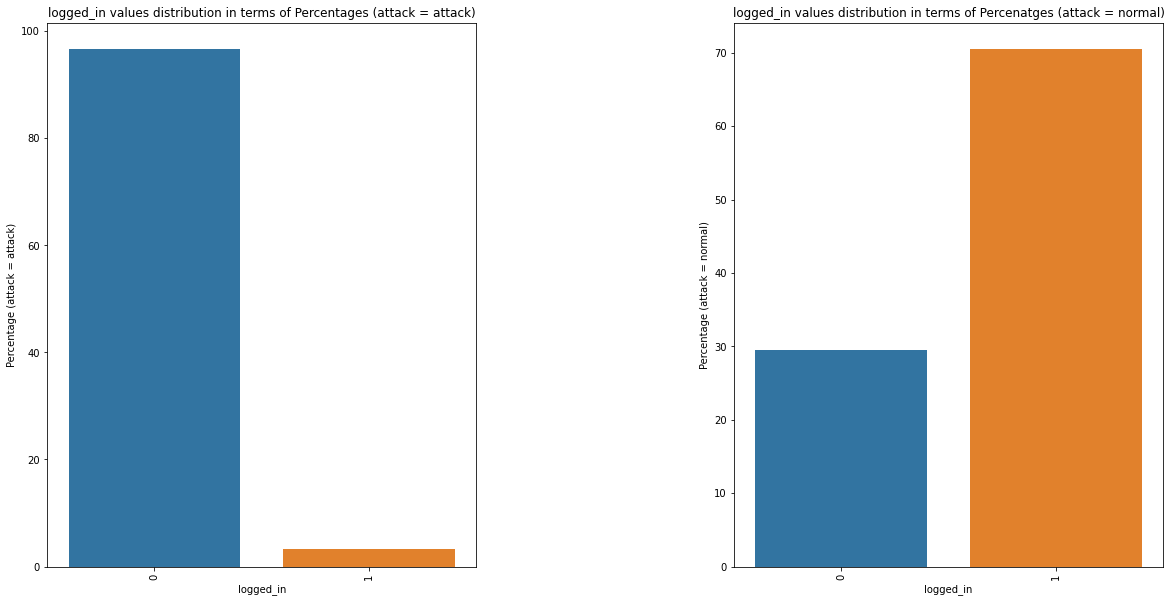

   logged_in  Counts (attack = attack)  Percentage (attack = attack)
0          0                     55800                        96.692
3          1                      1909                         3.308
   logged_in  Counts (attack = normal)  Percentage (attack = normal)
1          1                     45798                       70.5366
2          0                     19130                       29.4634


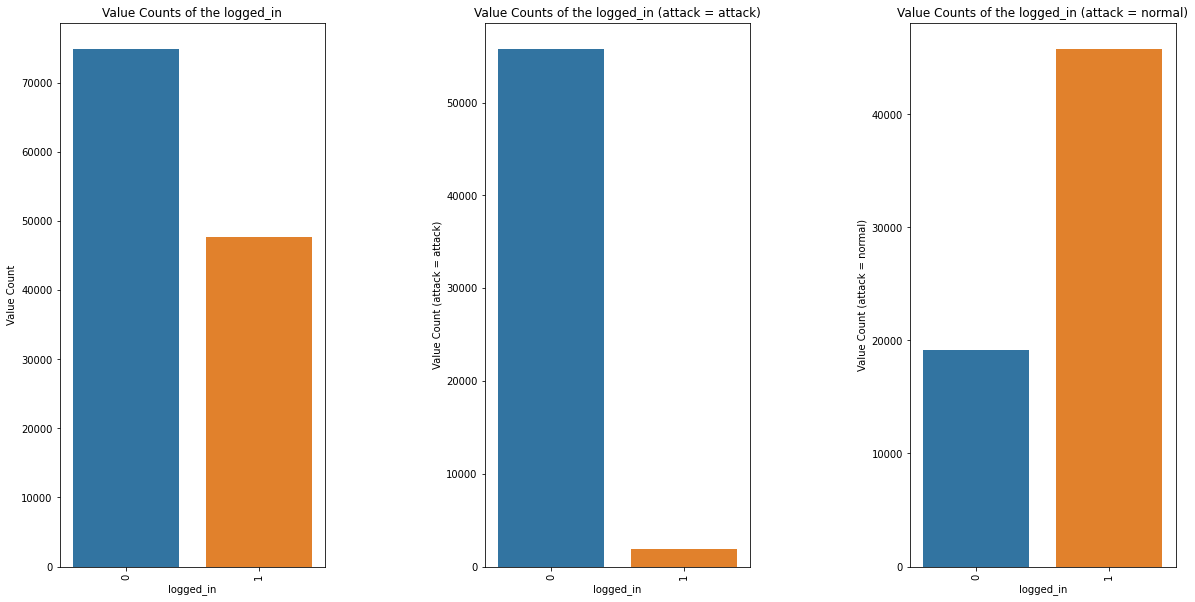

In [40]:
feature = "logged_in"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 121
Min value is : 0
Bar Plots to analyze the num_compromised distribution


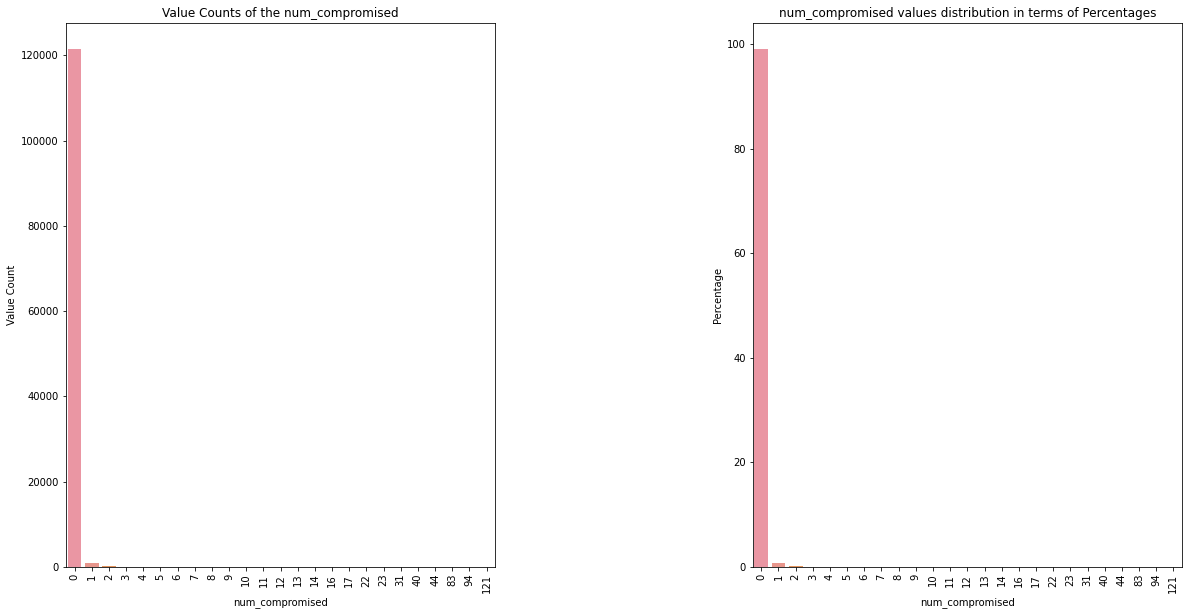

    num_compromised  counts  Percentage
0                 0  121502     99.0745
1                 1     941      0.7673
2                 2      75      0.0612
3                 4      33      0.0269
4                 3      31      0.0253
5                 6      16      0.0130
6                 5      14      0.0114
7                 7       3      0.0024
8                10       2      0.0016
9                12       2      0.0016
10               13       2      0.0016
11                8       2      0.0016
12                9       2      0.0016
13               14       1      0.0008
14               94       1      0.0008
15               16       1      0.0008
16               22       1      0.0008
17               40       1      0.0008
18               83       1      0.0008
19               17       1      0.0008
20              121       1      0.0008
21               44       1      0.0008
22               23       1      0.0008
23               31       1      0.0008


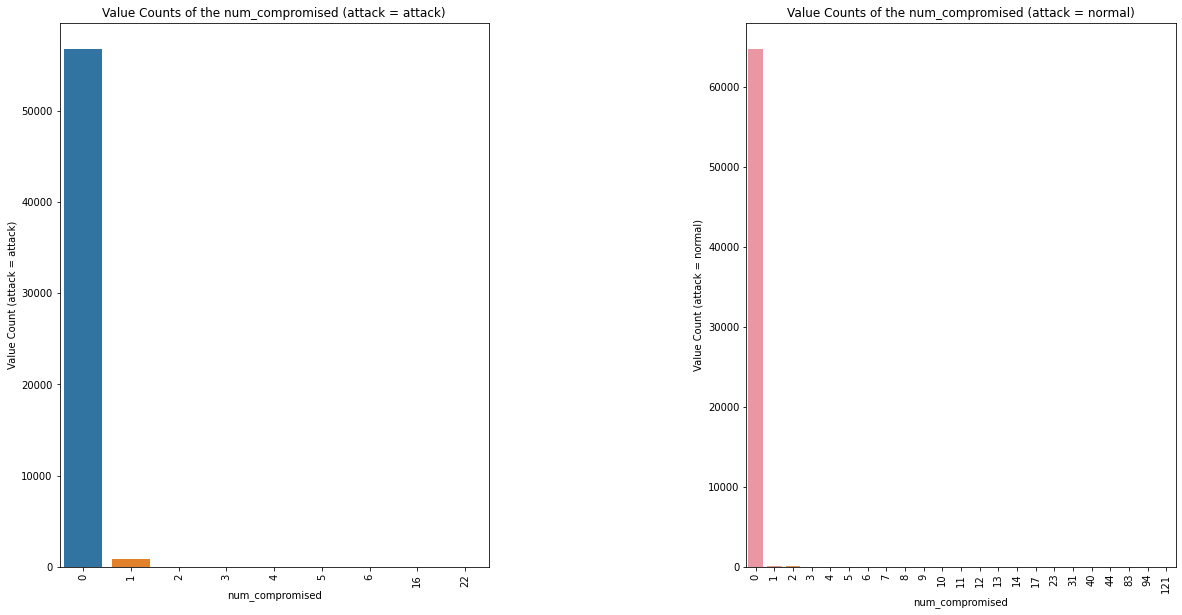

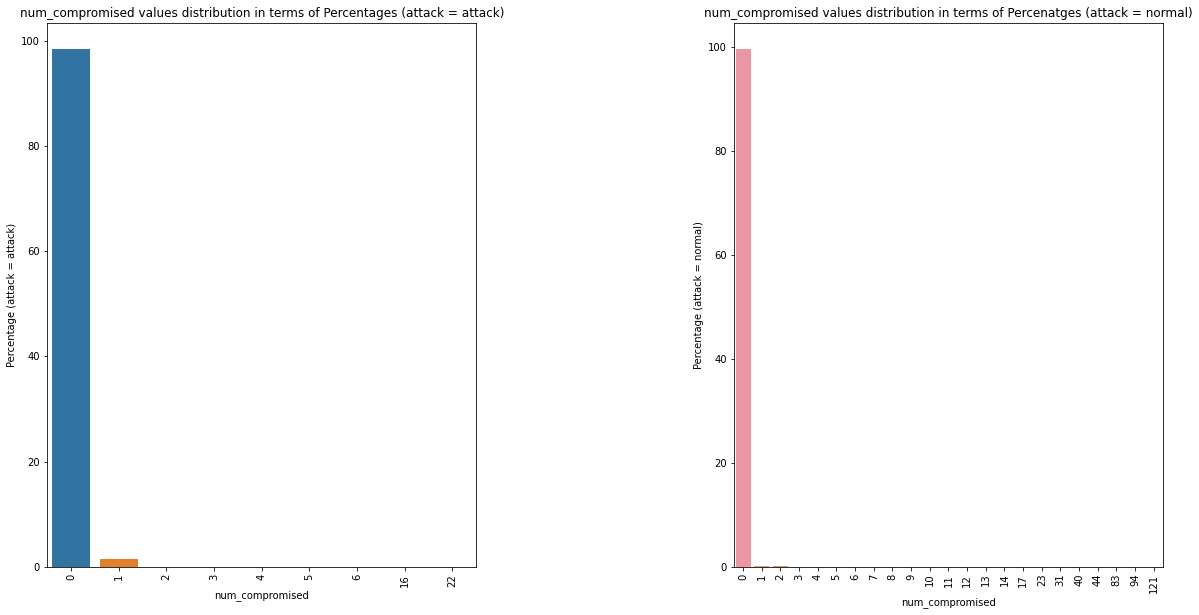

    num_compromised  Counts (attack = attack)  Percentage (attack = attack)
1                 0                     56799                       98.4231
2                 1                       891                        1.5440
9                 2                         8                        0.0139
10                4                         6                        0.0104
17                6                         1                        0.0017
19                5                         1                        0.0017
20                3                         1                        0.0017
22               16                         1                        0.0017
24               22                         1                        0.0017
    num_compromised  Counts (attack = normal)  Percentage (attack = normal)
0                 0                     64703                       99.6535
3                 2                        67                        0.1032
4           

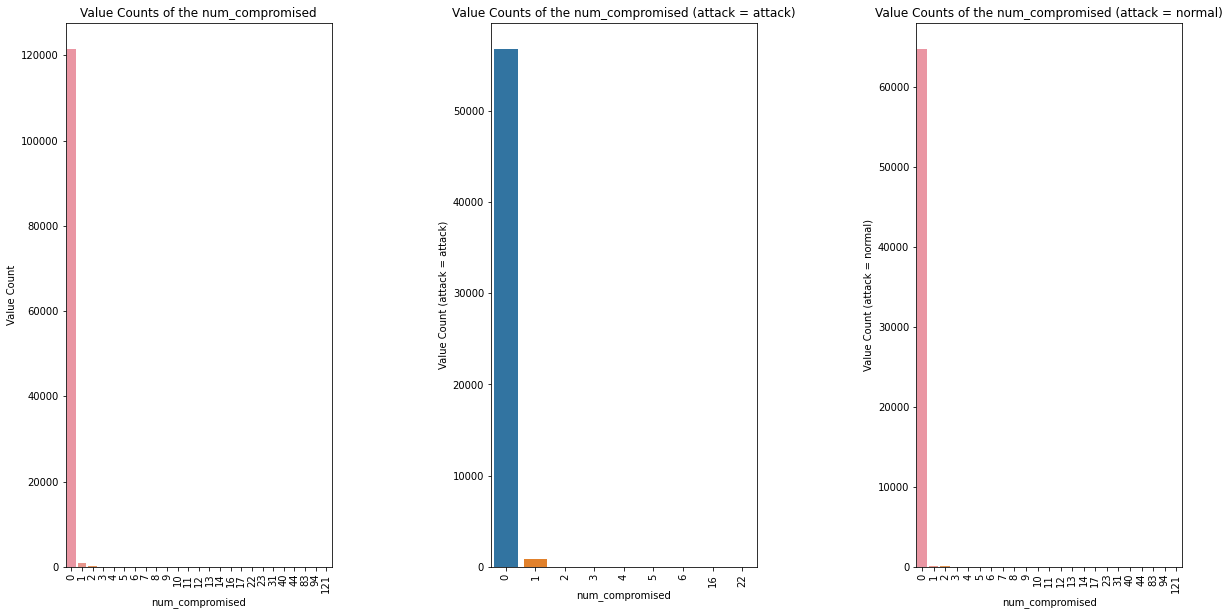

In [41]:
feature = "num_compromised"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 1
Min value is : 0
Bar Plots to analyze the root_shell distribution


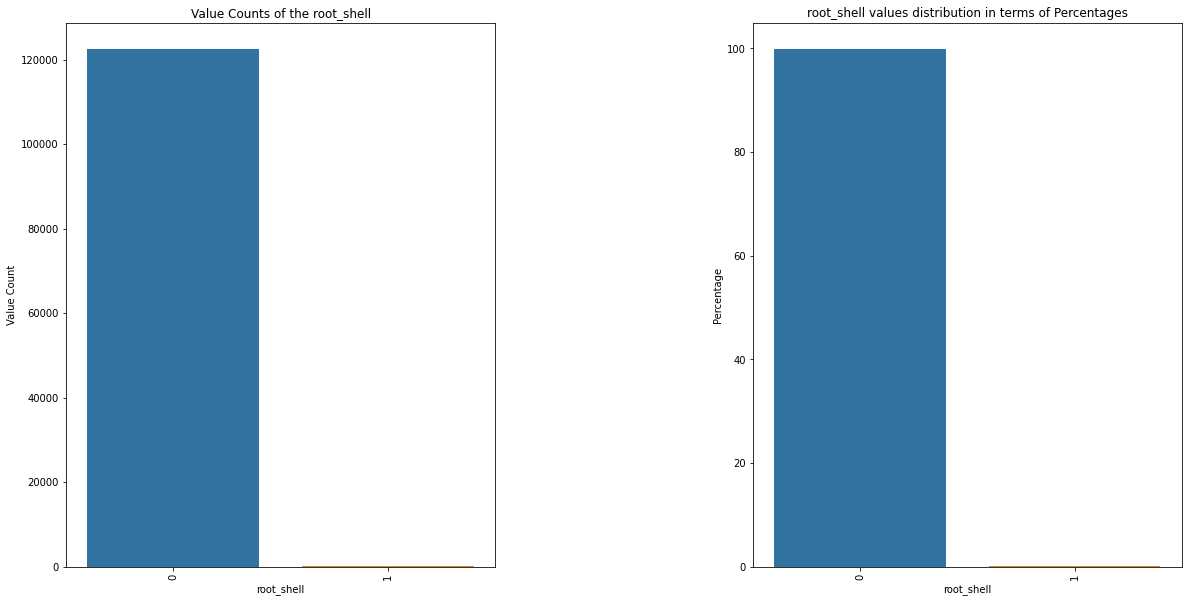

   root_shell  counts  Percentage
0           0  122558     99.9356
1           1      79      0.0644


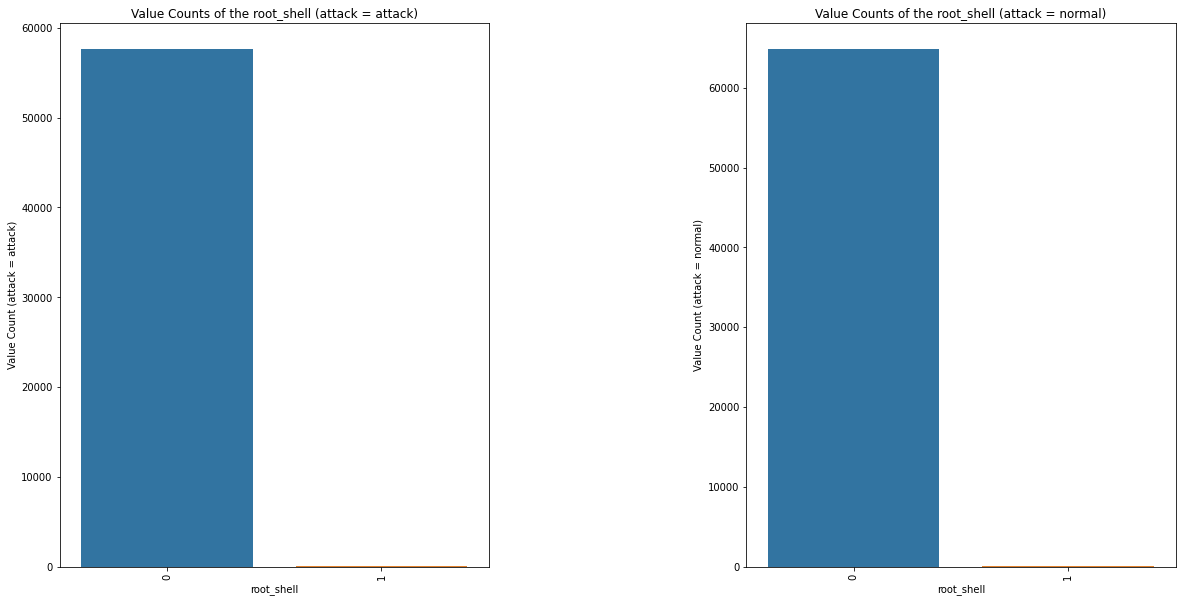

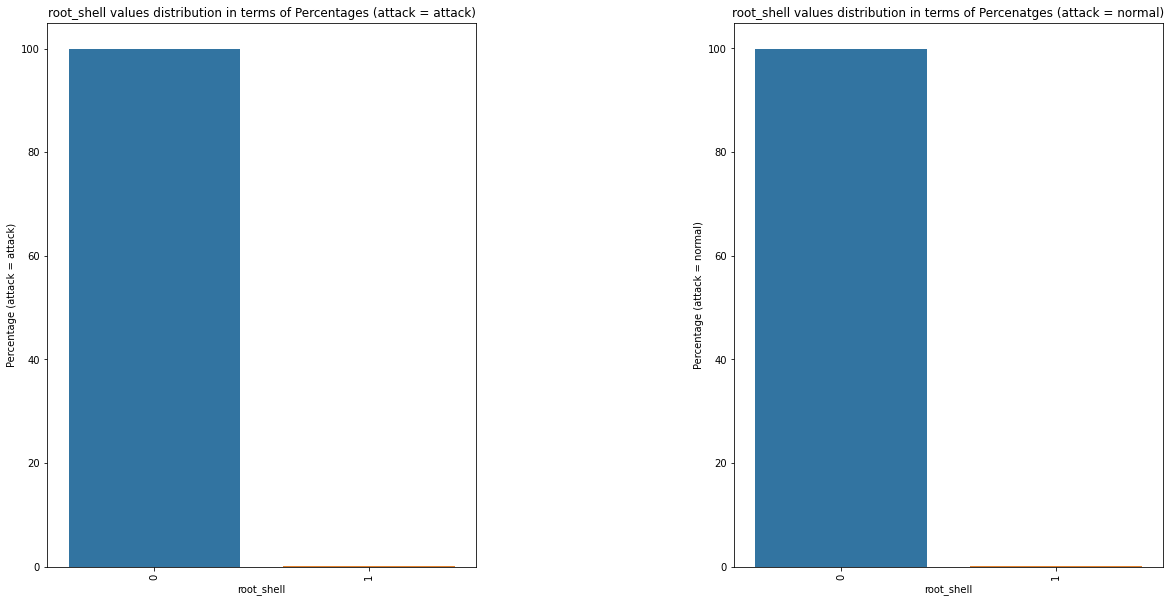

   root_shell  Counts (attack = attack)  Percentage (attack = attack)
1           0                     57678                       99.9463
3           1                        31                        0.0537
   root_shell  Counts (attack = normal)  Percentage (attack = normal)
0           0                     64880                       99.9261
2           1                        48                        0.0739


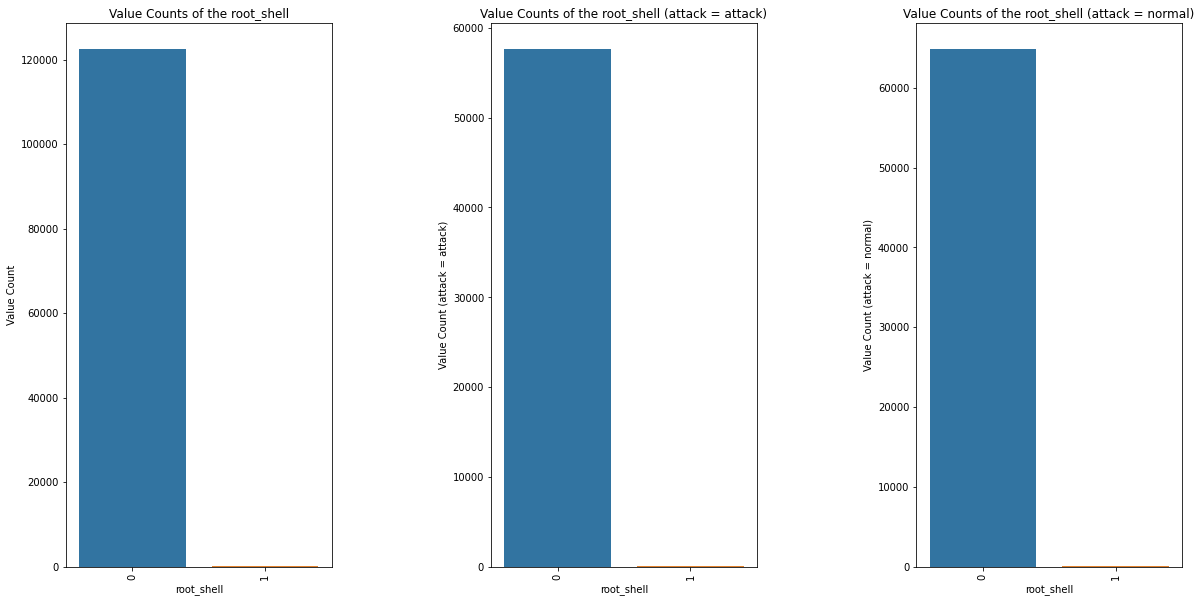

In [42]:
feature = "root_shell"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 2
Min value is : 0
Bar Plots to analyze the su_attempted distribution


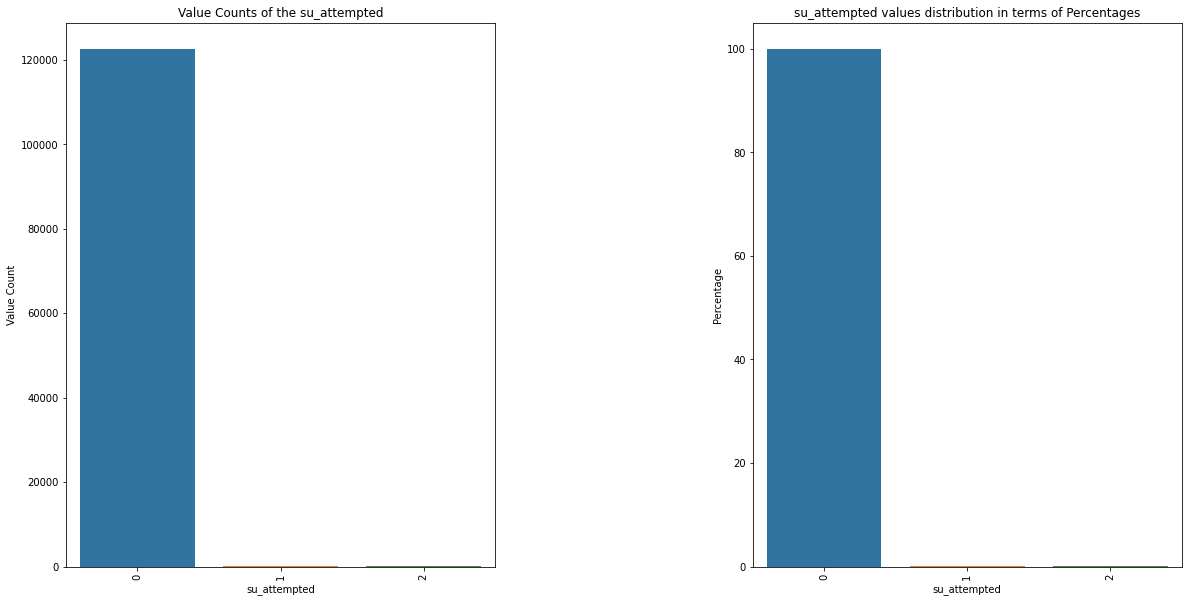

   su_attempted  counts  Percentage
0             0  122623     99.9886
1             1       9      0.0073
2             2       5      0.0041


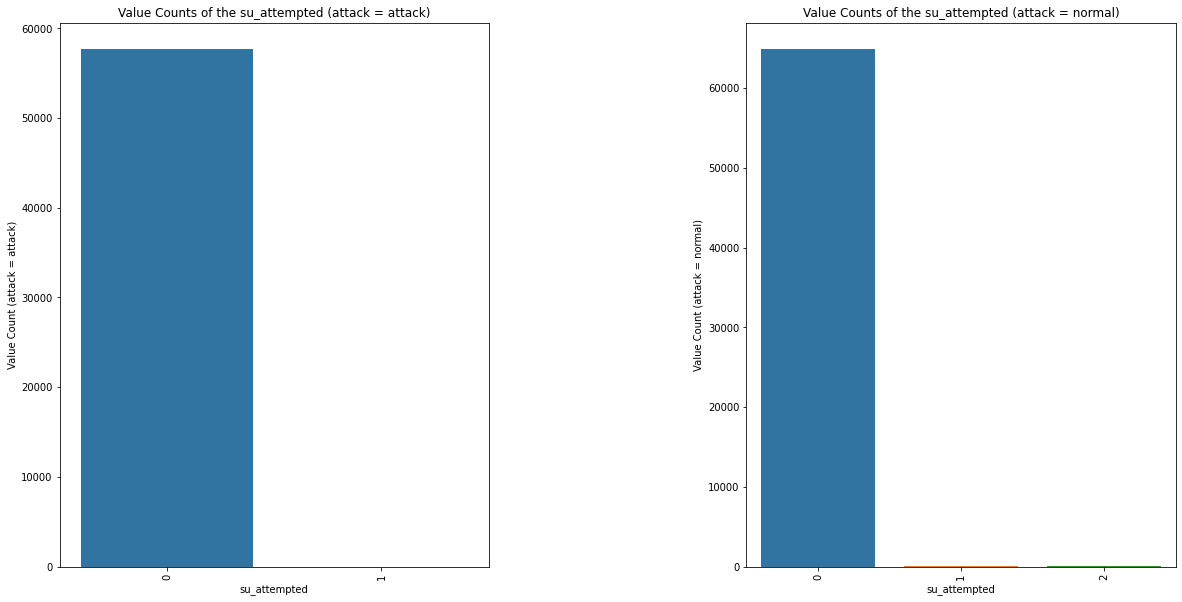

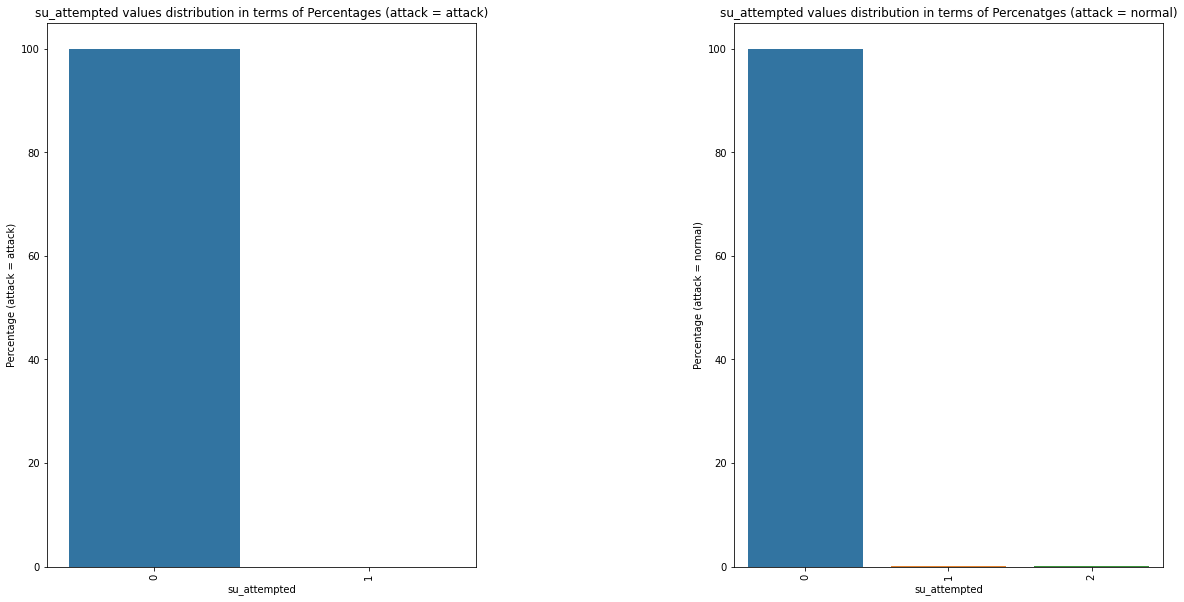

   su_attempted  Counts (attack = attack)  Percentage (attack = attack)
1             0                     57708                       99.9983
4             1                         1                        0.0017
   su_attempted  Counts (attack = normal)  Percentage (attack = normal)
0             0                     64915                       99.9800
2             1                         8                        0.0123
3             2                         5                        0.0077


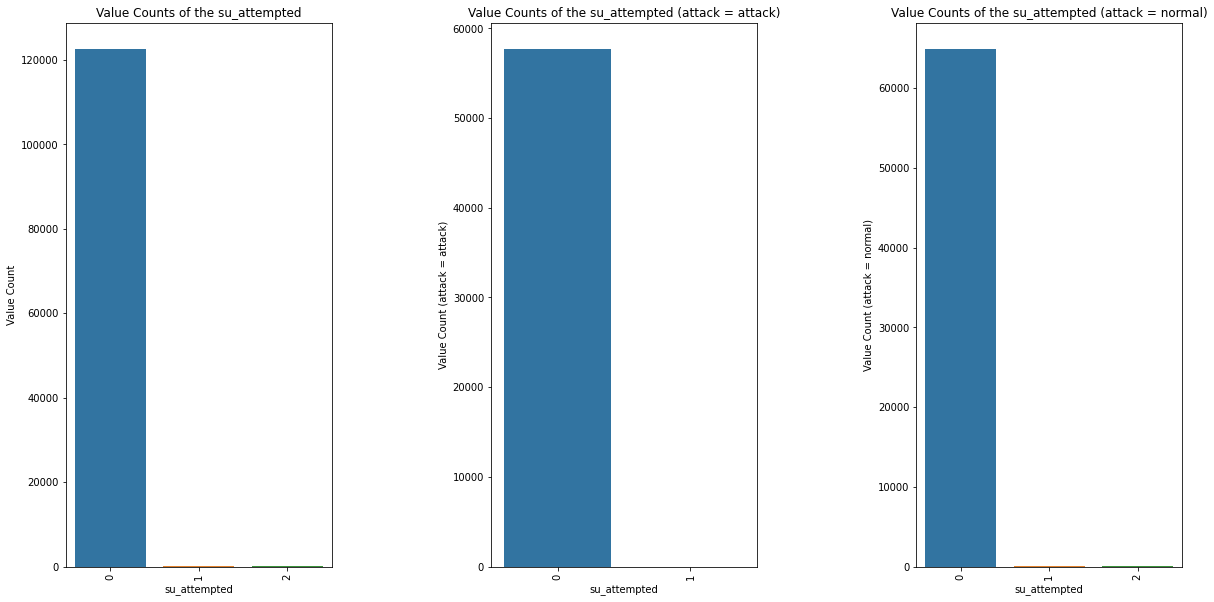

In [43]:
feature = "su_attempted"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 123
Min value is : 0
Bar Plots to analyze the num_root distribution


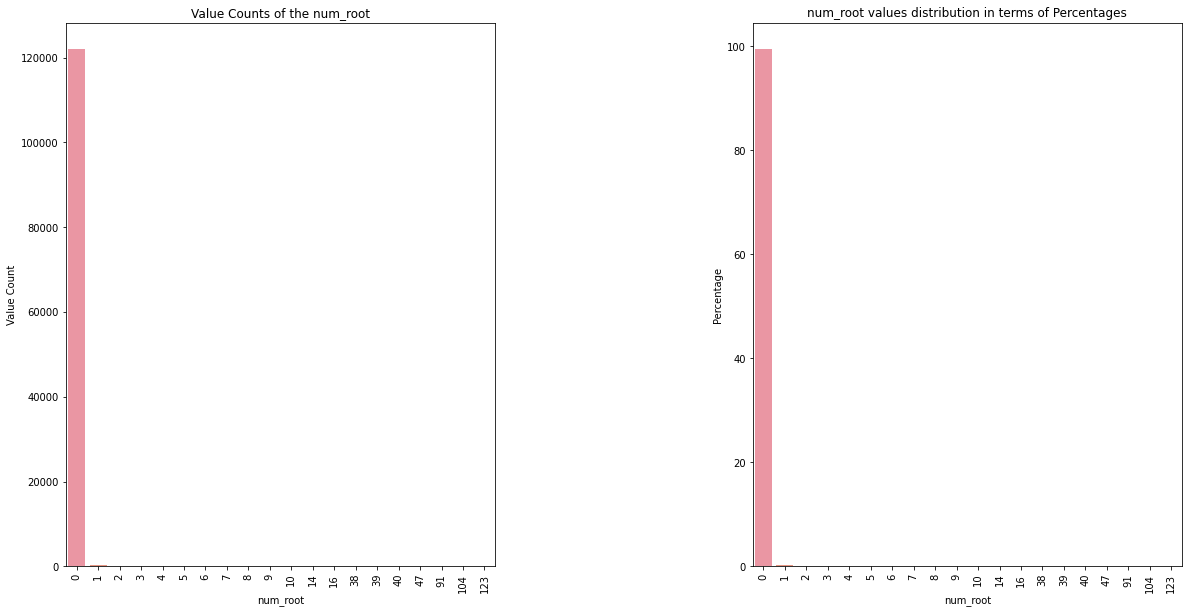

    num_root  counts  Percentage
0          0  122118     99.5768
1          1     237      0.1933
2          9     120      0.0978
3          6      97      0.0791
4          5      24      0.0196
5          2      19      0.0155
6          4       6      0.0049
7          3       3      0.0024
8          7       2      0.0016
9         38       1      0.0008
10        91       1      0.0008
11        14       1      0.0008
12        47       1      0.0008
13       123       1      0.0008
14        40       1      0.0008
15         8       1      0.0008
16        39       1      0.0008
17        10       1      0.0008
18        16       1      0.0008
19       104       1      0.0008


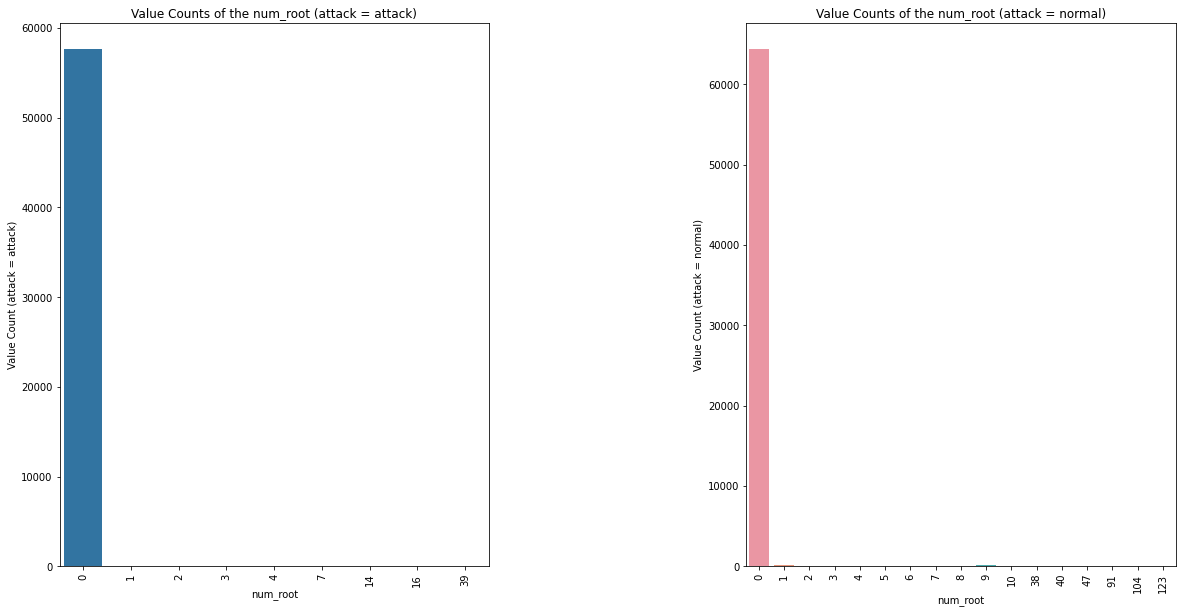

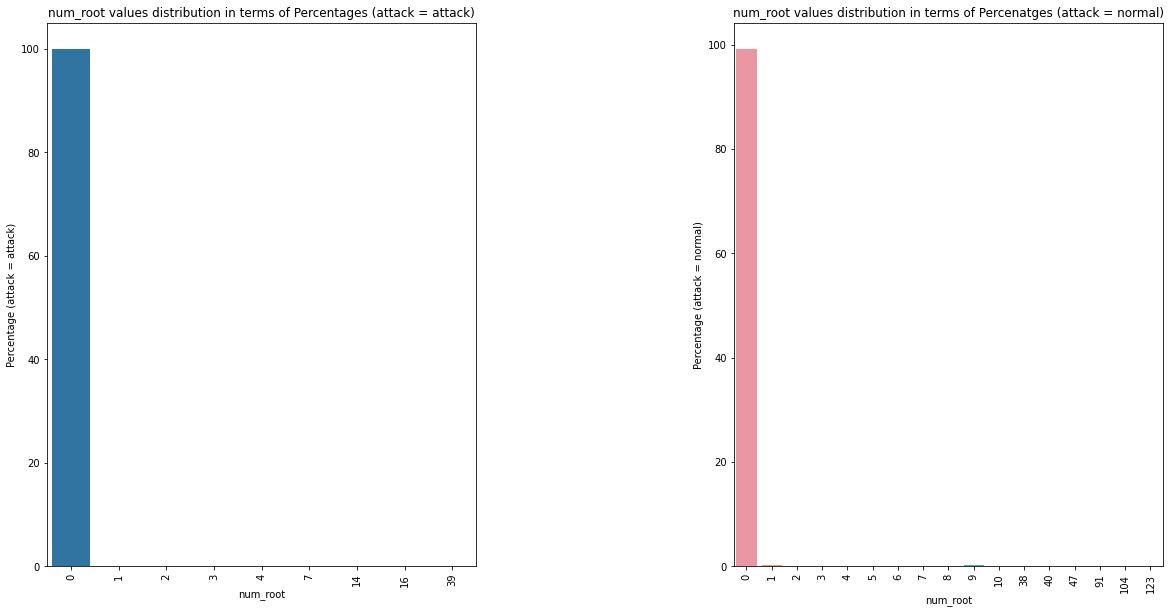

    num_root  Counts (attack = attack)  Percentage (attack = attack)
1          0                     57694                       99.9740
8          1                         5                        0.0087
9          2                         4                        0.0069
12        16                         1                        0.0017
16        39                         1                        0.0017
19        14                         1                        0.0017
22         7                         1                        0.0017
23         4                         1                        0.0017
24         3                         1                        0.0017
    num_root  Counts (attack = normal)  Percentage (attack = normal)
0          0                     64424                       99.2238
2          1                       232                        0.3573
3          9                       120                        0.1848
4          6                      

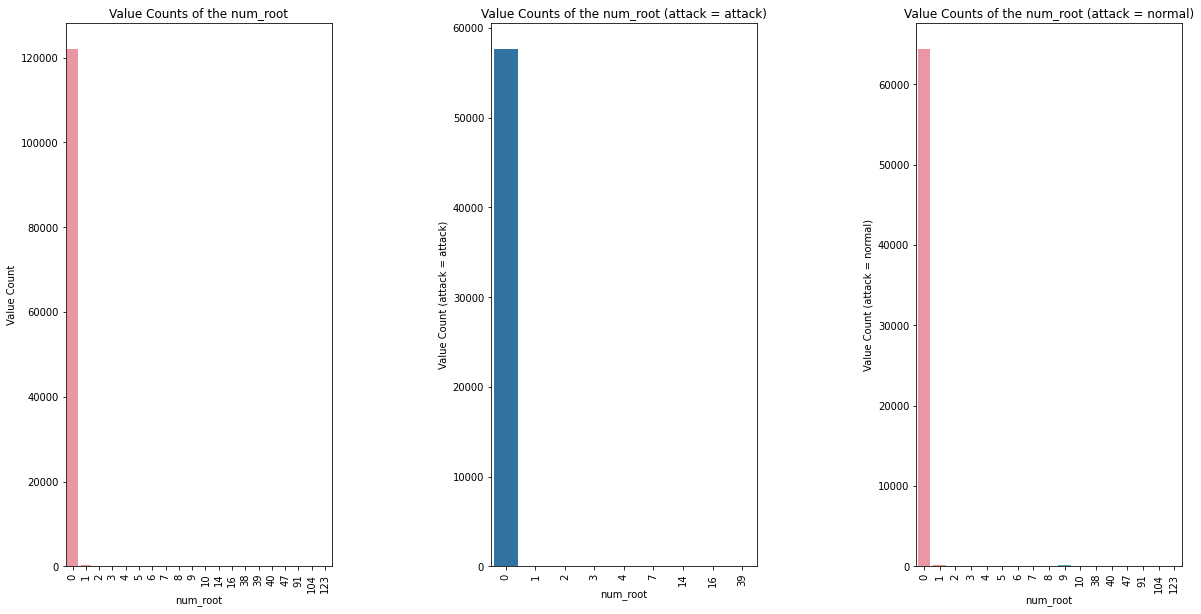

In [44]:
feature = "num_root"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 21
Min value is : 0
Bar Plots to analyze the num_file_creations distribution


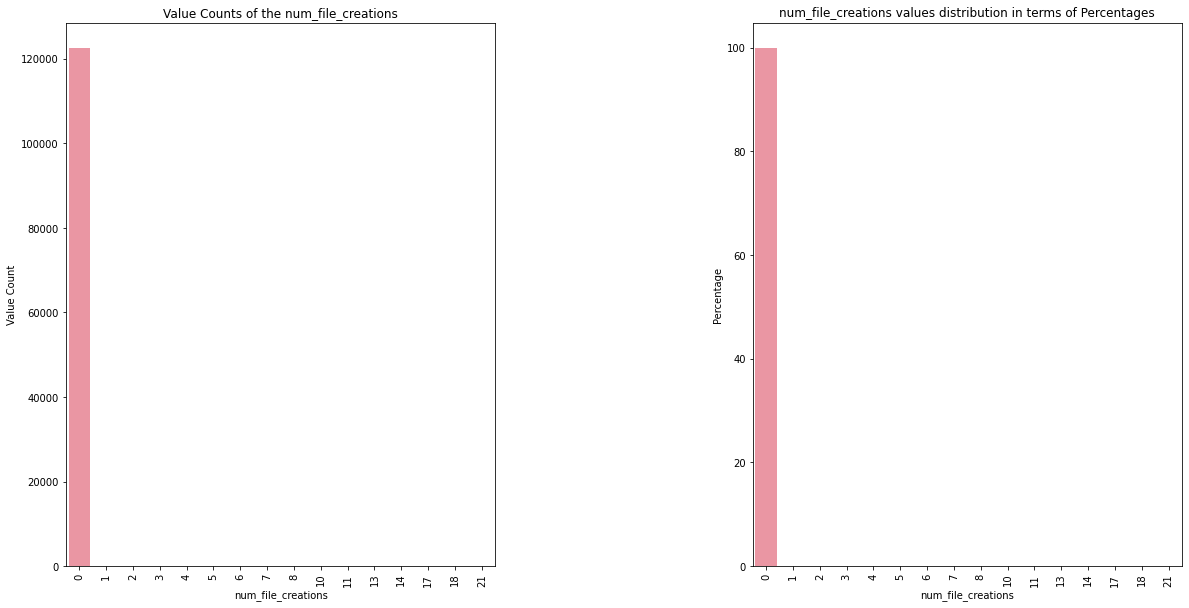

    num_file_creations  counts  Percentage
0                    0  122433     99.8337
1                    1     140      0.1142
2                    2      37      0.0302
3                    4      10      0.0082
4                    5       3      0.0024
5                    7       3      0.0024
6                    8       2      0.0016
7                   18       1      0.0008
8                   14       1      0.0008
9                   21       1      0.0008
10                   3       1      0.0008
11                  11       1      0.0008
12                  13       1      0.0008
13                  10       1      0.0008
14                   6       1      0.0008
15                  17       1      0.0008


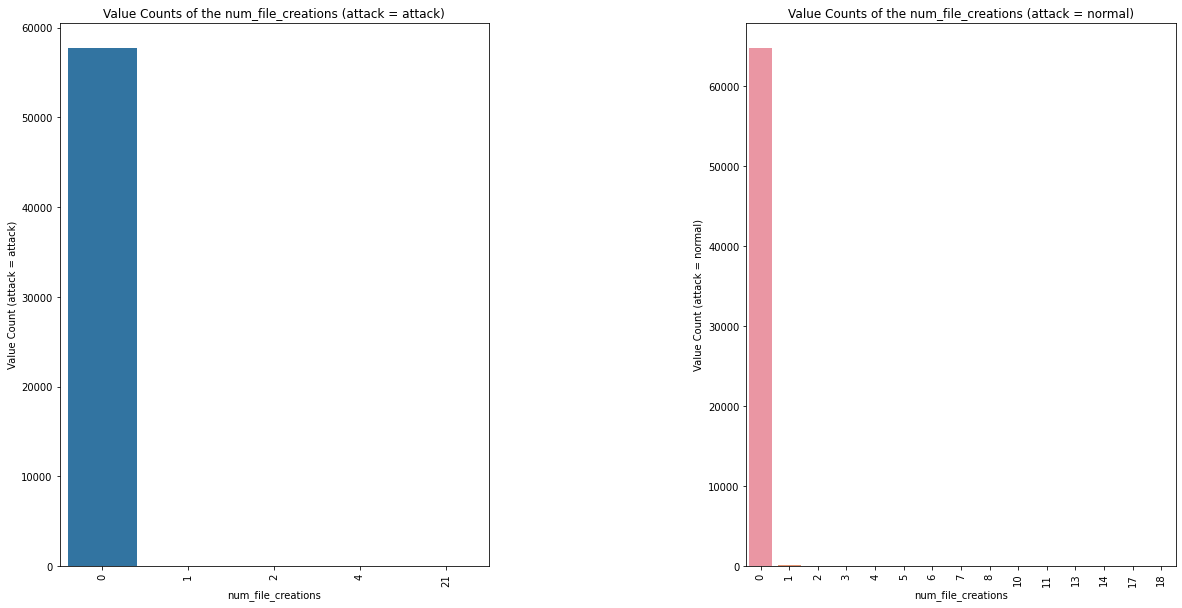

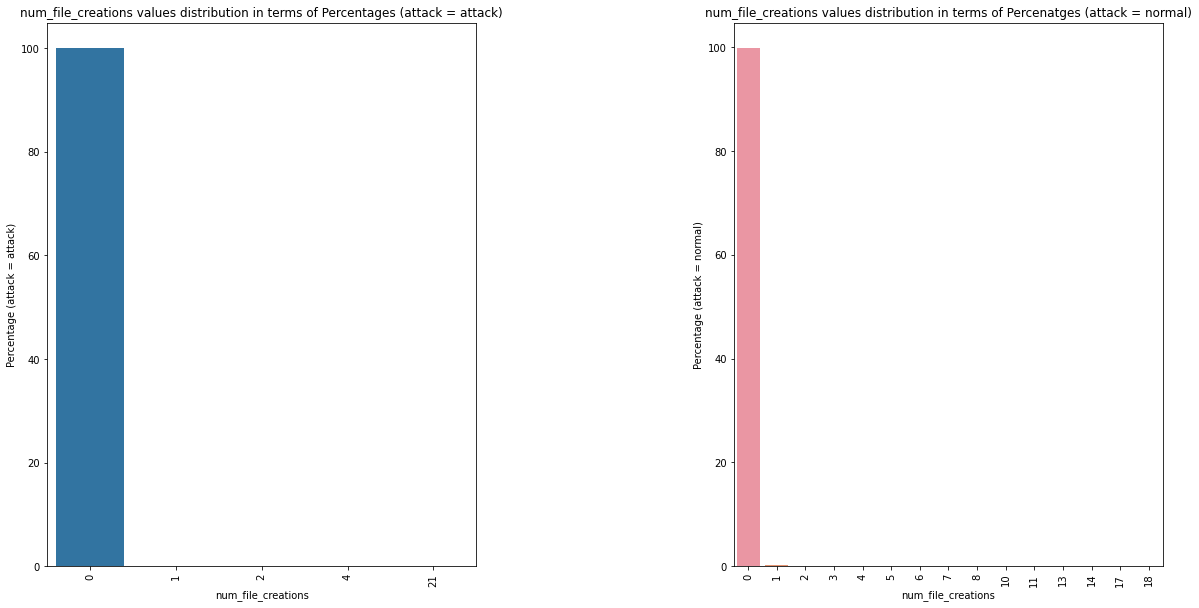

    num_file_creations  Counts (attack = attack)  Percentage (attack = attack)
1                    0                     57678                       99.9463
4                    1                        21                        0.0364
5                    4                         5                        0.0087
7                    2                         4                        0.0069
19                  21                         1                        0.0017
    num_file_creations  Counts (attack = normal)  Percentage (attack = normal)
0                    0                     64755                       99.7336
2                    1                       119                        0.1833
3                    2                        33                        0.0508
6                    4                         5                        0.0077
8                    5                         3                        0.0046
9                    7                         3    

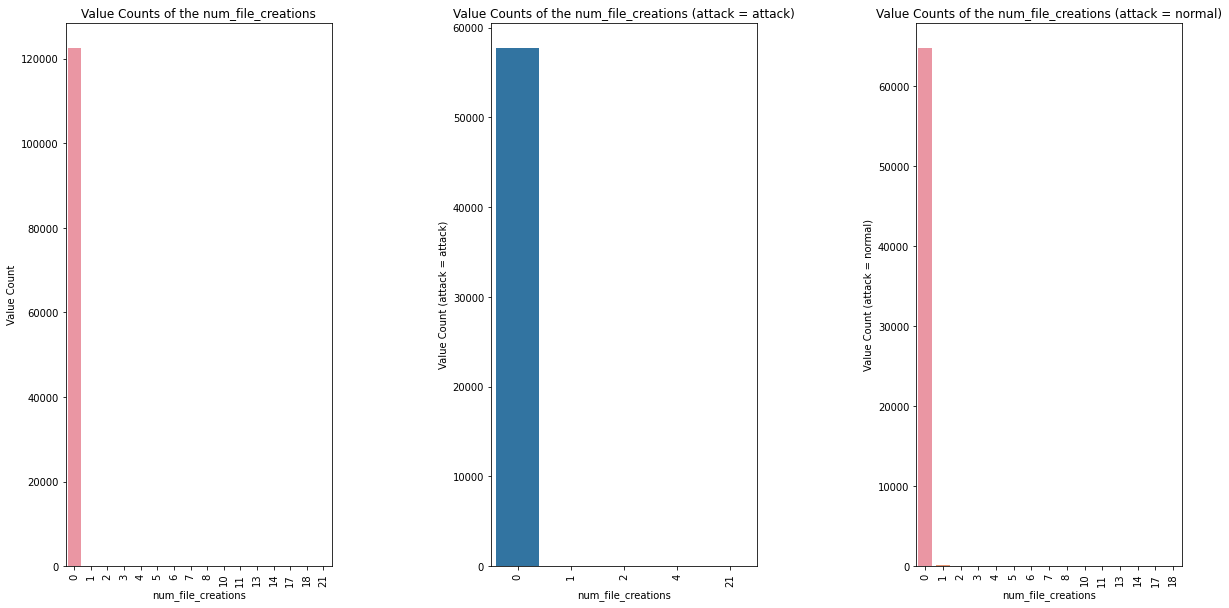

In [45]:
feature = "num_file_creations"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 2
Min value is : 0
Bar Plots to analyze the num_shells distribution


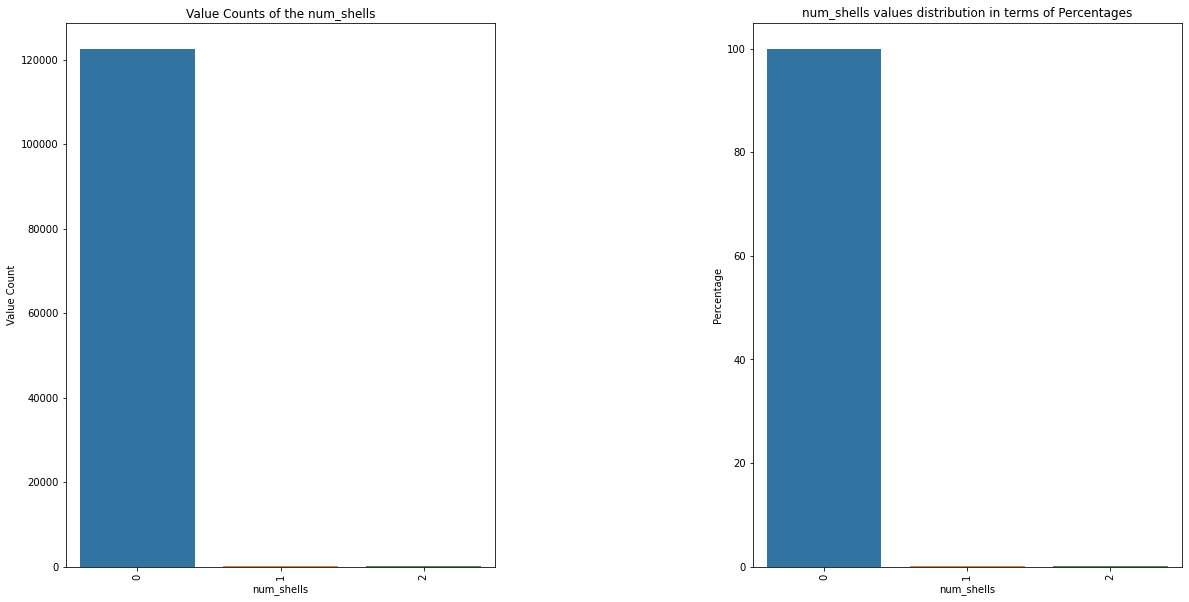

   num_shells  counts  Percentage
0           0  122591     99.9625
1           1      41      0.0334
2           2       5      0.0041


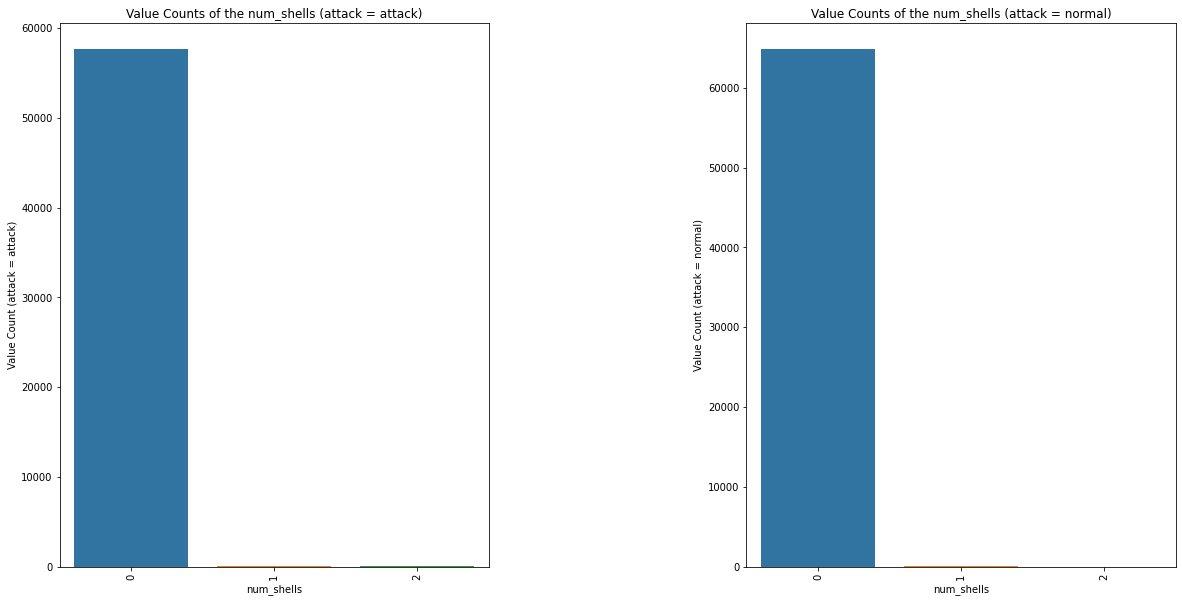

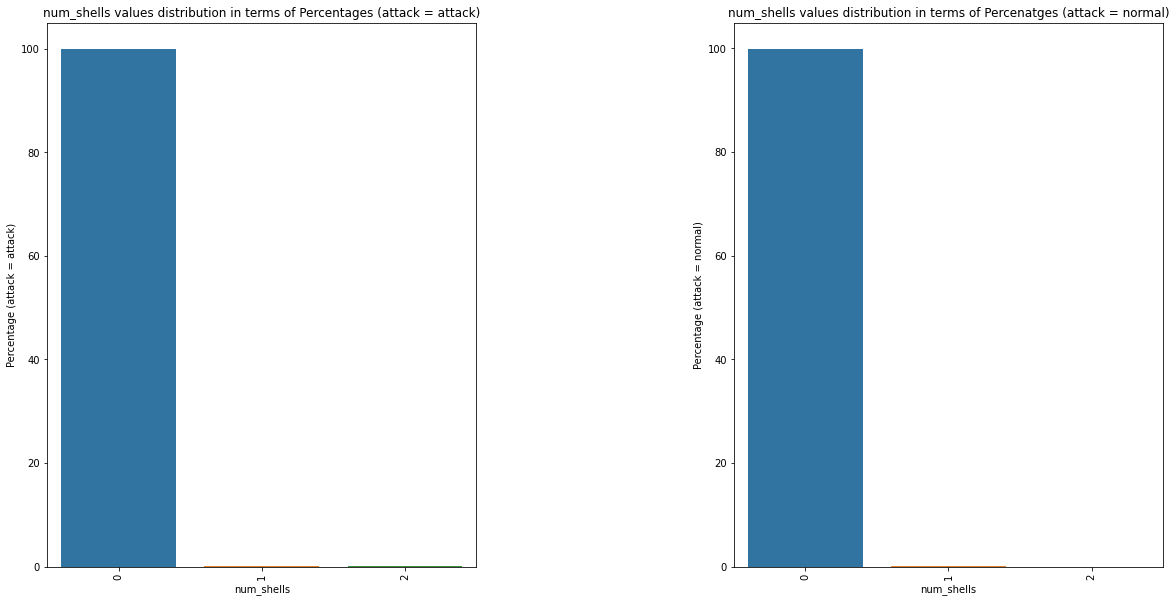

   num_shells  Counts (attack = attack)  Percentage (attack = attack)
1           0                     57702                       99.9879
3           1                         4                        0.0069
4           2                         3                        0.0052
   num_shells  Counts (attack = normal)  Percentage (attack = normal)
0           0                     64889                       99.9399
2           1                        37                        0.0570
5           2                         2                        0.0031


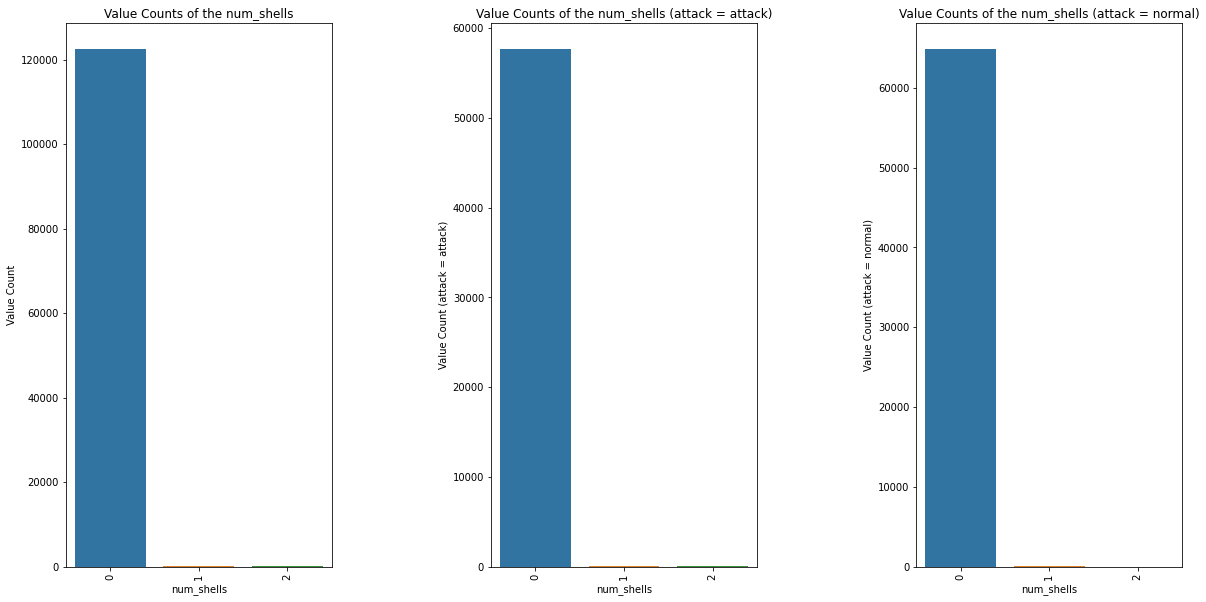

In [46]:
feature = "num_shells"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 2
Min value is : 0
Bar Plots to analyze the num_access_files distribution


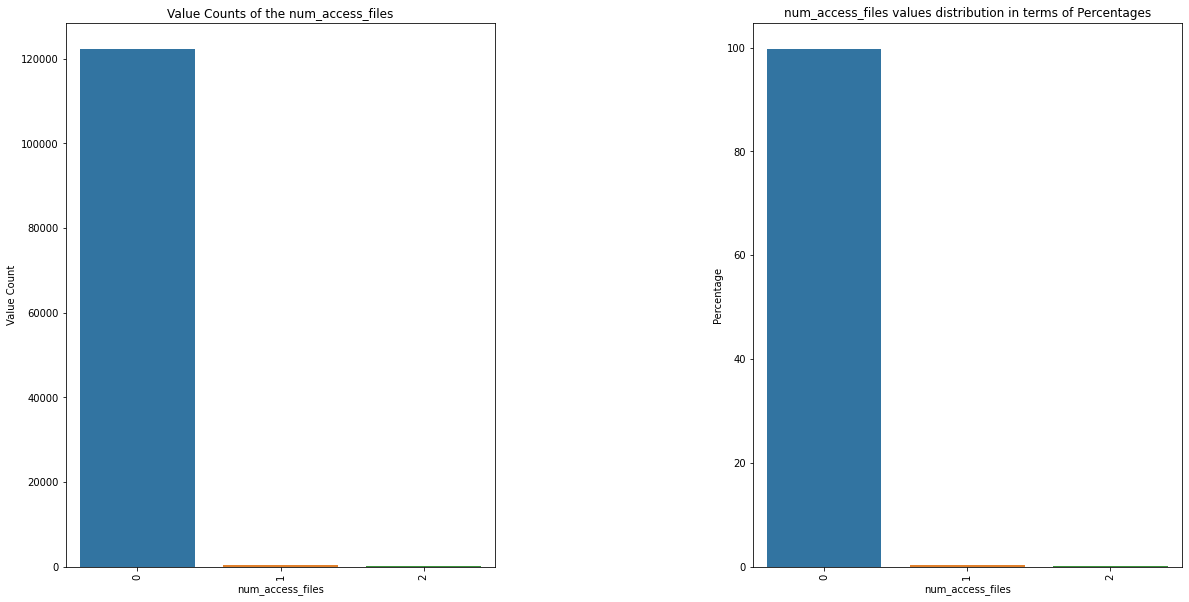

   num_access_files  counts  Percentage
0                 0  122332     99.7513
1                 1     284      0.2316
2                 2      21      0.0171


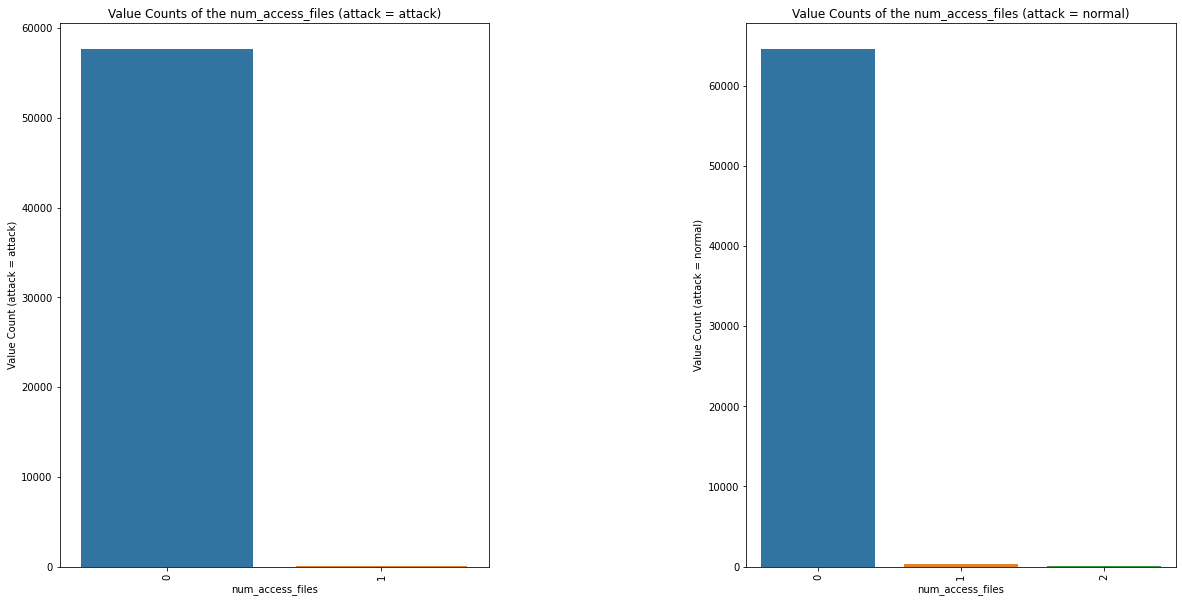

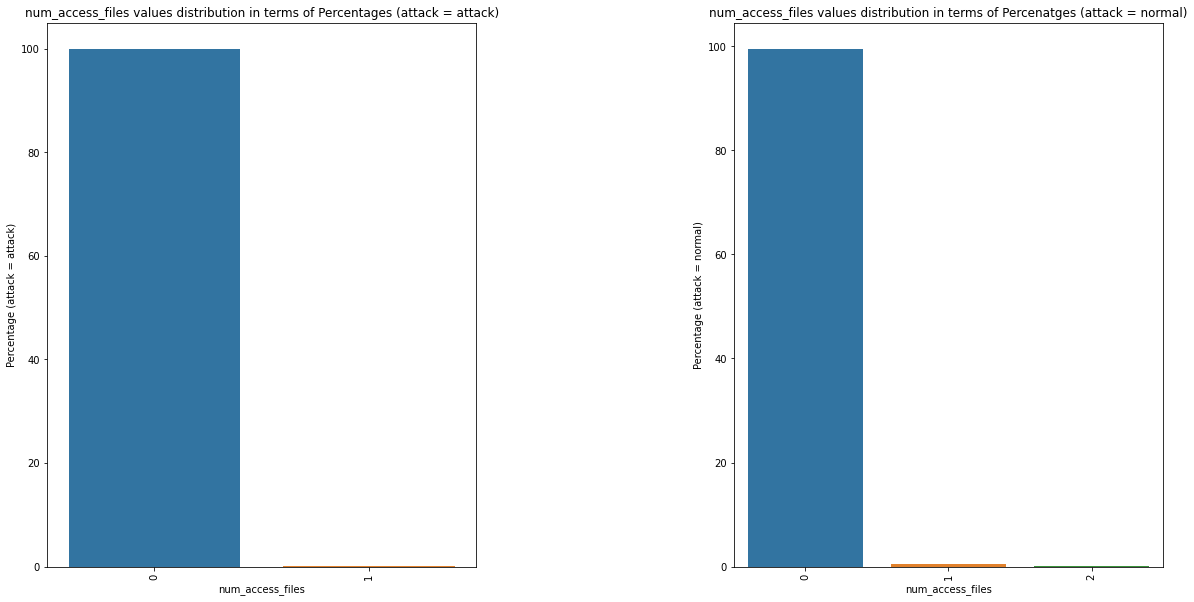

   num_access_files  Counts (attack = attack)  Percentage (attack = attack)
1                 0                     57701                       99.9861
4                 1                         8                        0.0139
   num_access_files  Counts (attack = normal)  Percentage (attack = normal)
0                 0                     64631                       99.5426
2                 1                       276                        0.4251
3                 2                        21                        0.0323


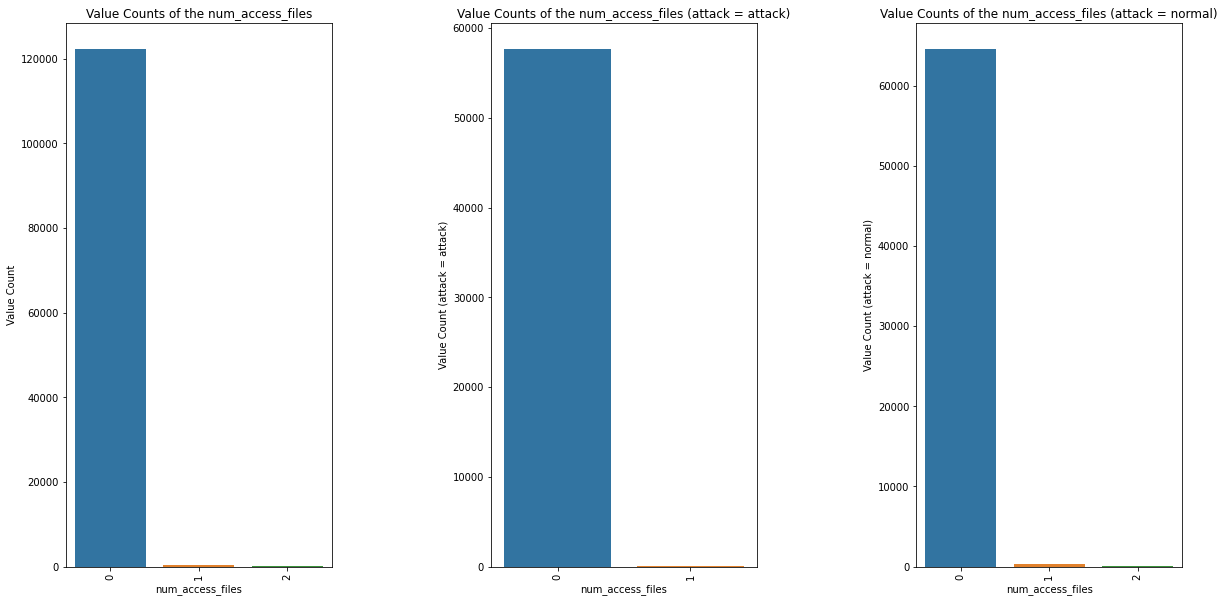

In [47]:
feature = "num_access_files"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 0
Min value is : 0
Bar Plots to analyze the num_outbound_cmds distribution


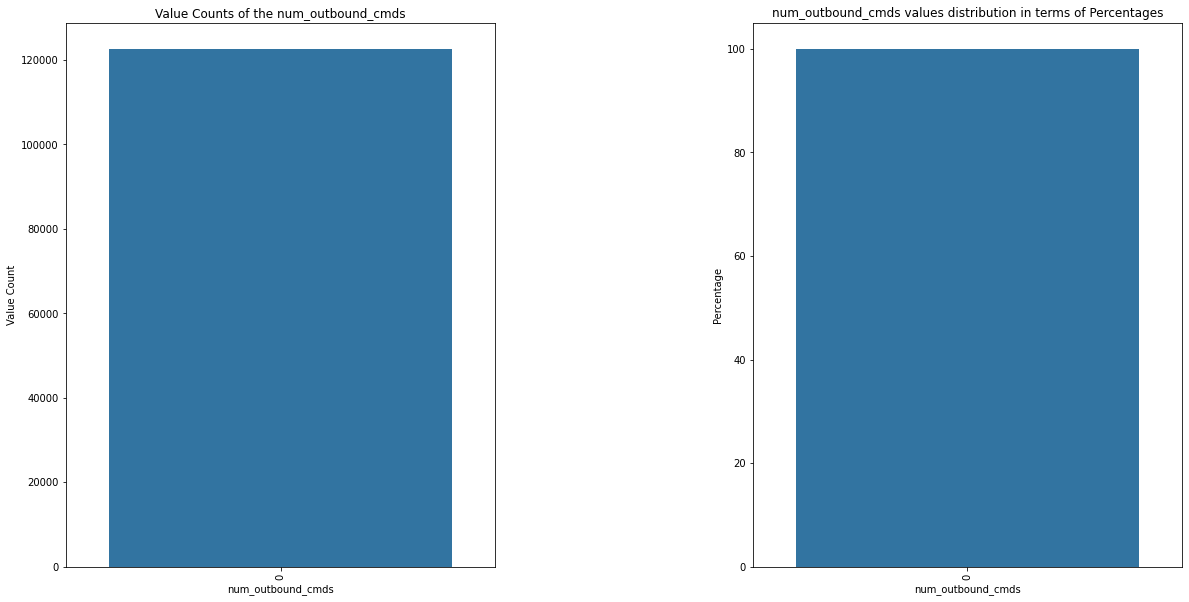

   num_outbound_cmds  counts  Percentage
0                  0  122637       100.0


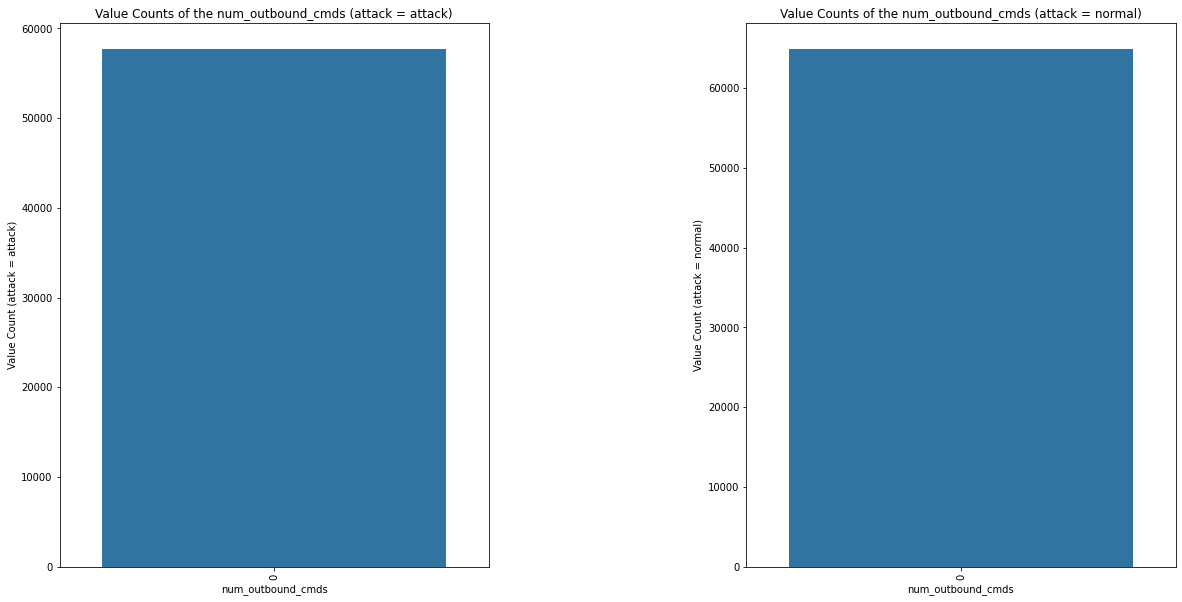

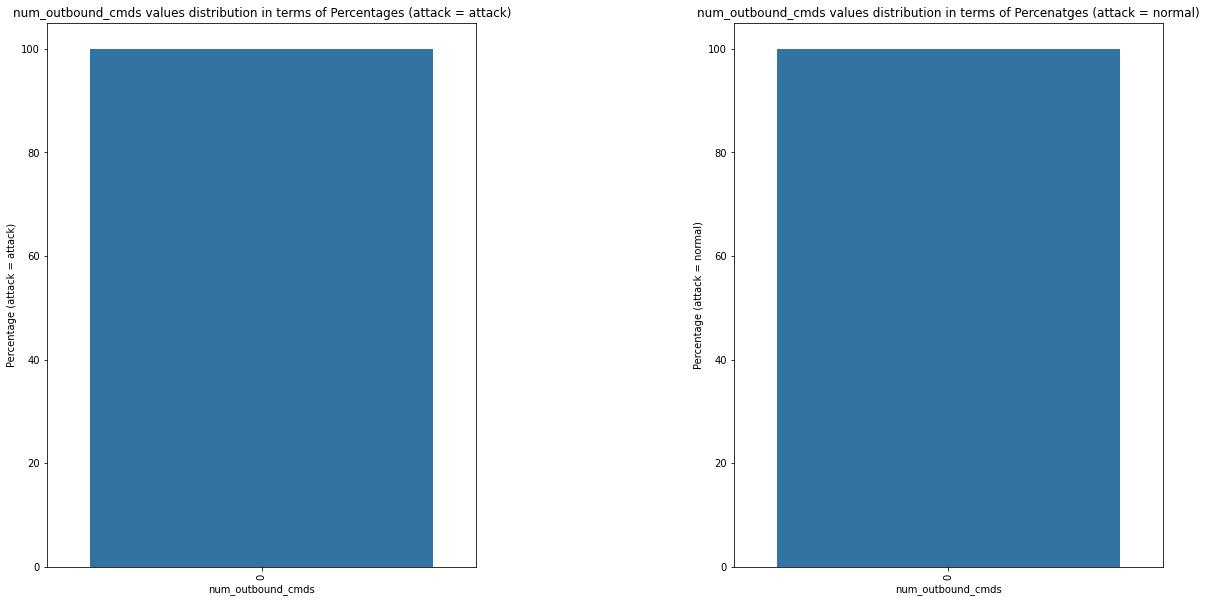

   num_outbound_cmds  Counts (attack = attack)  Percentage (attack = attack)
1                  0                     57709                         100.0
   num_outbound_cmds  Counts (attack = normal)  Percentage (attack = normal)
0                  0                     64928                         100.0


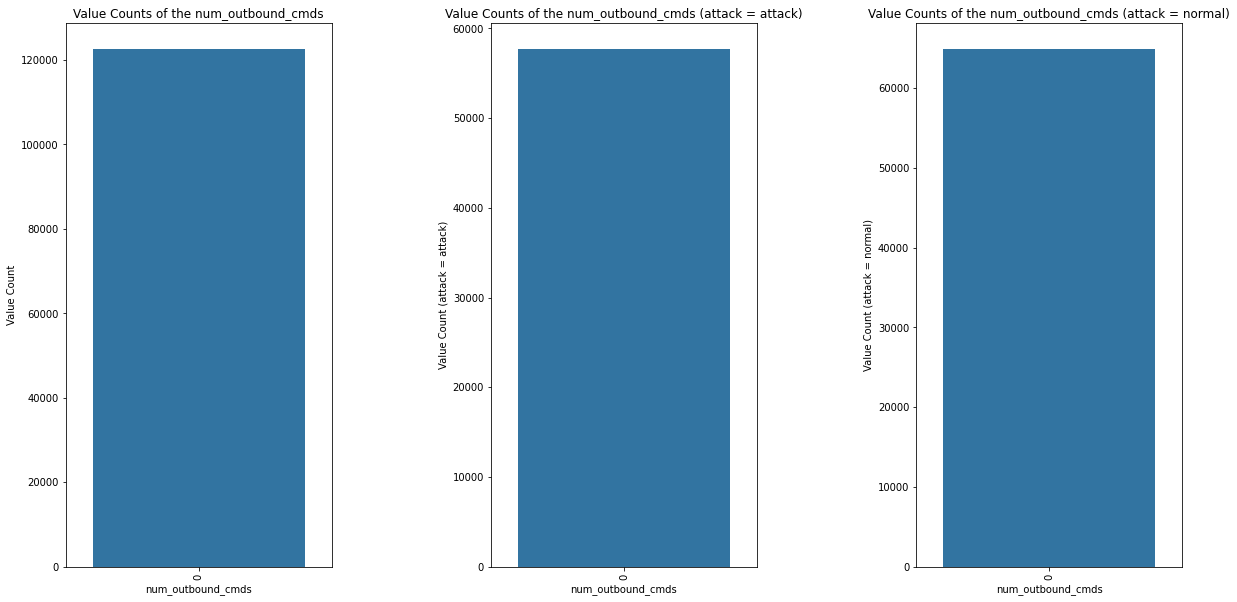

In [48]:
feature = "num_outbound_cmds"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 1
Min value is : 0
Bar Plots to analyze the is_host_login distribution


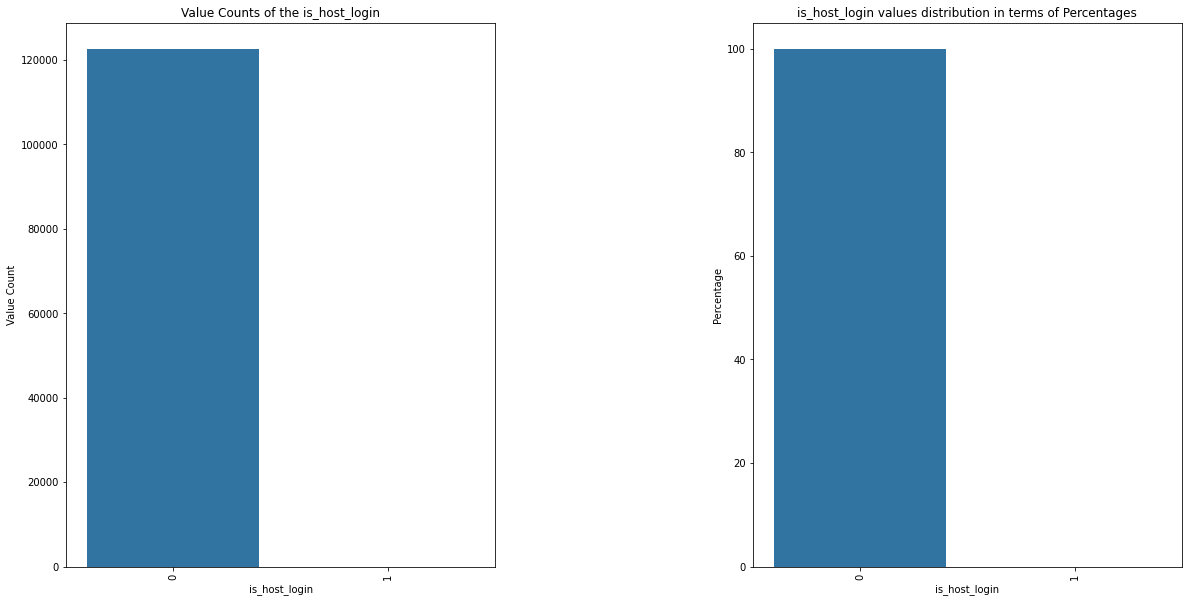

   is_host_login  counts  Percentage
0              0  122636     99.9992
1              1       1      0.0008


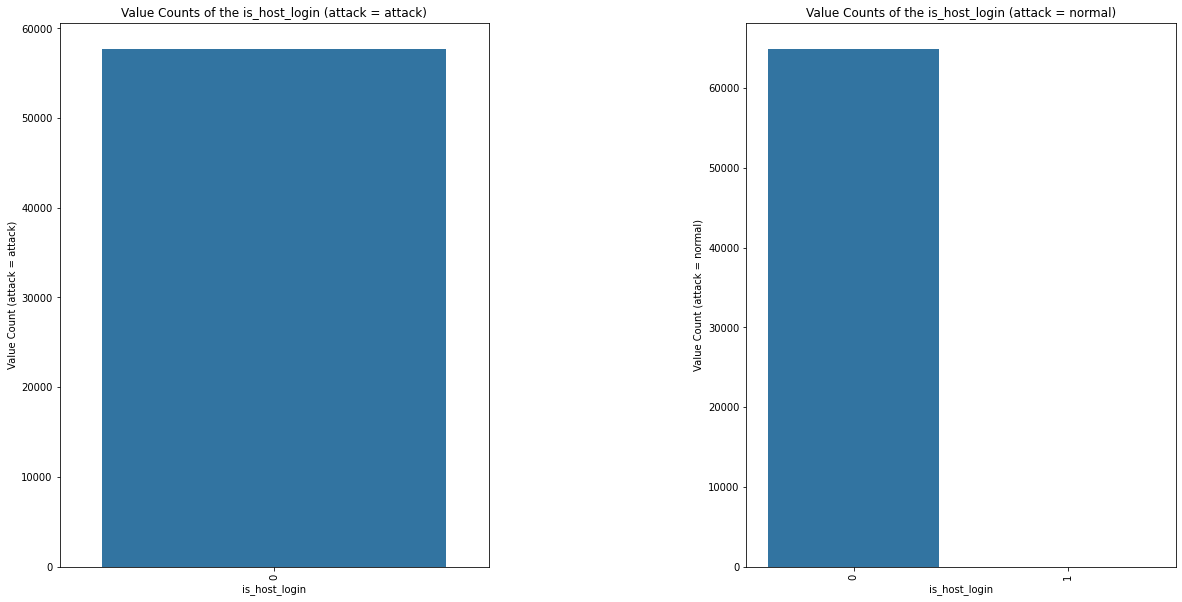

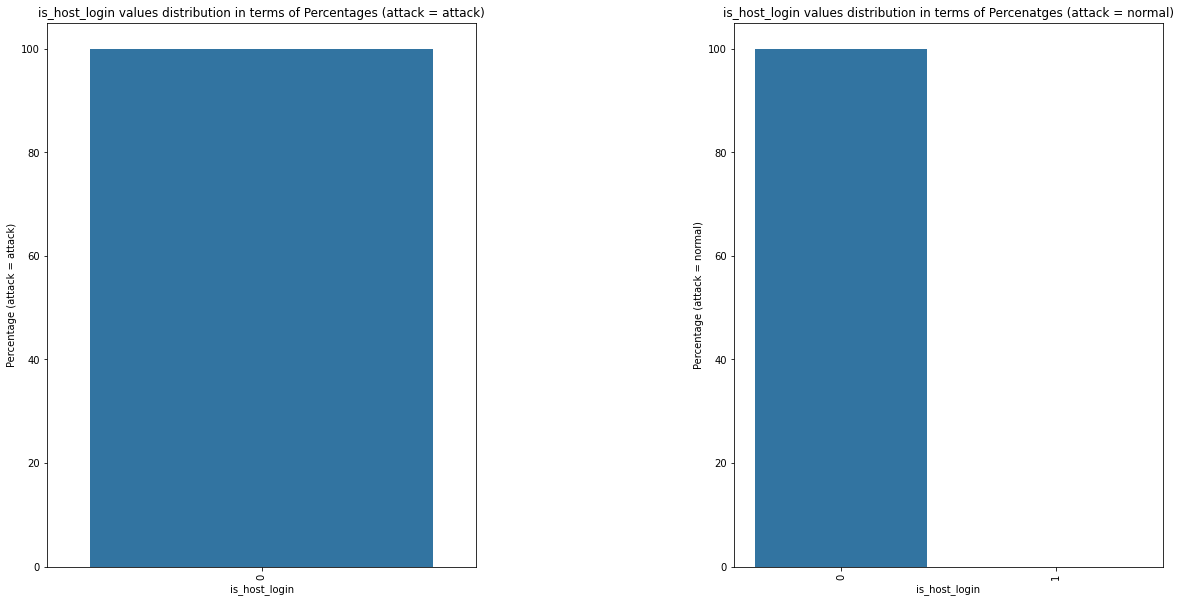

   is_host_login  Counts (attack = attack)  Percentage (attack = attack)
1              0                     57709                         100.0
   is_host_login  Counts (attack = normal)  Percentage (attack = normal)
0              0                     64927                       99.9985
2              1                         1                        0.0015


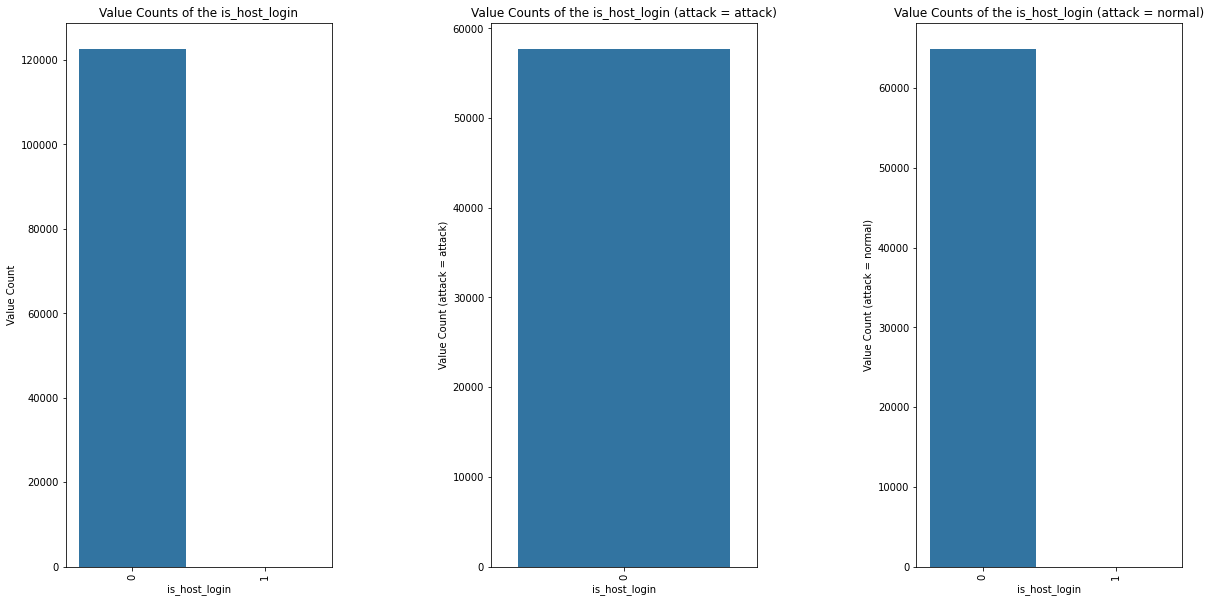

In [49]:
feature = "is_host_login"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 1
Min value is : 0
Bar Plots to analyze the is_guest_login distribution


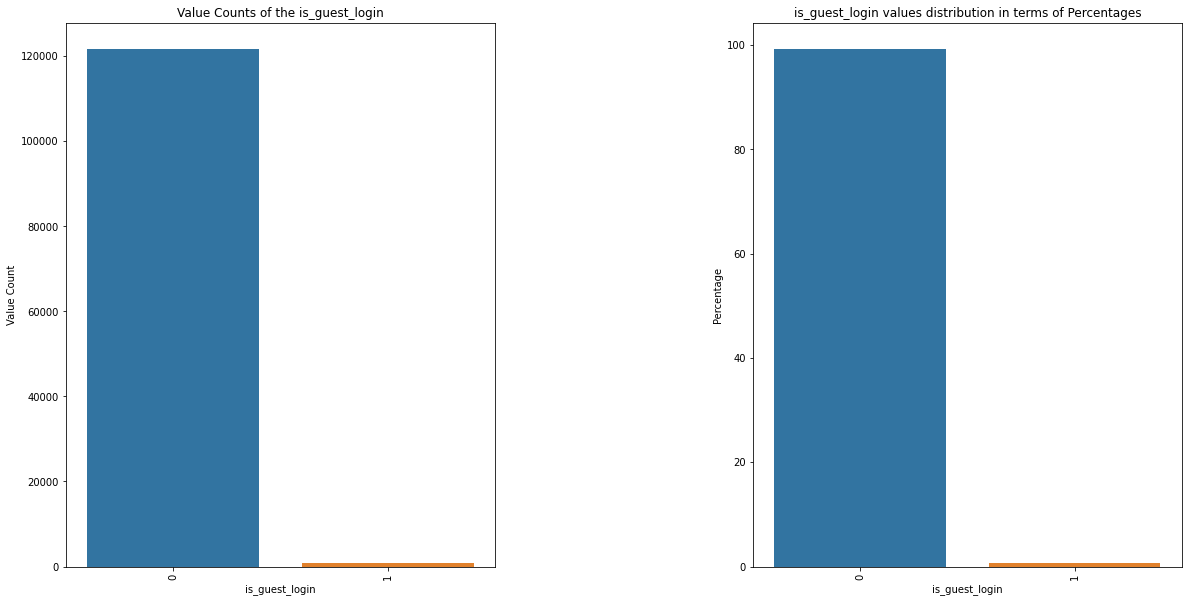

   is_guest_login  counts  Percentage
0               0  121728     99.2588
1               1     909      0.7412


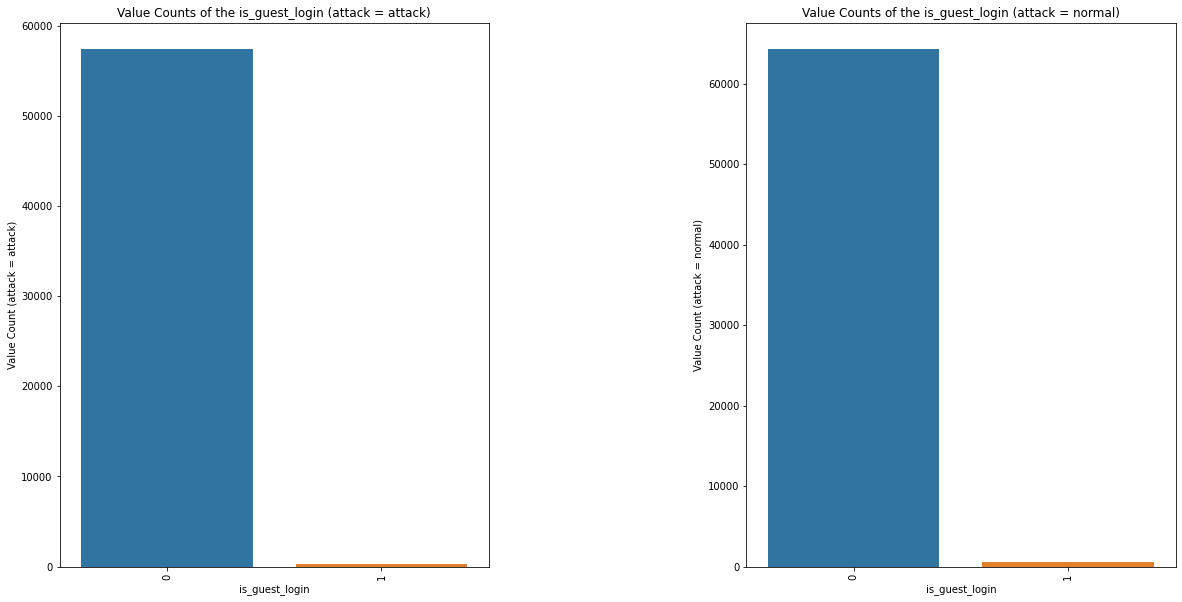

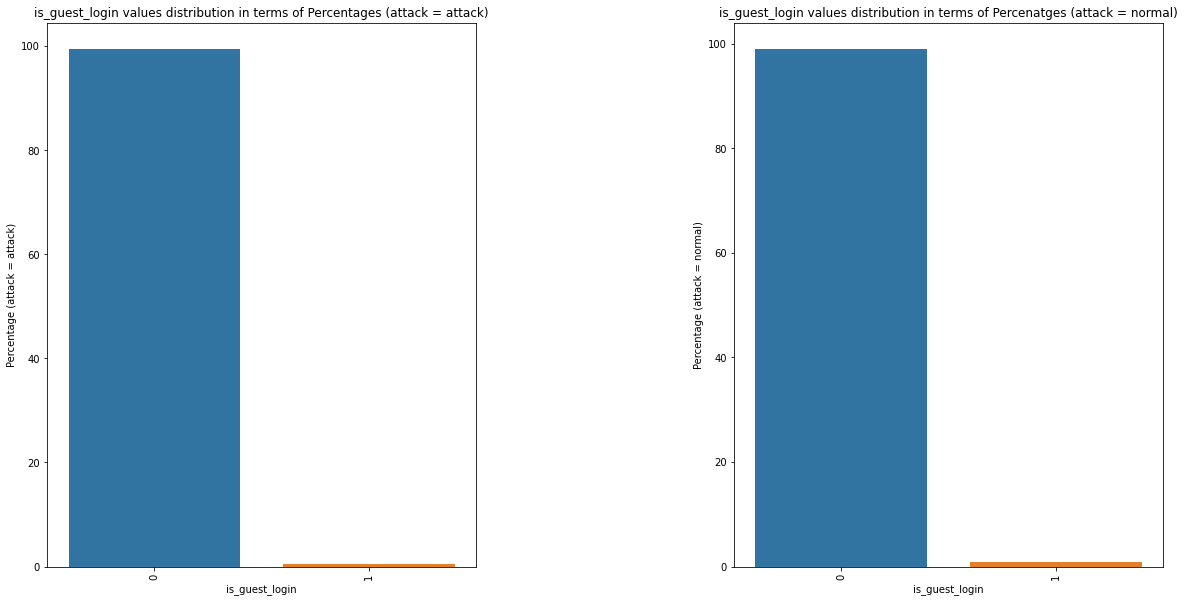

   is_guest_login  Counts (attack = attack)  Percentage (attack = attack)
1               0                     57417                        99.494
3               1                       292                         0.506
   is_guest_login  Counts (attack = normal)  Percentage (attack = normal)
0               0                     64311                       99.0497
2               1                       617                        0.9503


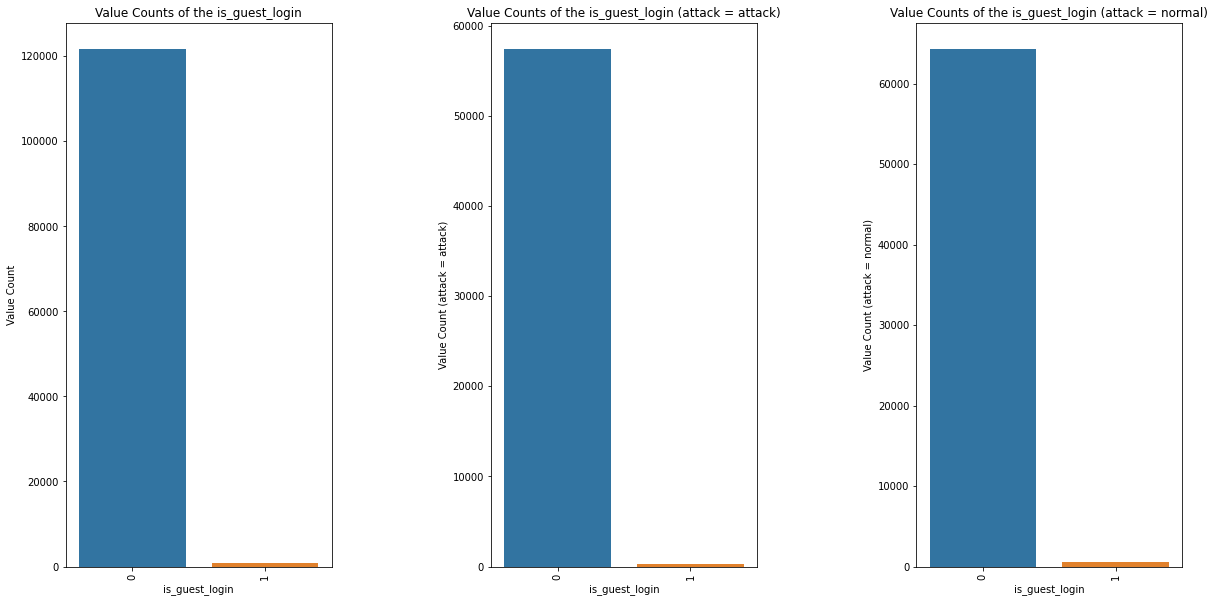

In [50]:
feature = "is_guest_login"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature

Max value is : 511
Min value is : 0
Histograms to analyze the count distribution


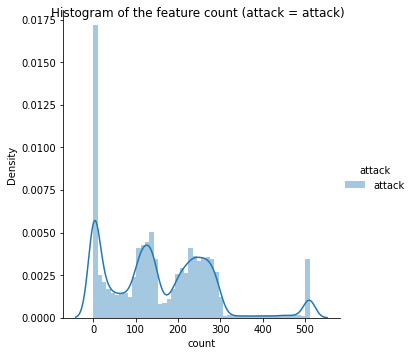

count    57709.000000
mean       157.290631
std        123.800342
min          0.000000
25%         48.000000
50%        140.000000
75%        242.000000
max        511.000000
Name: count, dtype: float64


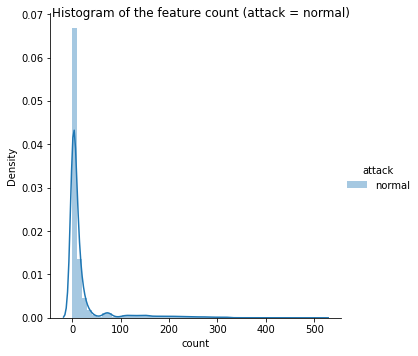

count    64928.000000
mean        23.232427
std         54.877547
min          0.000000
25%          1.000000
50%          4.000000
75%         14.000000
max        511.000000
Name: count, dtype: float64


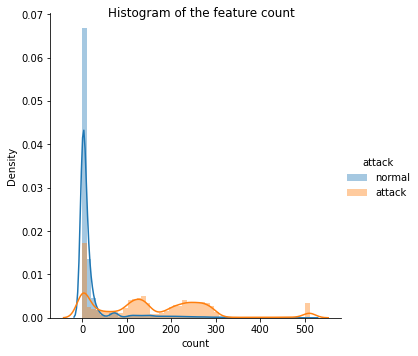

Box Plots to analyze the count distribution


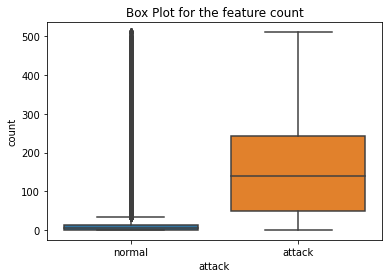

count    122637.000000
mean         86.315875
std         115.255658
min           0.000000
25%           2.000000
50%          16.000000
75%         146.000000
max         511.000000
Name: count, dtype: float64


In [51]:
feature = "count"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

In [52]:
percentile_values(feature)

0-percentile value is 0.0
10-percentile value is 1.0
20-percentile value is 1.0
30-percentile value is 3.0
40-percentile value is 7.0
50-percentile value is 16.0
60-percentile value is 60.0
70-percentile value is 126.0
80-percentile value is 200.0
90-percentile value is 258.0
100-percentile value is 511.0
90-percentile value is 258.0
91-percentile value is 263.0
92-percentile value is 269.0
93-percentile value is 274.0
94-percentile value is 280.0
95-percentile value is 287.0
96-percentile value is 294.0
97-percentile value is 307.0
98-percentile value is 450.0
99-percentile value is 511.0
100-percentile value is 511.0
99.0-percentile value is 511.0
99.1-percentile value is 511.0
99.19999999999999-percentile value is 511.0
99.29999999999998-percentile value is 511.0
99.39999999999998-percentile value is 511.0
99.49999999999997-percentile value is 511.0
99.59999999999997-percentile value is 511.0
99.69999999999996-percentile value is 511.0
99.79999999999995-percentile value is 511.0
99.

Max value is : 511
Min value is : 0
Histograms to analyze the srv_count distribution


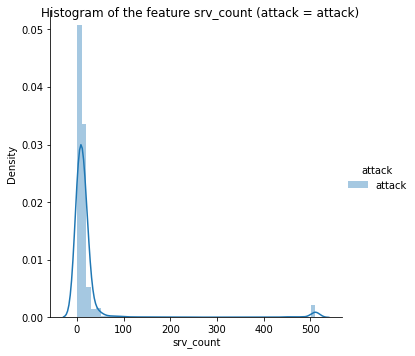

count    57709.000000
mean        28.211319
std         85.320276
min          0.000000
25%          3.000000
50%         10.000000
75%         18.000000
max        511.000000
Name: srv_count, dtype: float64


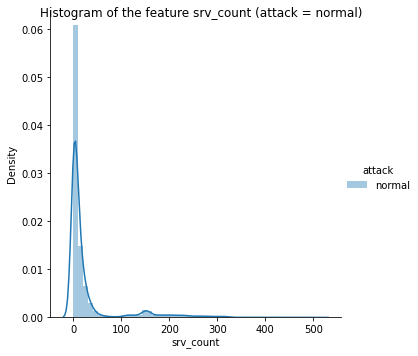

count    64928.000000
mean        28.554260
std         61.104173
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max        511.000000
Name: srv_count, dtype: float64


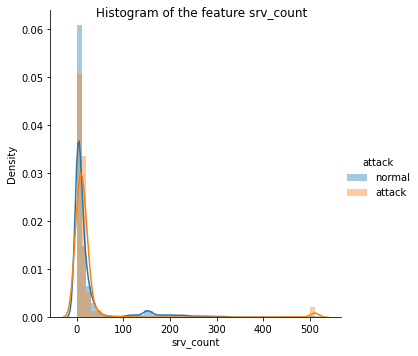

Box Plots to analyze the srv_count distribution


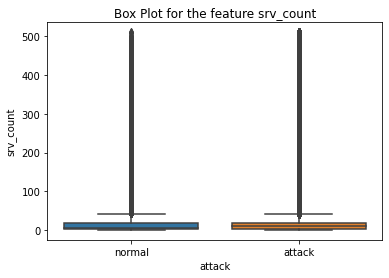

count    122637.000000
mean         28.392883
std          73.500041
min           0.000000
25%           2.000000
50%           8.000000
75%          18.000000
max         511.000000
Name: srv_count, dtype: float64


In [53]:
feature = "srv_count"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

In [54]:
percentile_values(feature)

0-percentile value is 0.0
10-percentile value is 1.0
20-percentile value is 2.0
30-percentile value is 3.0
40-percentile value is 5.0
50-percentile value is 8.0
60-percentile value is 12.0
70-percentile value is 16.0
80-percentile value is 20.0
90-percentile value is 41.0
100-percentile value is 511.0
90-percentile value is 41.0
91-percentile value is 49.0
92-percentile value is 73.0
93-percentile value is 121.0
94-percentile value is 148.0
95-percentile value is 159.0
96-percentile value is 193.0
97-percentile value is 230.0
98-percentile value is 291.0
99-percentile value is 508.0
100-percentile value is 511.0
99.0-percentile value is 508.0
99.1-percentile value is 510.0
99.19999999999999-percentile value is 511.0
99.29999999999998-percentile value is 511.0
99.39999999999998-percentile value is 511.0
99.49999999999997-percentile value is 511.0
99.59999999999997-percentile value is 511.0
99.69999999999996-percentile value is 511.0
99.79999999999995-percentile value is 511.0
99.8999999

Max value is : 1.0
Min value is : 0.0
Histograms to analyze the serror_rate distribution


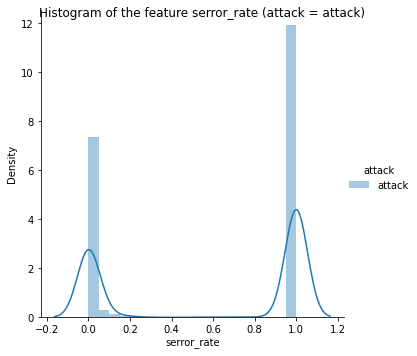

count    57709.000000
mean         0.605268
std          0.484566
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: serror_rate, dtype: float64


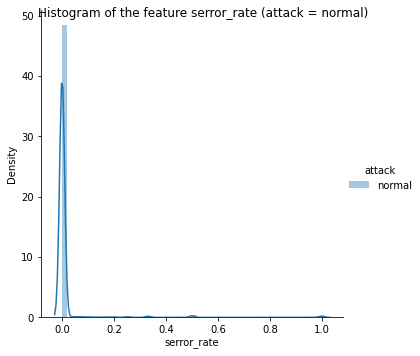

count    64928.000000
mean         0.012325
std          0.088614
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: serror_rate, dtype: float64


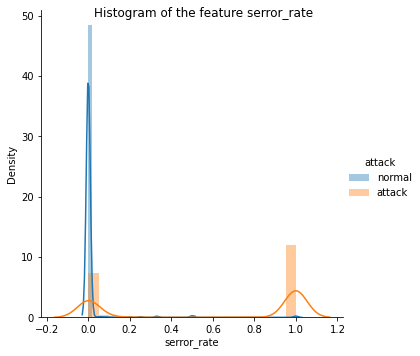

Box Plots to analyze the serror_rate distribution


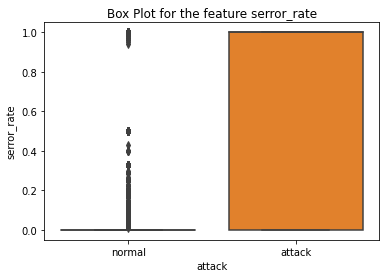

count    122637.000000
mean          0.291345
std           0.449710
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: serror_rate, dtype: float64


In [55]:
feature = "serror_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Histograms to analyze the srv_serror_rate distribution


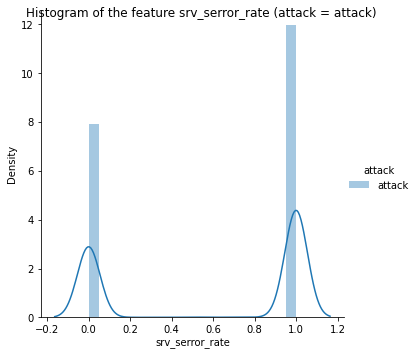

count    57709.000000
mean         0.602488
std          0.488341
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: srv_serror_rate, dtype: float64


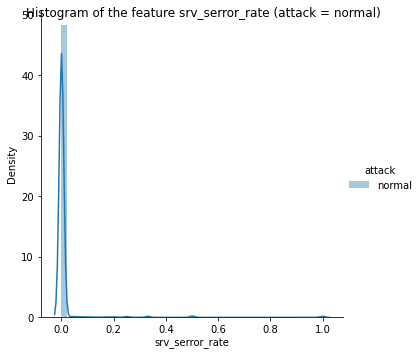

count    64928.000000
mean         0.011065
std          0.081069
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: srv_serror_rate, dtype: float64


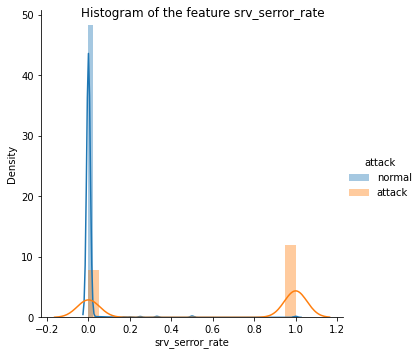

Box Plots to analyze the srv_serror_rate distribution


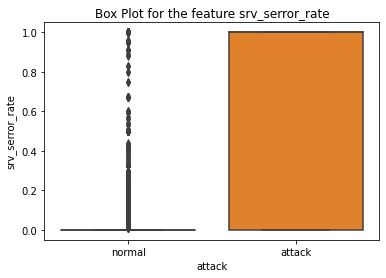

count    122637.000000
mean          0.289370
std           0.450379
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: srv_serror_rate, dtype: float64


In [56]:
feature = "srv_serror_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Histograms to analyze the rerror_rate distribution


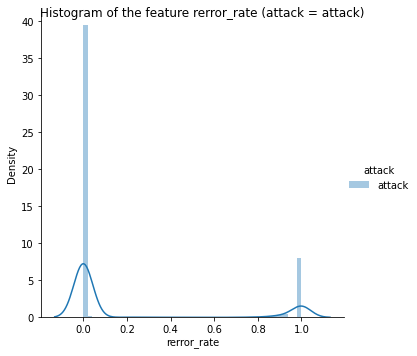

count    57709.000000
mean         0.196134
std          0.390625
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: rerror_rate, dtype: float64


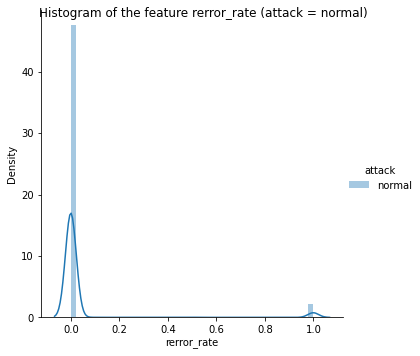

count    64928.000000
mean         0.045099
std          0.205029
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: rerror_rate, dtype: float64


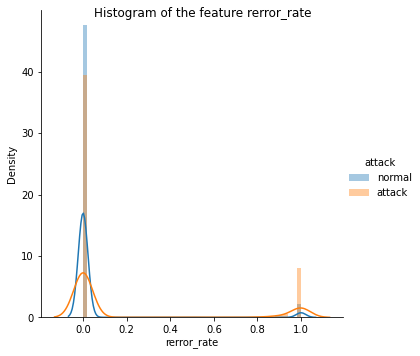

Box Plots to analyze the rerror_rate distribution


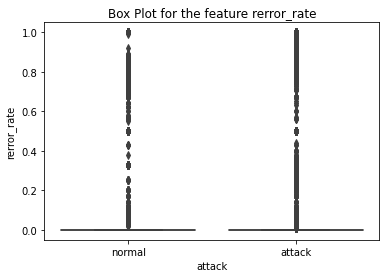

count    122637.000000
mean          0.116171
std           0.315818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: rerror_rate, dtype: float64


In [57]:
feature = "rerror_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Histograms to analyze the srv_rerror_rate distribution


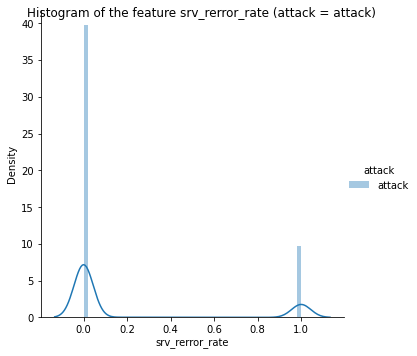

count    57709.000000
mean         0.198288
std          0.396446
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: srv_rerror_rate, dtype: float64


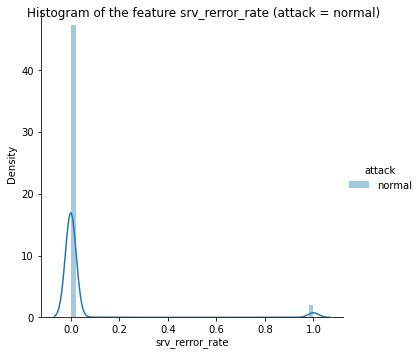

count    64928.000000
mean         0.045419
std          0.203949
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: srv_rerror_rate, dtype: float64


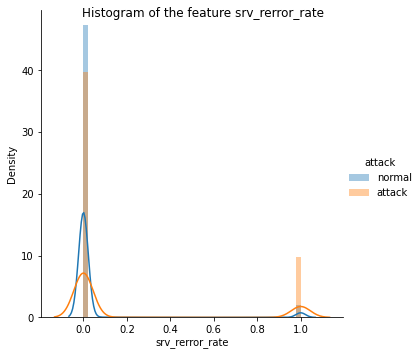

Box Plots to analyze the srv_rerror_rate distribution


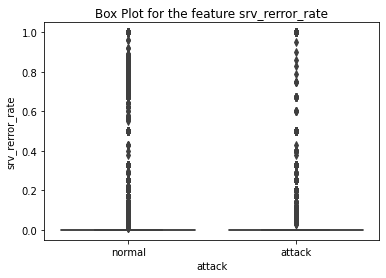

count    122637.000000
mean          0.117354
std           0.319064
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: srv_rerror_rate, dtype: float64


In [58]:
feature = "srv_rerror_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Histograms to analyze the same_srv_rate distribution


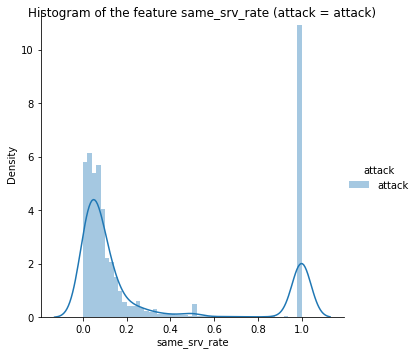

count    57709.000000
mean         0.295630
std          0.388941
min          0.000000
25%          0.040000
50%          0.080000
75%          0.400000
max          1.000000
Name: same_srv_rate, dtype: float64


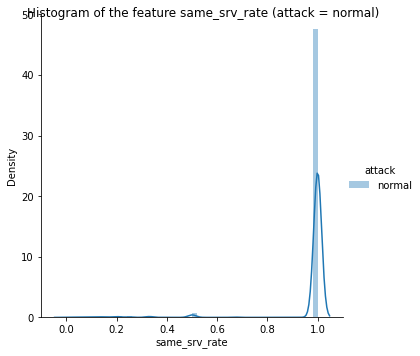

count    64928.000000
mean         0.969254
std          0.144932
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: same_srv_rate, dtype: float64


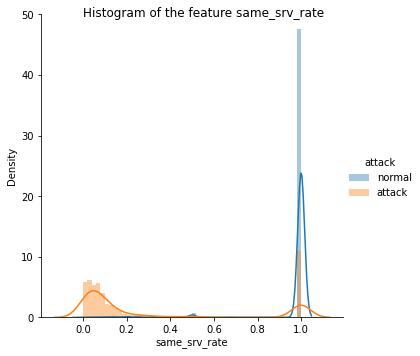

Box Plots to analyze the same_srv_rate distribution


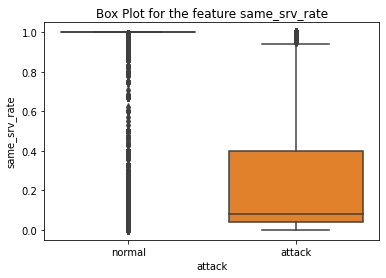

count    122637.000000
mean          0.652269
std           0.441990
min           0.000000
25%           0.090000
50%           1.000000
75%           1.000000
max           1.000000
Name: same_srv_rate, dtype: float64


In [59]:
feature = "same_srv_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Histograms to analyze the diff_srv_rate distribution


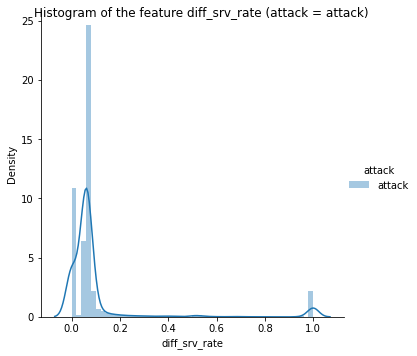

count    57709.000000
mean         0.103997
std          0.207577
min          0.000000
25%          0.050000
50%          0.060000
75%          0.070000
max          1.000000
Name: diff_srv_rate, dtype: float64


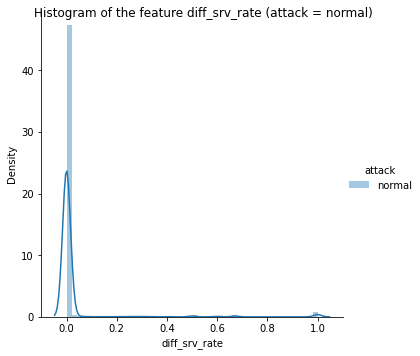

count    64928.000000
mean         0.028672
std          0.145472
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diff_srv_rate, dtype: float64


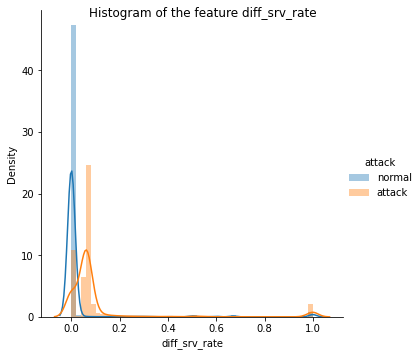

Box Plots to analyze the diff_srv_rate distribution


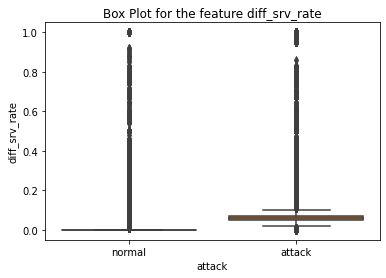

count    122637.000000
mean          0.064117
std           0.181365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.060000
max           1.000000
Name: diff_srv_rate, dtype: float64


In [60]:
feature = "diff_srv_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Histograms to analyze the srv_diff_host_rate distribution


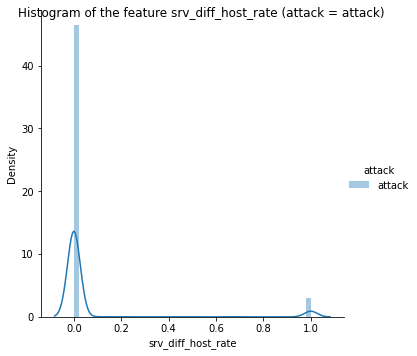

count    57709.000000
mean         0.064996
std          0.242960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: srv_diff_host_rate, dtype: float64


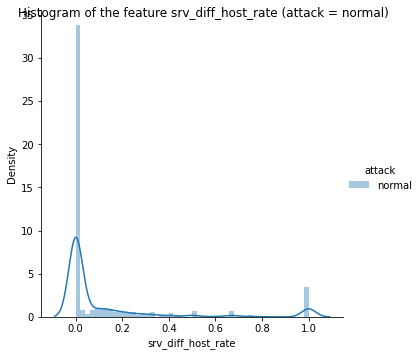

count    64928.000000
mean         0.128311
std          0.273563
min          0.000000
25%          0.000000
50%          0.000000
75%          0.110000
max          1.000000
Name: srv_diff_host_rate, dtype: float64


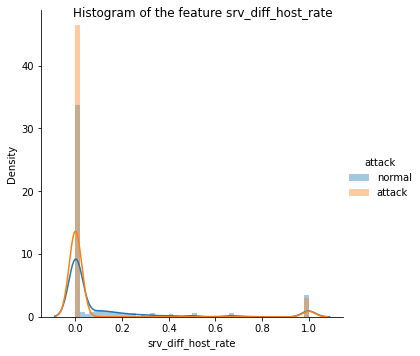

Box Plots to analyze the srv_diff_host_rate distribution


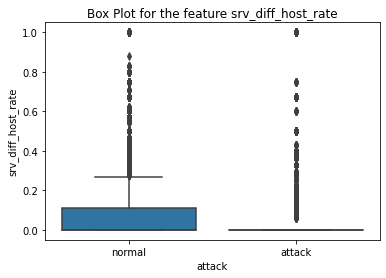

count    122637.000000
mean          0.098517
std           0.261527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: srv_diff_host_rate, dtype: float64


In [61]:
feature = "srv_diff_host_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 255
Min value is : 0
Histograms to analyze the dst_host_count distribution


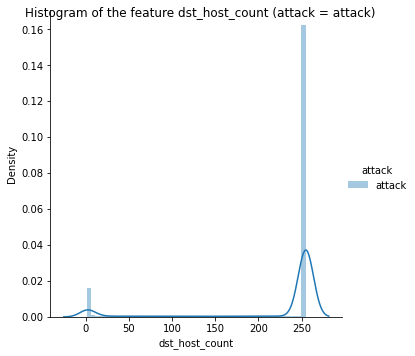

count    57709.000000
mean       221.943440
std         79.303203
min          1.000000
25%        255.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64


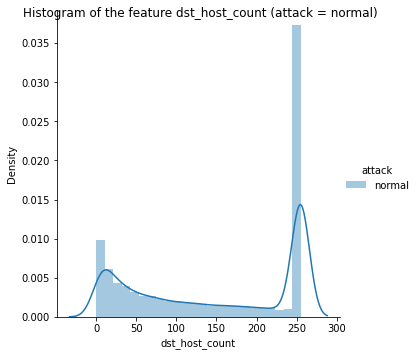

count    64928.000000
mean       147.992977
std        101.850860
min          0.000000
25%         40.000000
50%        158.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64


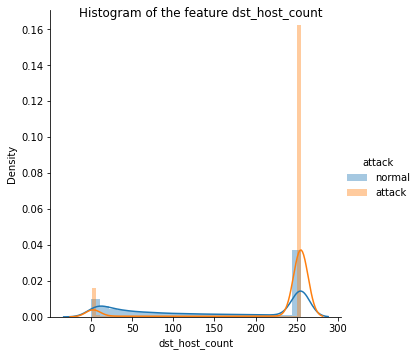

Box Plots to analyze the dst_host_count distribution


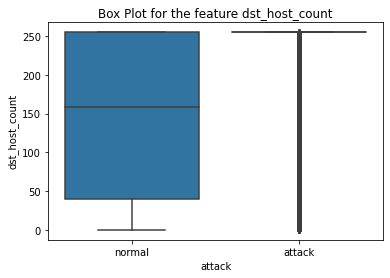

count    122637.000000
mean        182.791670
std          99.065089
min           0.000000
25%          83.000000
50%         255.000000
75%         255.000000
max         255.000000
Name: dst_host_count, dtype: float64


In [62]:
feature = "dst_host_count"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 255
Min value is : 0
Bar Plots to analyze the dst_host_srv_count distribution


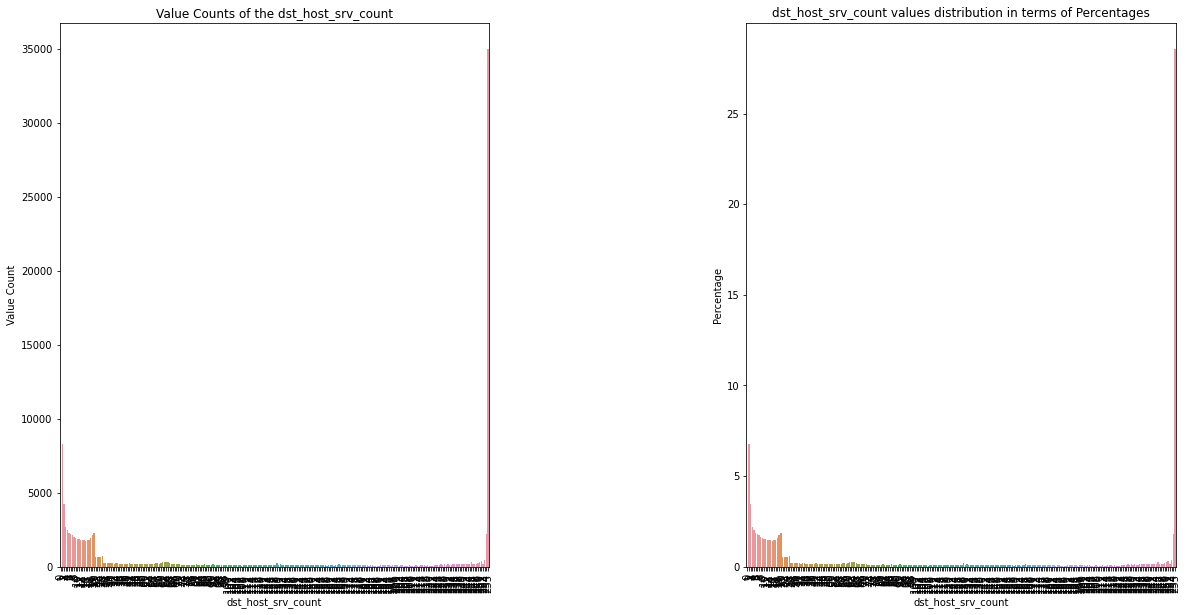

     dst_host_srv_count  counts  Percentage
0                   255   35021     28.5566
1                     1    8282      6.7533
2                     2    4257      3.4712
3                     3    2717      2.2155
4                     4    2465      2.0100
..                  ...     ...         ...
251                 222      71      0.0579
252                 188      70      0.0571
253                 221      70      0.0571
254                 210      55      0.0448
255                   0       3      0.0024

[256 rows x 3 columns]


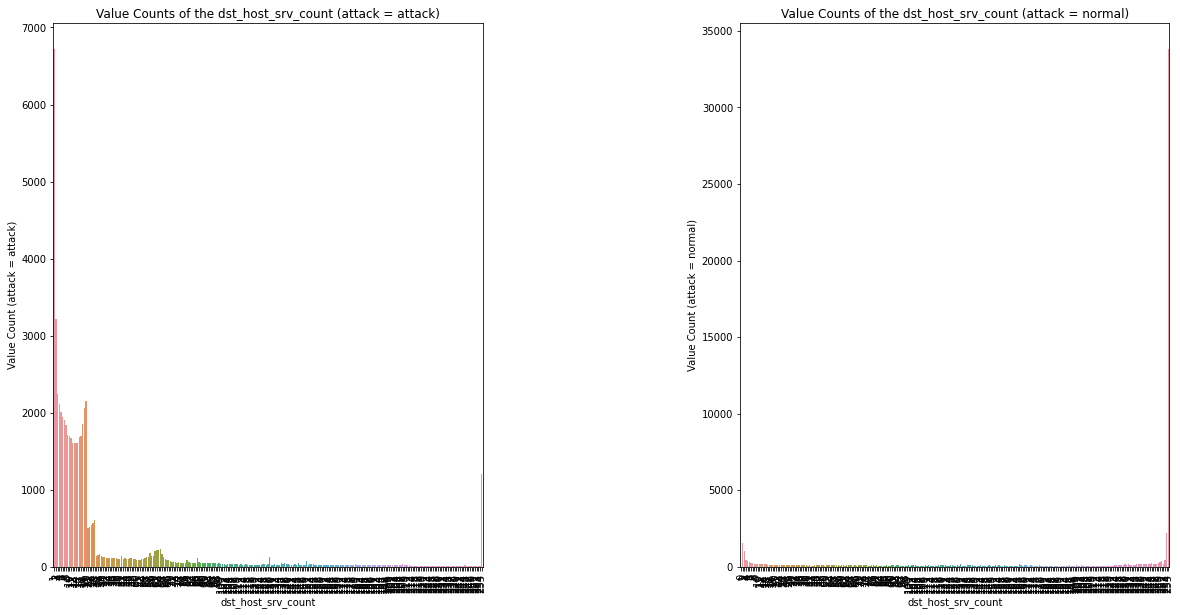

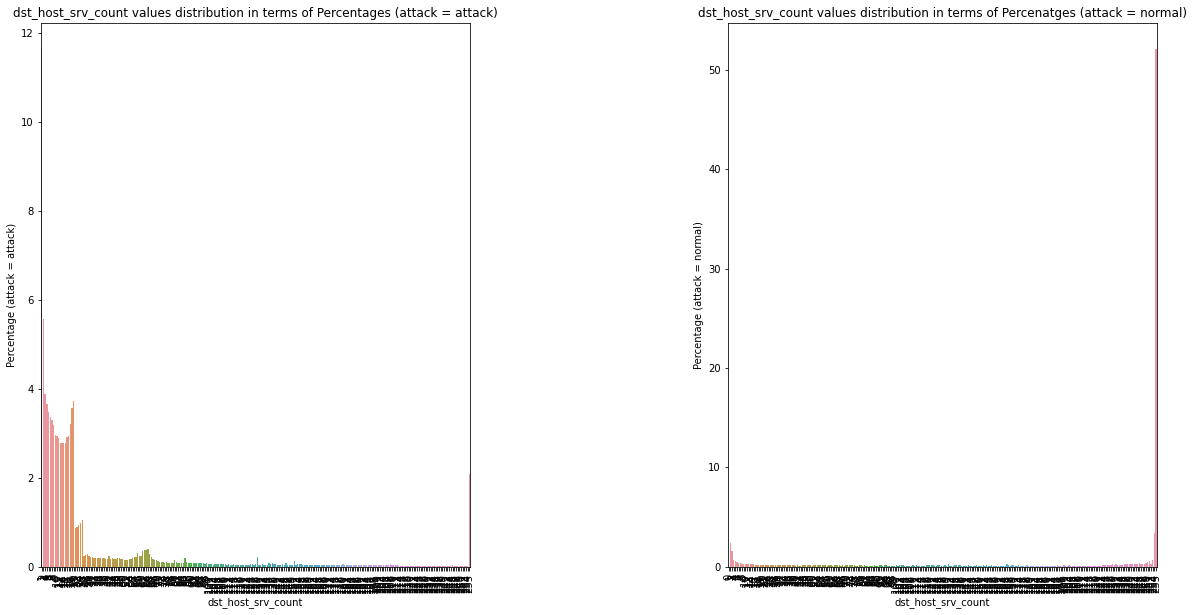

     dst_host_srv_count  Counts (attack = attack)  \
1                     1                      6720   
2                     2                      3215   
3                     3                      2248   
5                    20                      2157   
6                     4                      2118   
..                  ...                       ...   
505                 233                        12   
506                 250                        12   
507                 251                         9   
508                 252                         9   
509                 253                         7   

     Percentage (attack = attack)  
1                         11.6446  
2                          5.5711  
3                          3.8954  
5                          3.7377  
6                          3.6701  
..                            ...  
505                        0.0208  
506                        0.0208  
507                        0.0156  
508

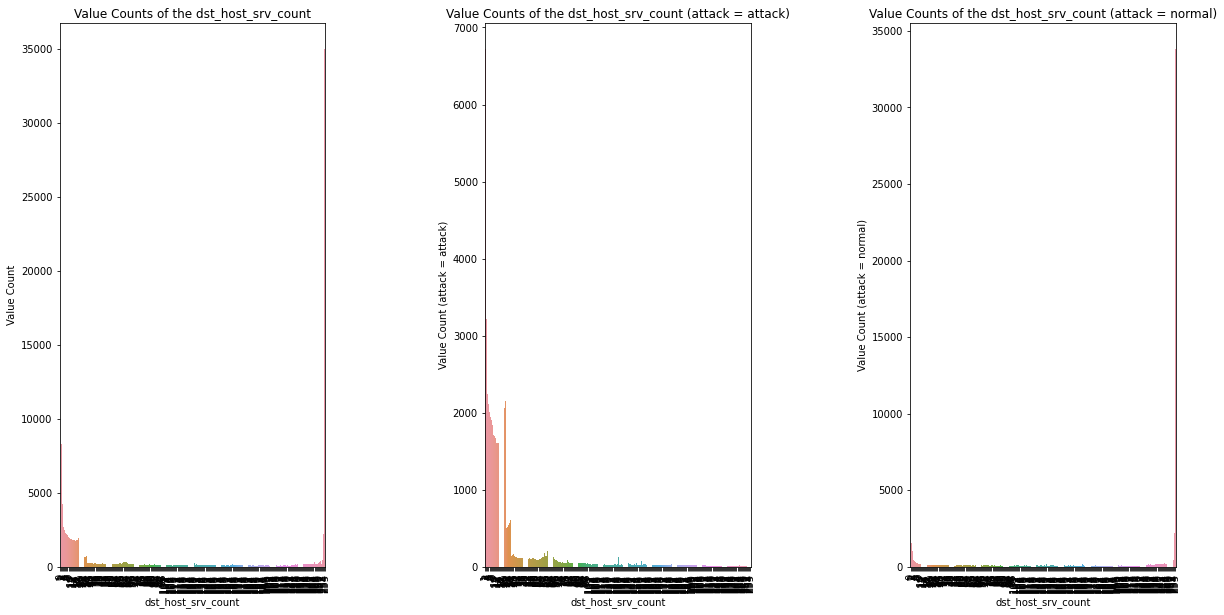

Histograms to analyze the dst_host_srv_count distribution


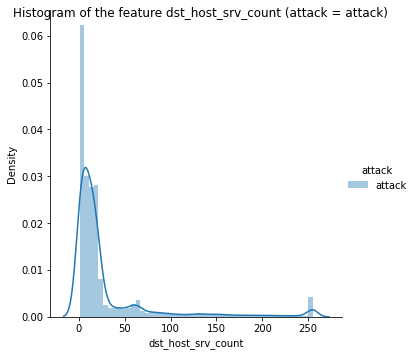

count    57709.000000
mean        30.316866
std         52.577944
min          1.000000
25%          5.000000
50%         13.000000
75%         21.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64


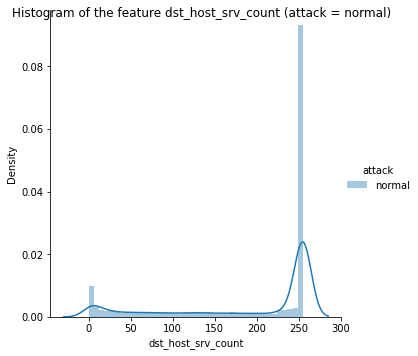

count    64928.000000
mean       192.529602
std         91.075836
min          0.000000
25%        129.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64


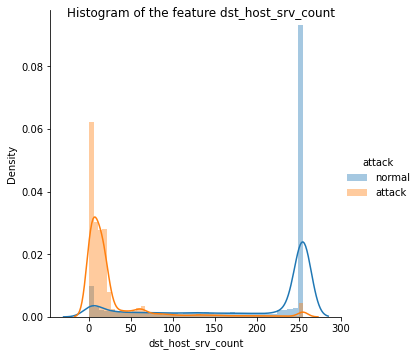

Box Plots to analyze the dst_host_srv_count distribution


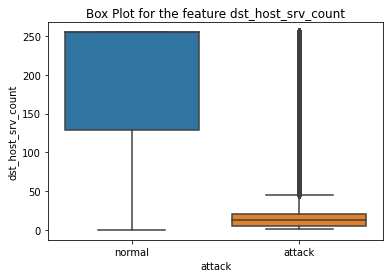

count    122637.000000
mean        116.197542
std         110.670026
min           0.000000
25%          11.000000
50%          64.000000
75%         255.000000
max         255.000000
Name: dst_host_srv_count, dtype: float64


In [63]:
feature = "dst_host_srv_count"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Bar Plots to analyze the dst_host_same_srv_rate distribution


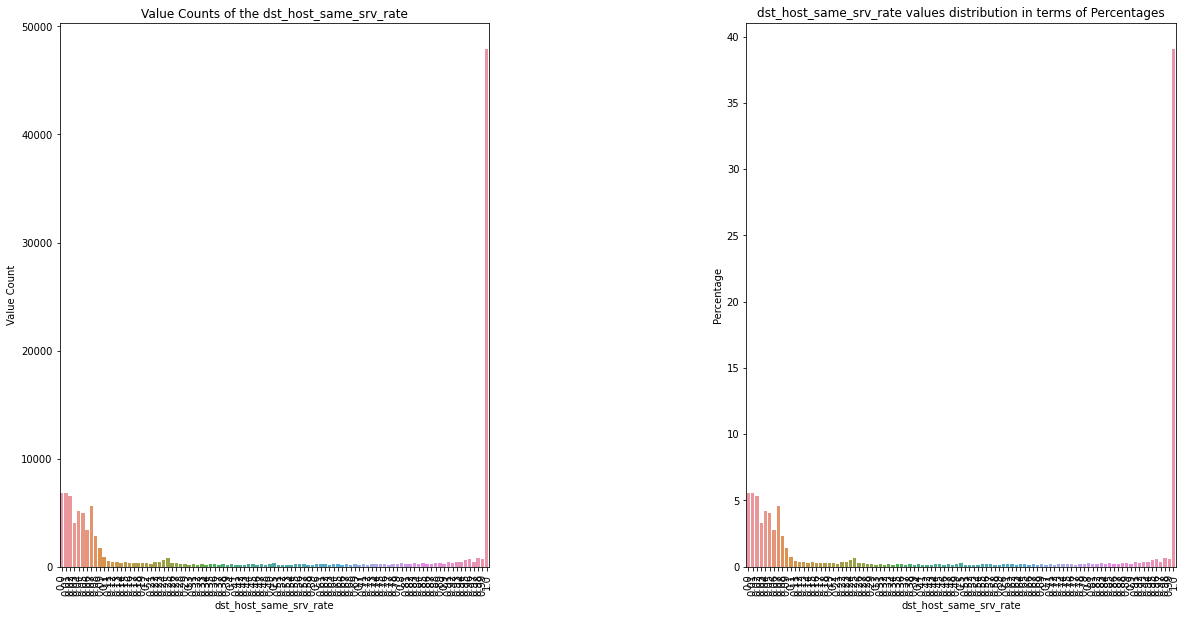

     dst_host_same_srv_rate  counts  Percentage
0                      1.00   47917     39.0722
1                      0.01    6855      5.5897
2                      0.00    6831      5.5701
3                      0.02    6562      5.3508
4                      0.07    5655      4.6112
..                      ...     ...         ...
96                     0.72     170      0.1386
97                     0.43     168      0.1370
98                     0.66     163      0.1329
99                     0.41     158      0.1288
100                    0.37     146      0.1191

[101 rows x 3 columns]


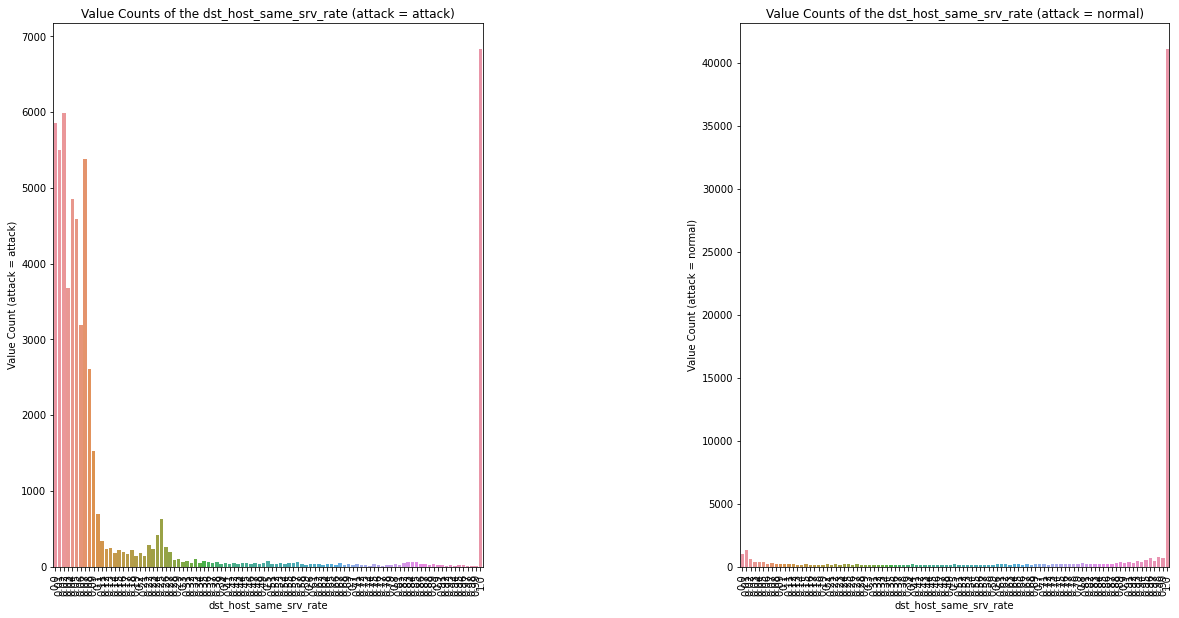

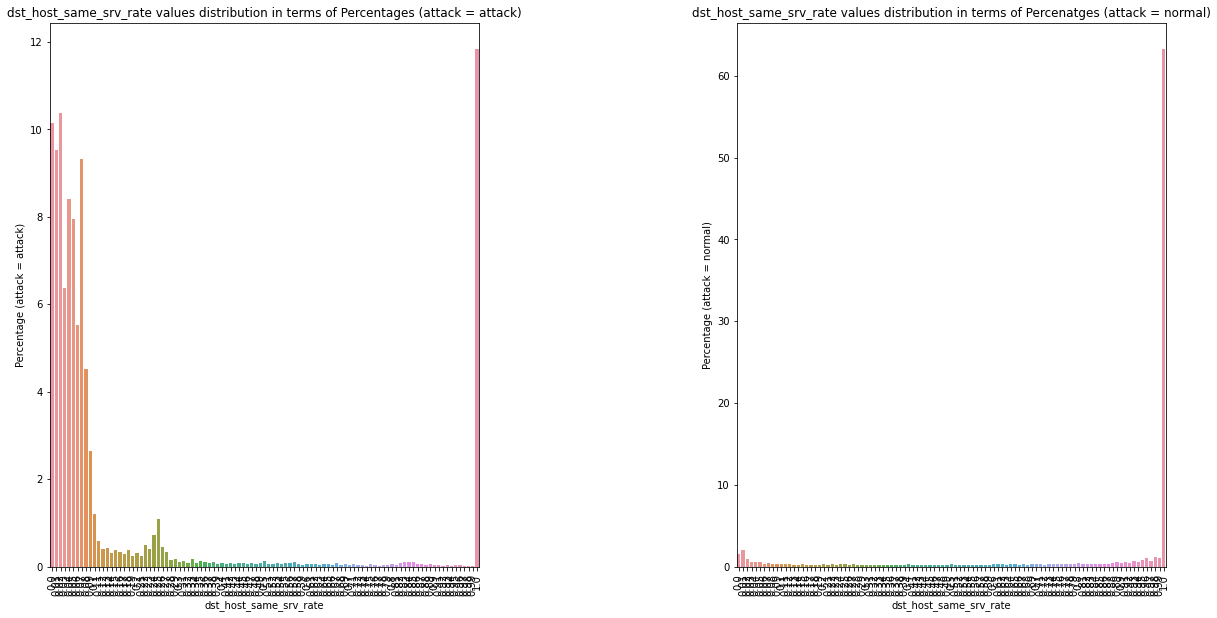

     dst_host_same_srv_rate  Counts (attack = attack)  \
1                      1.00                      6834   
2                      0.02                      5983   
3                      0.00                      5850   
4                      0.01                      5504   
5                      0.07                      5386   
..                      ...                       ...   
197                    0.92                        14   
198                    0.77                        14   
199                    0.98                        13   
200                    0.97                        12   
201                    0.99                         4   

     Percentage (attack = attack)  
1                         11.8422  
2                         10.3675  
3                         10.1371  
4                          9.5375  
5                          9.3330  
..                            ...  
197                        0.0243  
198                        

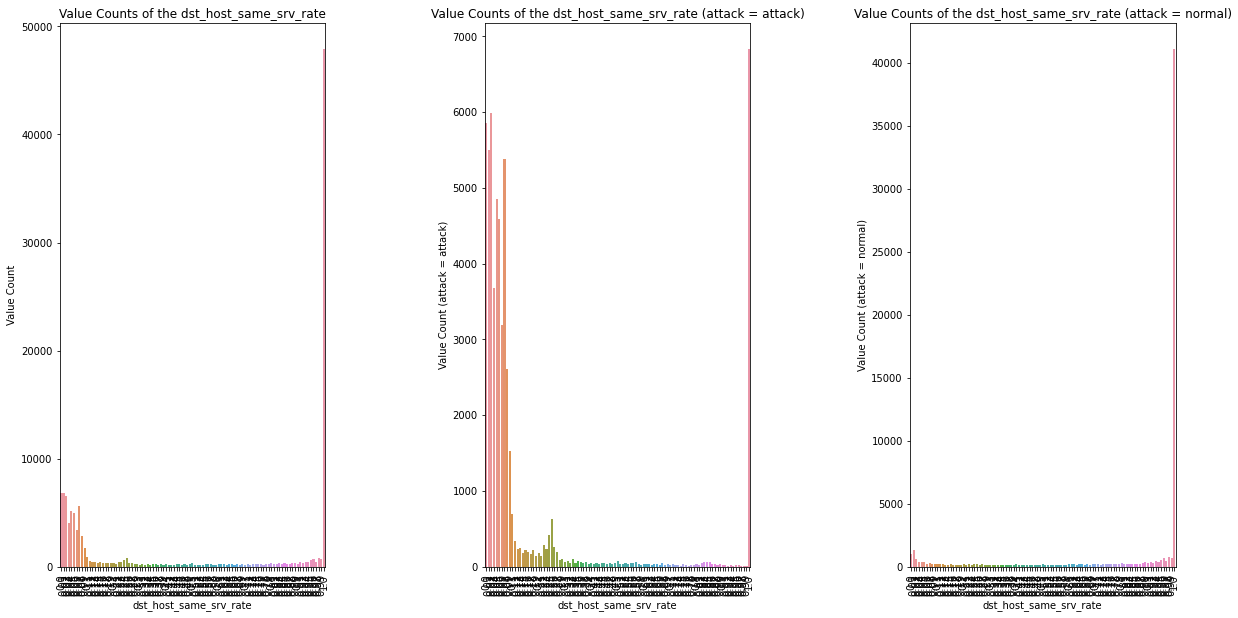

Histograms to analyze the dst_host_same_srv_rate distribution


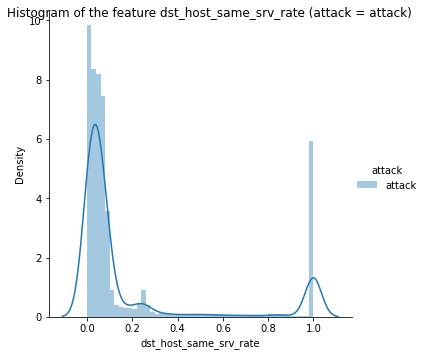

count    57709.000000
mean         0.188877
std          0.322973
min          0.000000
25%          0.020000
50%          0.050000
75%          0.100000
max          1.000000
Name: dst_host_same_srv_rate, dtype: float64


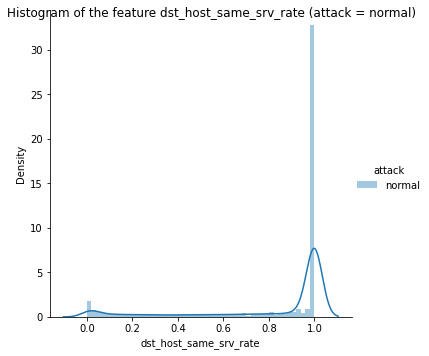

count    64928.000000
mean         0.820201
std          0.317701
min          0.000000
25%          0.780000
50%          1.000000
75%          1.000000
max          1.000000
Name: dst_host_same_srv_rate, dtype: float64


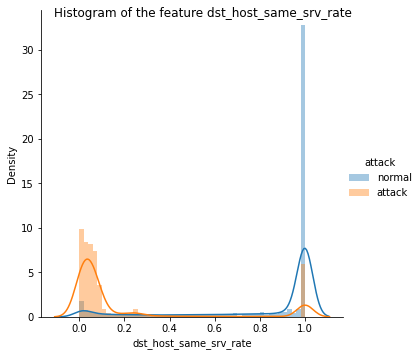

Box Plots to analyze the dst_host_same_srv_rate distribution


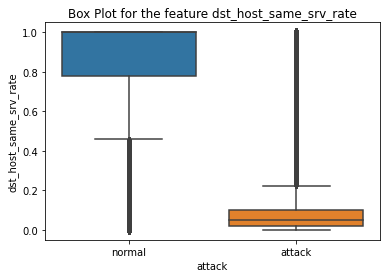

count    122637.000000
mean          0.523121
std           0.449244
min           0.000000
25%           0.050000
50%           0.530000
75%           1.000000
max           1.000000
Name: dst_host_same_srv_rate, dtype: float64


In [64]:
feature = "dst_host_same_srv_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Bar Plots to analyze the dst_host_diff_srv_rate distribution


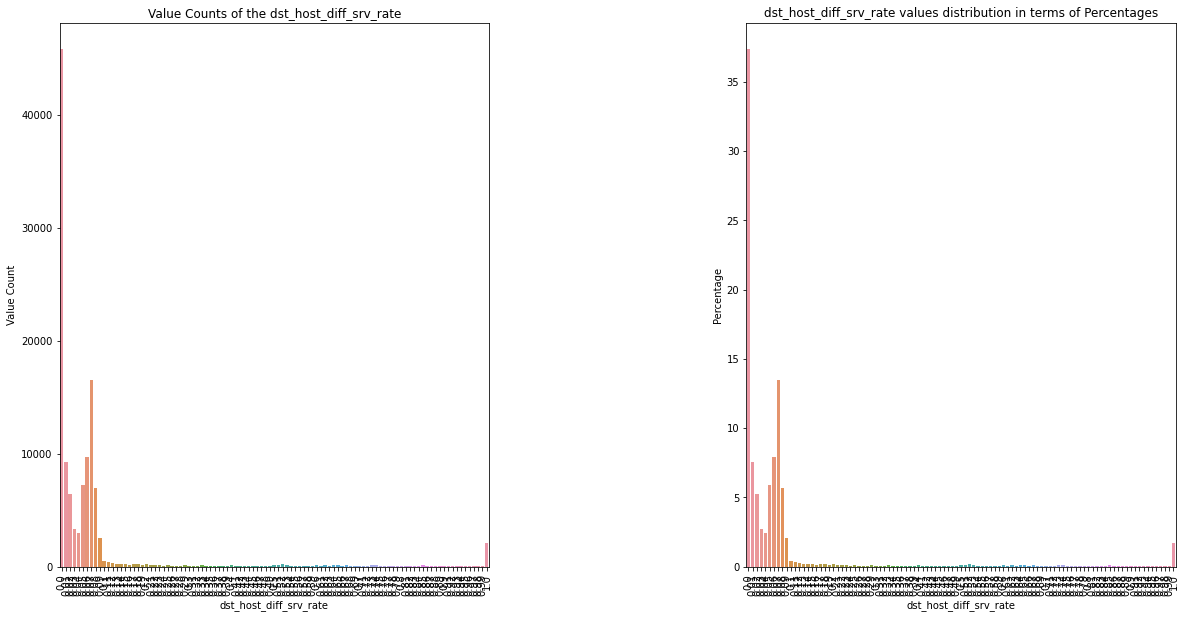

     dst_host_diff_srv_rate  counts  Percentage
0                      0.00   45848     37.3851
1                      0.07   16504     13.4576
2                      0.06    9707      7.9152
3                      0.01    9236      7.5312
4                      0.05    7233      5.8979
..                      ...     ...         ...
96                     0.92      39      0.0318
97                     0.34      39      0.0318
98                     0.88      37      0.0302
99                     0.98      35      0.0285
100                    0.99      30      0.0245

[101 rows x 3 columns]


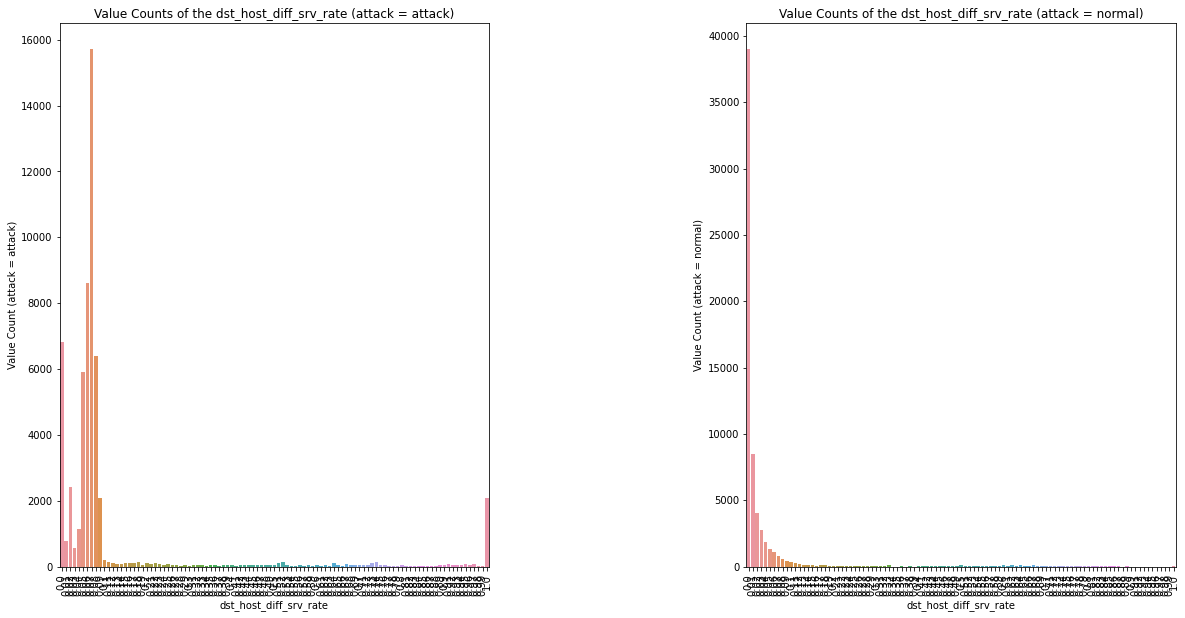

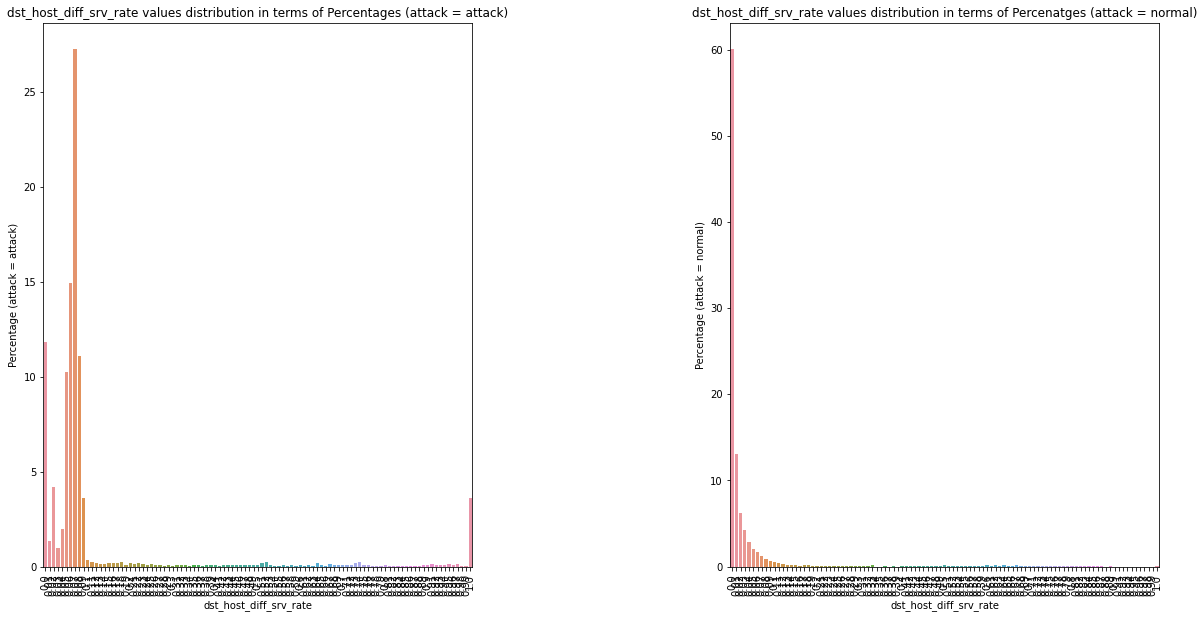

     dst_host_diff_srv_rate  Counts (attack = attack)  \
1                      0.07                     15721   
2                      0.06                      8599   
4                      0.00                      6833   
5                      0.08                      6396   
6                      0.05                      5912   
..                      ...                       ...   
169                    0.41                        25   
172                    0.83                        24   
173                    0.79                        24   
174                    0.81                        24   
175                    0.86                        22   

     Percentage (attack = attack)  
1                         27.2419  
2                         14.9006  
4                         11.8404  
5                         11.0832  
6                         10.2445  
..                            ...  
169                        0.0433  
172                        

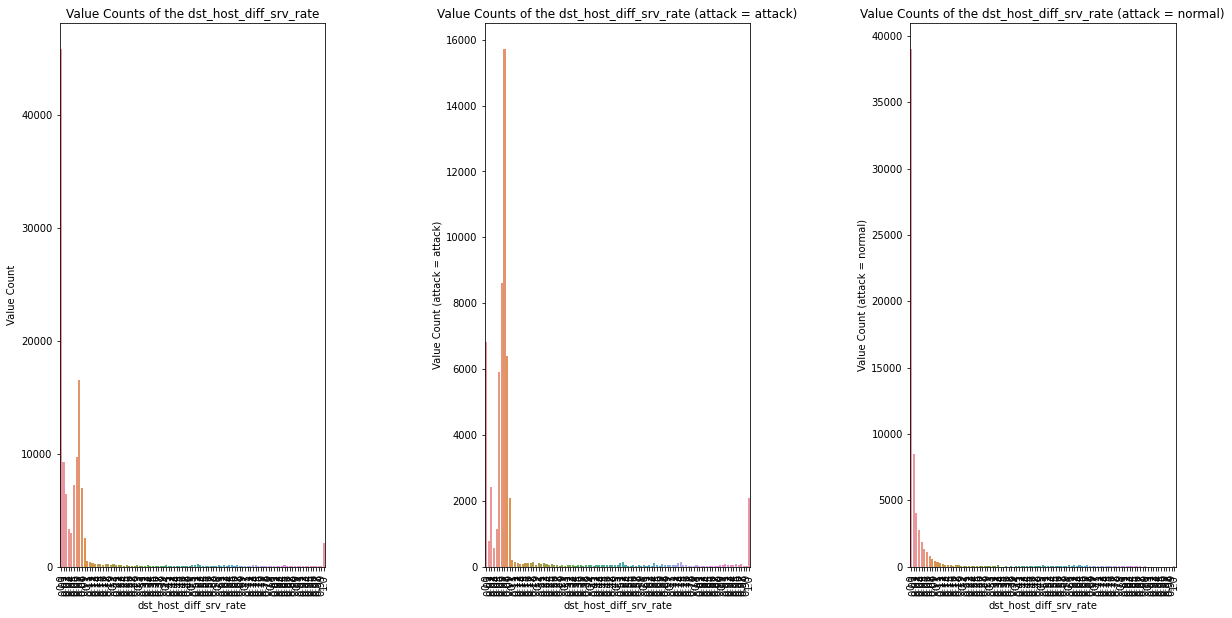

Histograms to analyze the dst_host_diff_srv_rate distribution


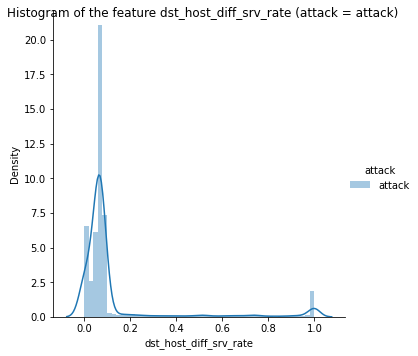

count    57709.000000
mean         0.125761
std          0.224562
min          0.000000
25%          0.050000
50%          0.070000
75%          0.080000
max          1.000000
Name: dst_host_diff_srv_rate, dtype: float64


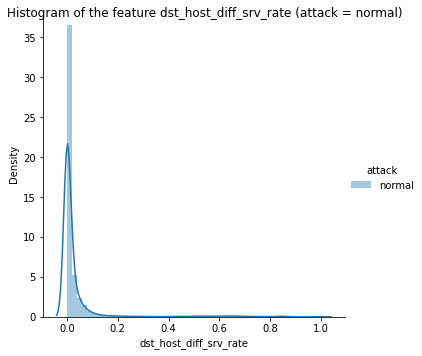

count    64928.000000
mean         0.037902
std          0.124131
min          0.000000
25%          0.000000
50%          0.000000
75%          0.020000
max          1.000000
Name: dst_host_diff_srv_rate, dtype: float64


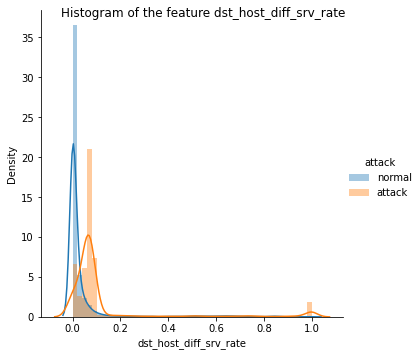

Box Plots to analyze the dst_host_diff_srv_rate distribution


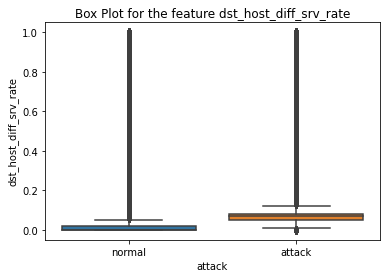

count    122637.000000
mean          0.079245
std           0.183876
min           0.000000
25%           0.000000
50%           0.020000
75%           0.070000
max           1.000000
Name: dst_host_diff_srv_rate, dtype: float64


In [65]:
feature = "dst_host_diff_srv_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Bar Plots to analyze the dst_host_same_src_port_rate distribution


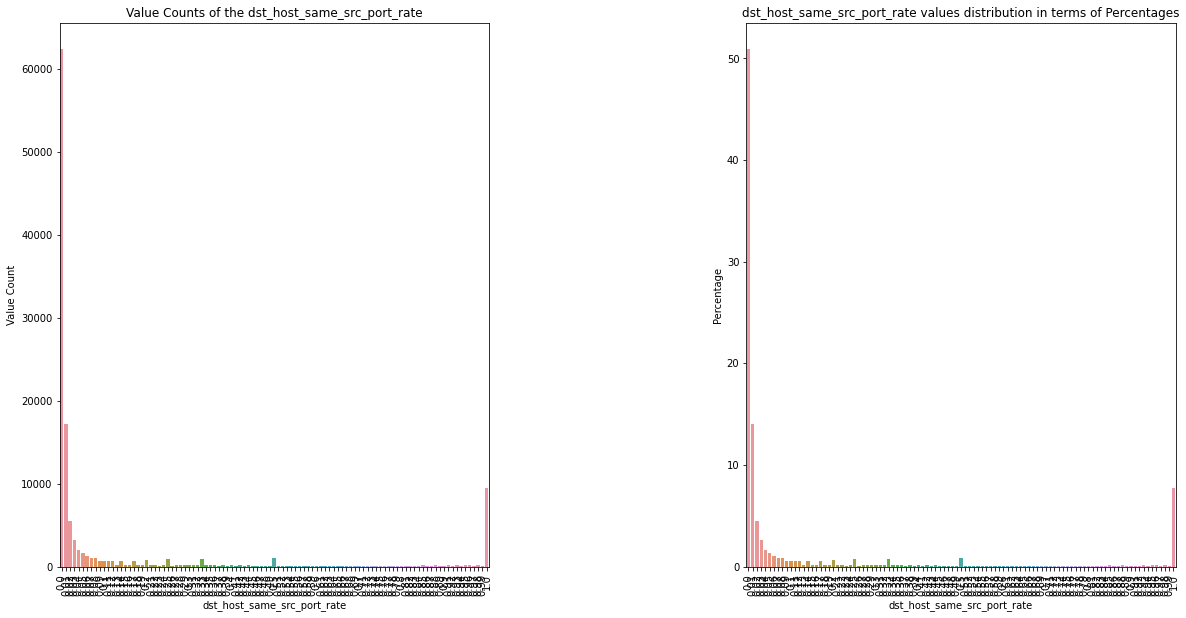

     dst_host_same_src_port_rate  counts  Percentage
0                           0.00   62459     50.9300
1                           0.01   17186     14.0137
2                           1.00    9454      7.7089
3                           0.02    5555      4.5296
4                           0.03    3169      2.5840
..                           ...     ...         ...
96                          0.74      62      0.0506
97                          0.63      62      0.0506
98                          0.77      61      0.0497
99                          0.72      54      0.0440
100                         0.66      53      0.0432

[101 rows x 3 columns]


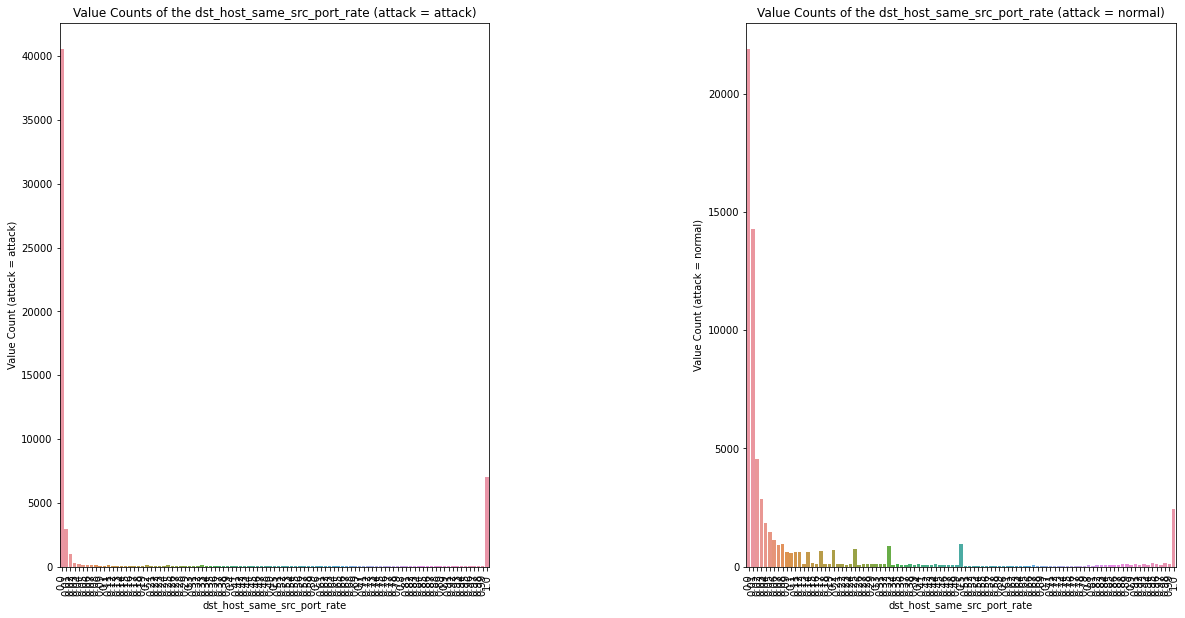

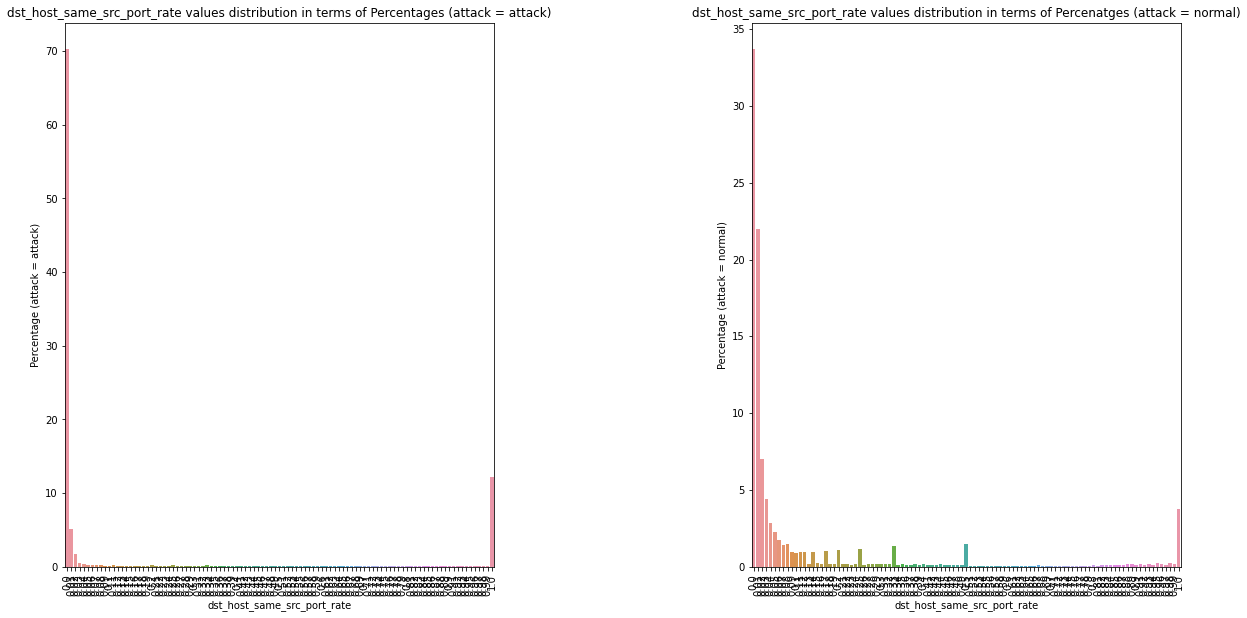

     dst_host_same_src_port_rate  Counts (attack = attack)  \
0                           0.00                     40568   
3                           1.00                      7027   
5                           0.01                      2918   
11                          0.02                      1000   
24                          0.03                       323   
..                           ...                       ...   
183                         0.77                        33   
189                         0.79                        30   
190                         0.81                        30   
191                         0.98                        29   
200                         0.99                        14   

     Percentage (attack = attack)  
0                         70.2975  
3                         12.1766  
5                          5.0564  
11                         1.7328  
24                         0.5597  
..                            ...  
183

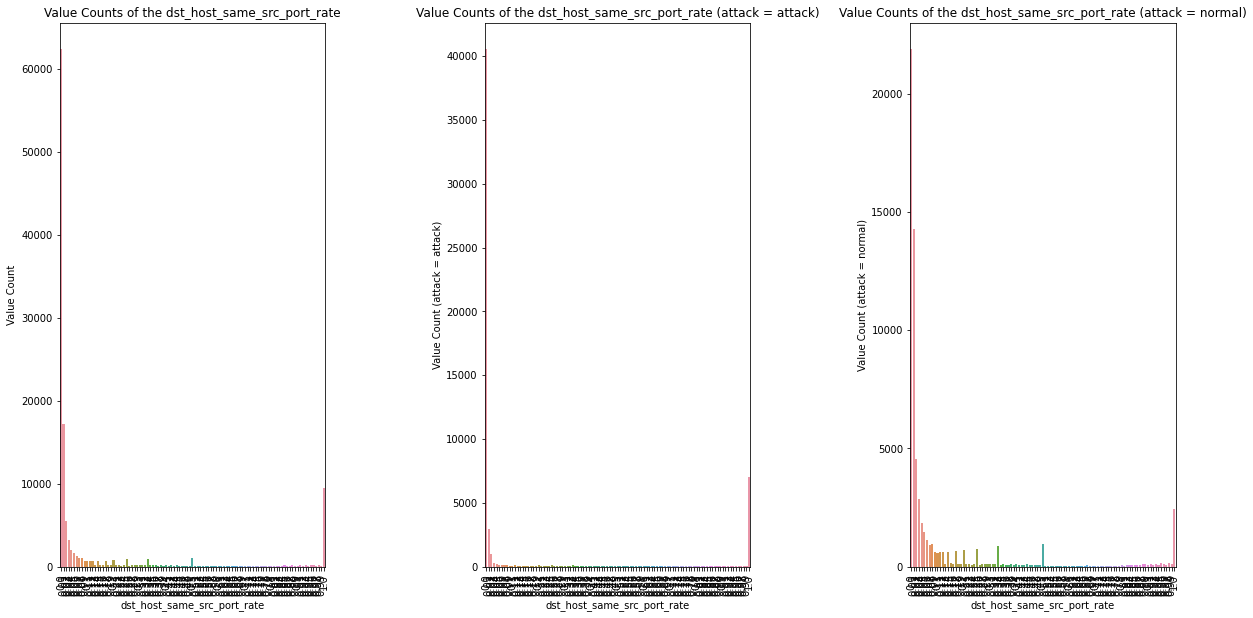

Histograms to analyze the dst_host_same_src_port_rate distribution


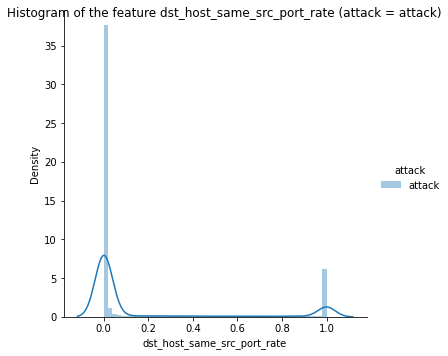

count    57709.000000
mean         0.167603
std          0.348981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.010000
max          1.000000
Name: dst_host_same_src_port_rate, dtype: float64


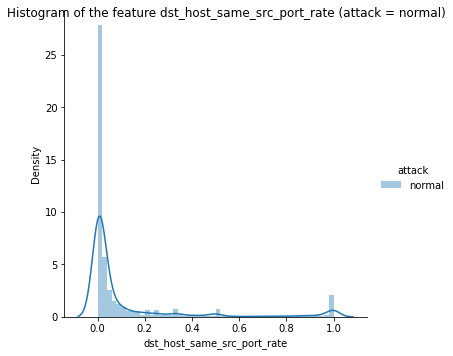

count    64928.000000
mean         0.119035
std          0.251953
min          0.000000
25%          0.000000
50%          0.010000
75%          0.070000
max          1.000000
Name: dst_host_same_src_port_rate, dtype: float64


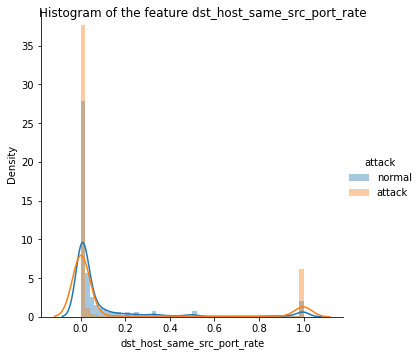

Box Plots to analyze the dst_host_same_src_port_rate distribution


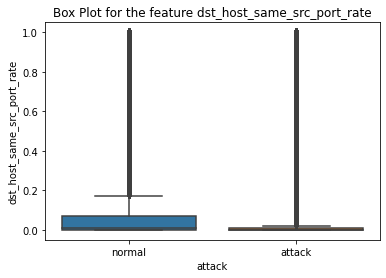

count    122637.000000
mean          0.141889
std           0.302498
min           0.000000
25%           0.000000
50%           0.000000
75%           0.050000
max           1.000000
Name: dst_host_same_src_port_rate, dtype: float64


In [66]:
feature = "dst_host_same_src_port_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Bar Plots to analyze the dst_host_srv_diff_host_rate distribution


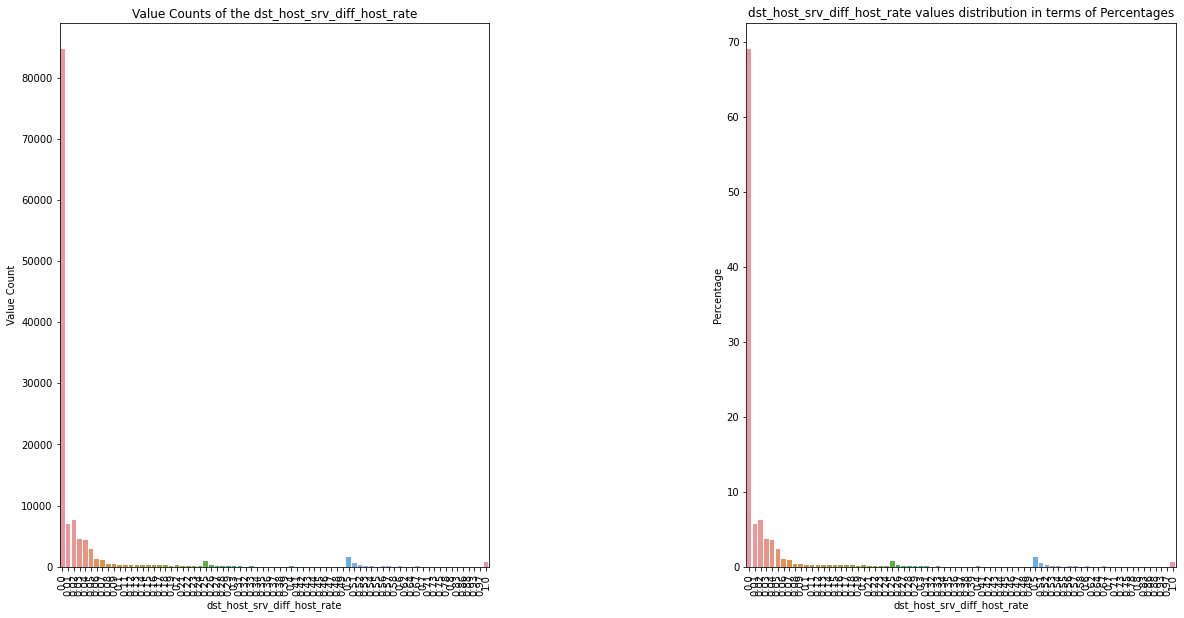

    dst_host_srv_diff_host_rate  counts  Percentage
0                          0.00   84693     69.0599
1                          0.02    7695      6.2746
2                          0.01    7015      5.7201
3                          0.03    4529      3.6930
4                          0.04    4326      3.5275
..                          ...     ...         ...
70                         0.71       1      0.0008
71                         0.88       1      0.0008
72                         0.83       1      0.0008
73                         0.70       1      0.0008
74                         0.78       1      0.0008

[75 rows x 3 columns]


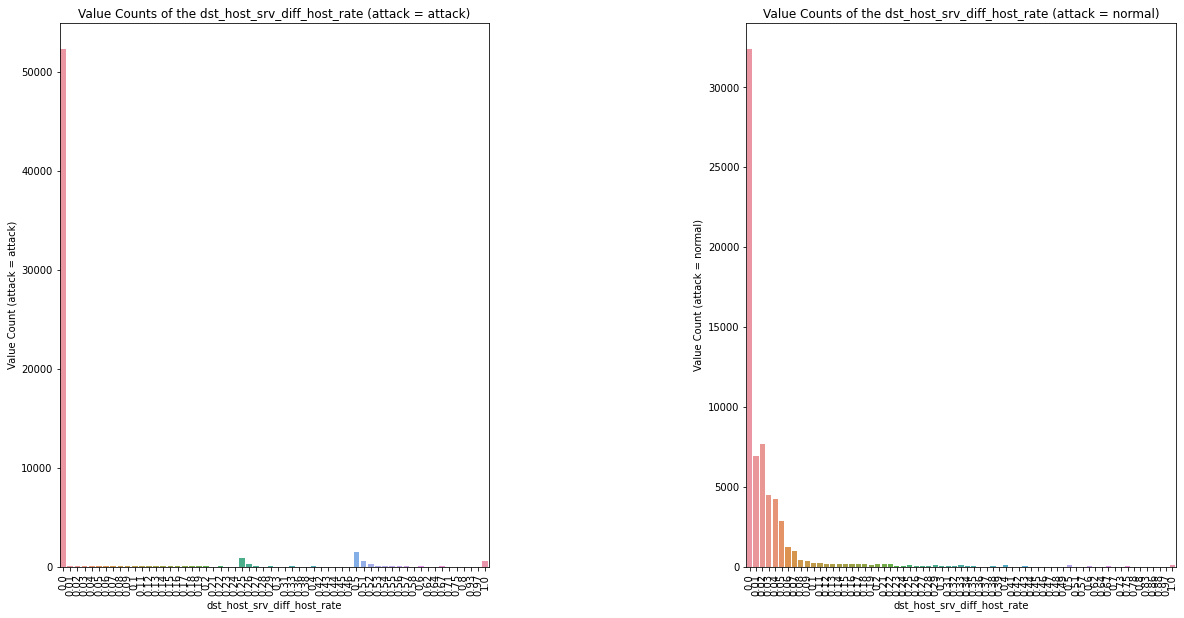

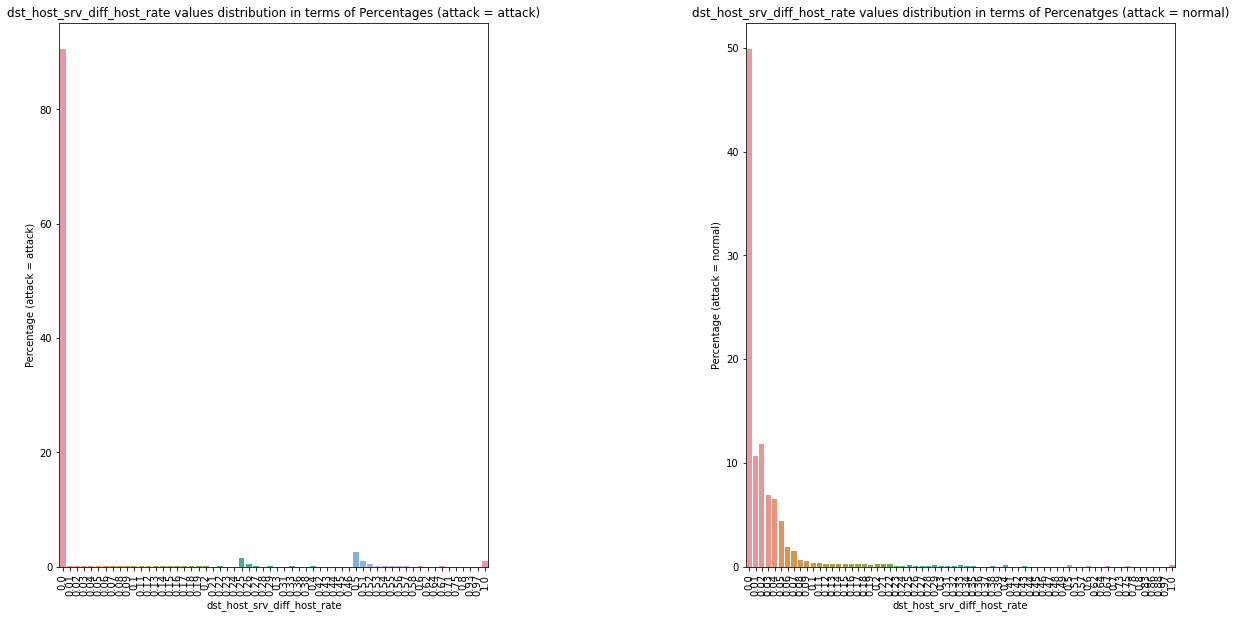

     dst_host_srv_diff_host_rate  Counts (attack = attack)  \
0                           0.00                     52283   
7                           0.50                      1467   
10                          0.25                       829   
11                          0.51                       620   
12                          1.00                       575   
15                          0.26                       298   
16                          0.52                       244   
32                          0.04                       106   
34                          0.01                        82   
38                          0.53                        75   
39                          0.27                        73   
42                          0.03                        62   
44                          0.12                        56   
45                          0.54                        56   
46                          0.05                        55   
47      

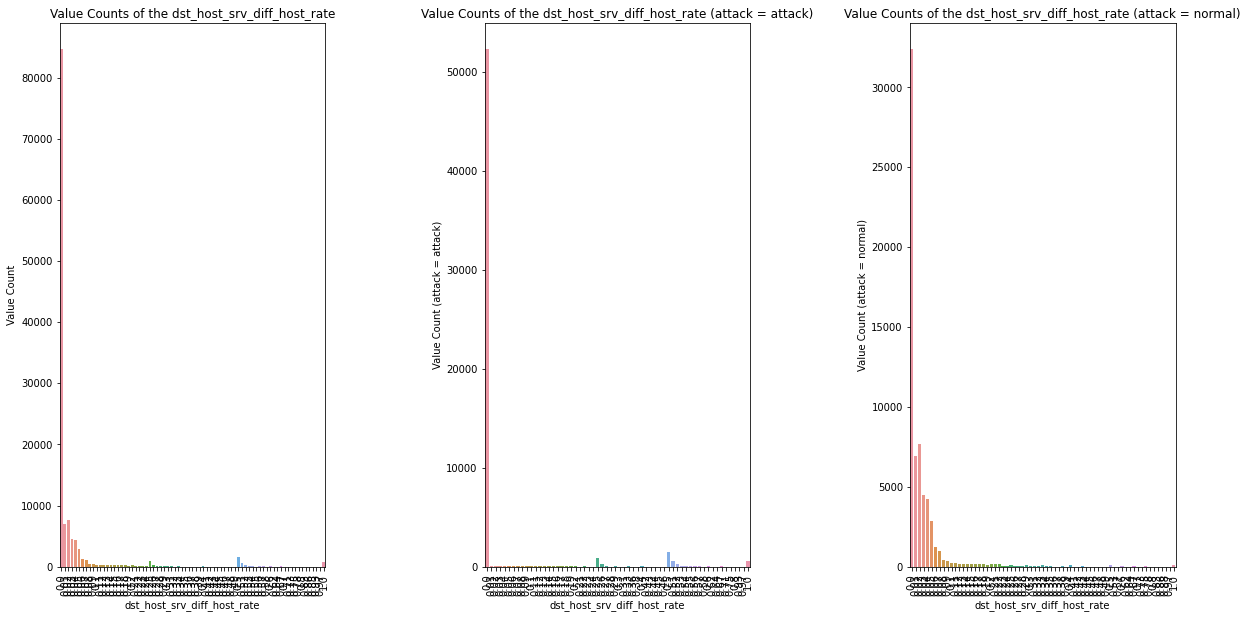

Histograms to analyze the dst_host_srv_diff_host_rate distribution


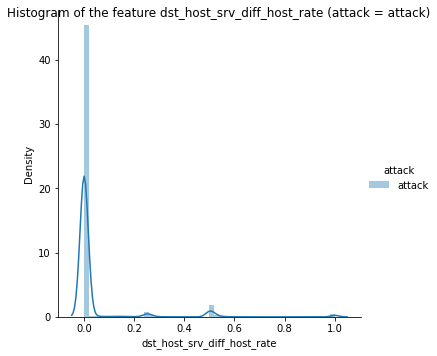

count    57709.000000
mean         0.040576
std          0.148281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_srv_diff_host_rate, dtype: float64


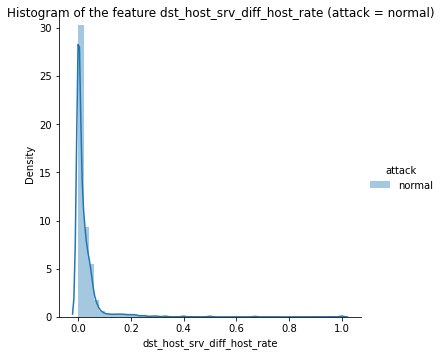

count    64928.000000
mean         0.026026
std          0.068219
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max          1.000000
Name: dst_host_srv_diff_host_rate, dtype: float64


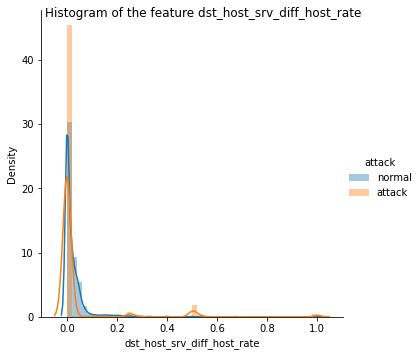

Box Plots to analyze the dst_host_srv_diff_host_rate distribution


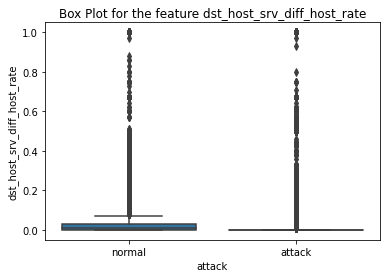

count    122637.000000
mean          0.032873
std           0.113415
min           0.000000
25%           0.000000
50%           0.000000
75%           0.020000
max           1.000000
Name: dst_host_srv_diff_host_rate, dtype: float64


In [67]:
feature = "dst_host_srv_diff_host_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Bar Plots to analyze the dst_host_serror_rate distribution


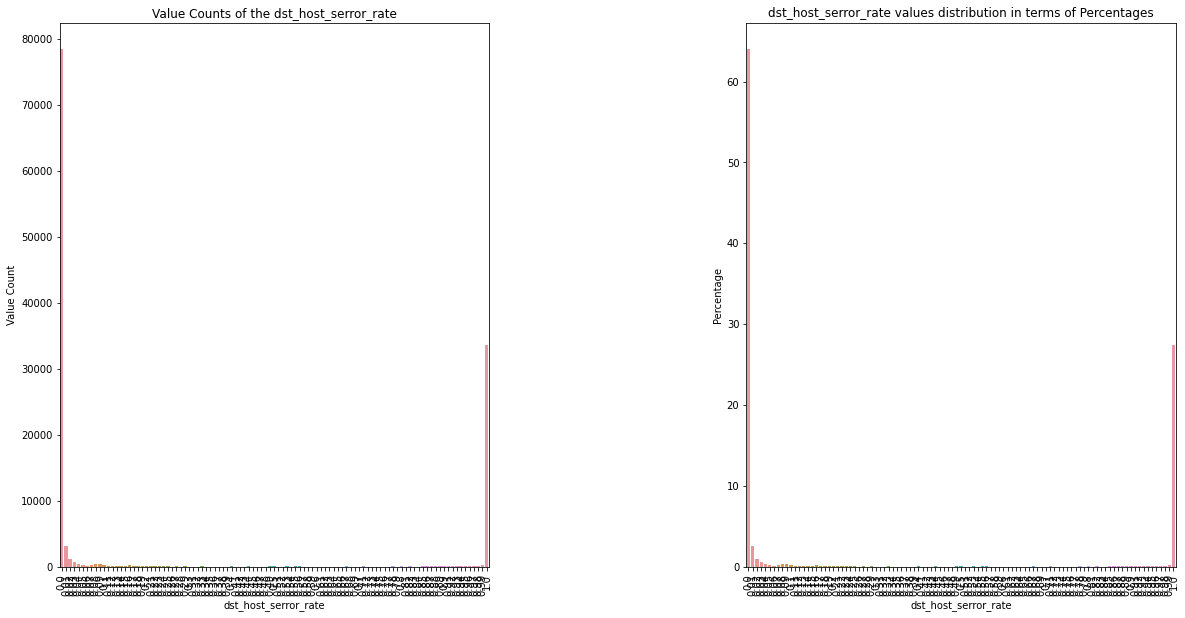

     dst_host_serror_rate  counts  Percentage
0                    0.00   78538     64.0410
1                    1.00   33554     27.3604
2                    0.01    3184      2.5963
3                    0.02    1096      0.8937
4                    0.03     683      0.5569
..                    ...     ...         ...
96                   0.59      10      0.0082
97                   0.34      10      0.0082
98                   0.30      10      0.0082
99                   0.32       9      0.0073
100                  0.43       9      0.0073

[101 rows x 3 columns]


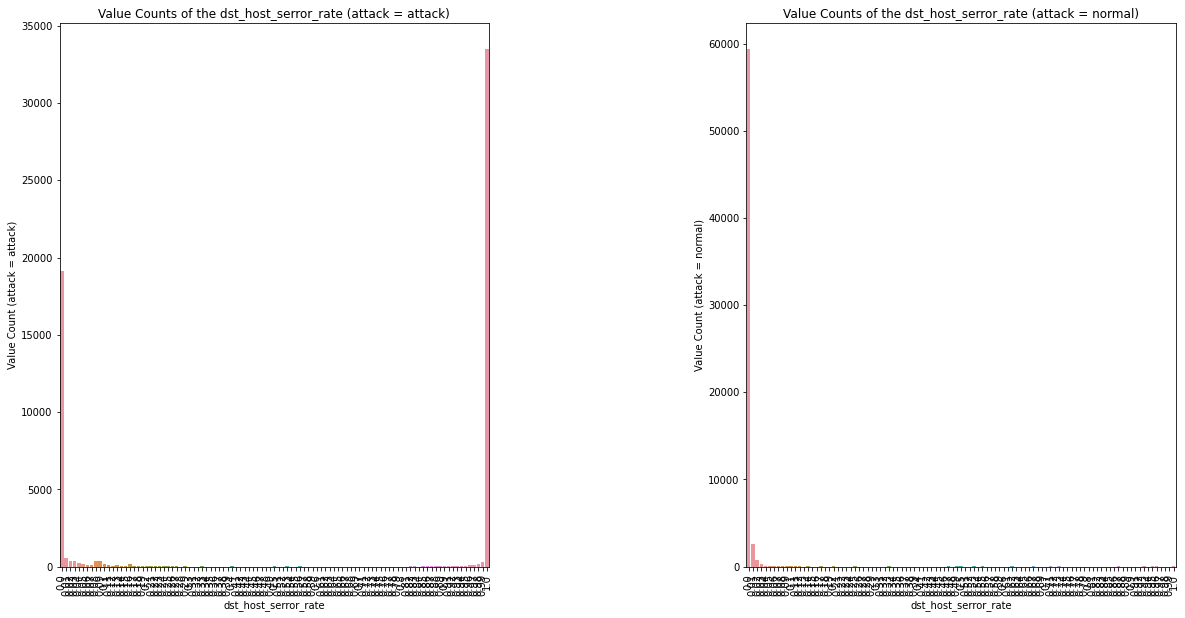

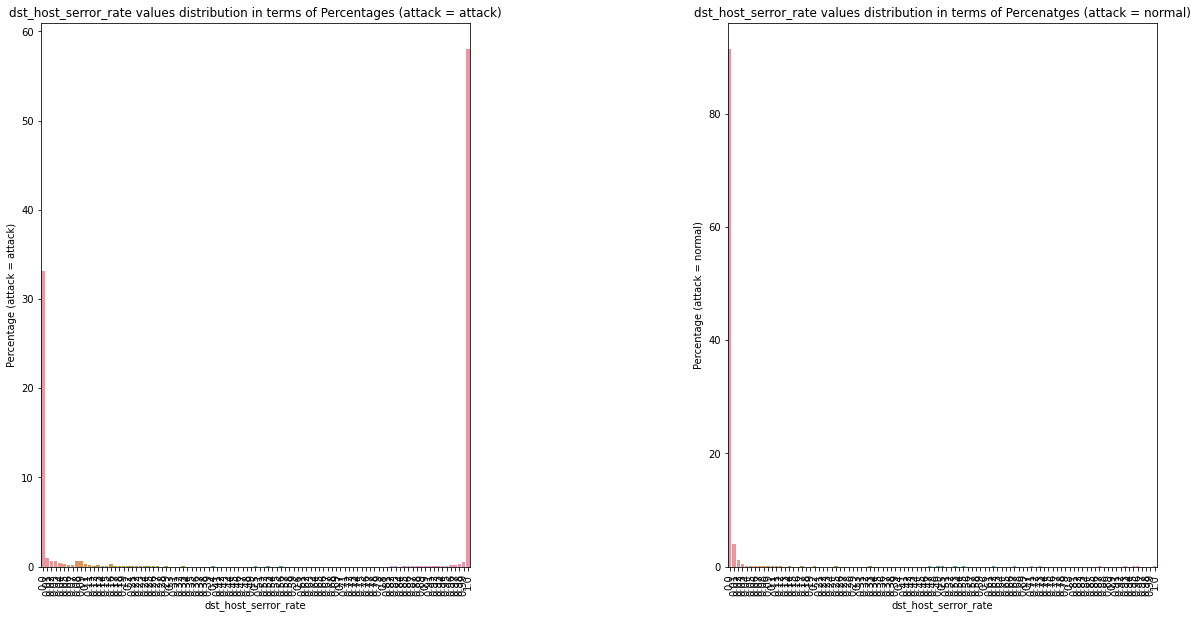

     dst_host_serror_rate  Counts (attack = attack)  \
1                    1.00                     33497   
2                    0.00                     19159   
5                    0.01                       546   
6                    0.02                       388   
7                    0.09                       380   
..                    ...                       ...   
195                  0.69                         2   
198                  0.72                         2   
199                  0.65                         2   
200                  0.63                         1   
201                  0.66                         1   

     Percentage (attack = attack)  
1                         58.0447  
2                         33.1993  
5                          0.9461  
6                          0.6723  
7                          0.6585  
..                            ...  
195                        0.0035  
198                        0.0035  
199            

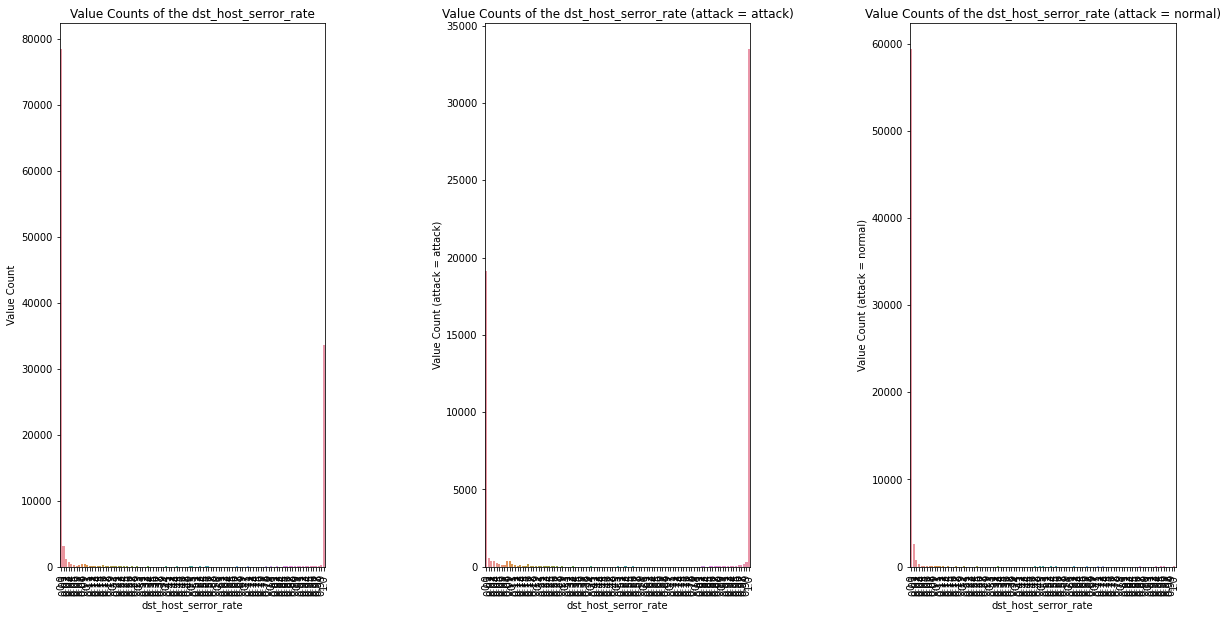

Histograms to analyze the dst_host_serror_rate distribution


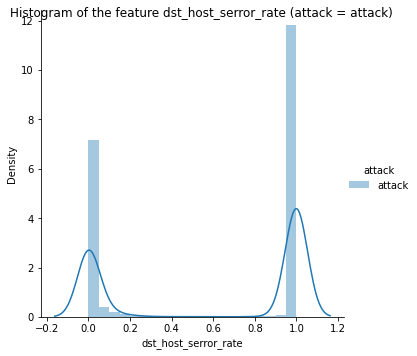

count    57709.000000
mean         0.604600
std          0.482505
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: dst_host_serror_rate, dtype: float64


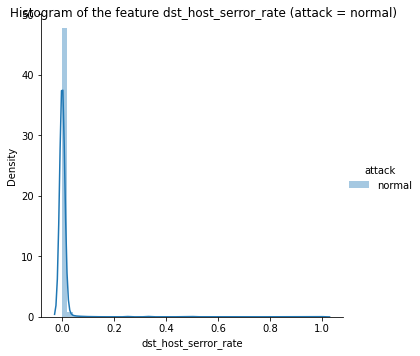

count    64928.000000
mean         0.012948
std          0.088614
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_serror_rate, dtype: float64


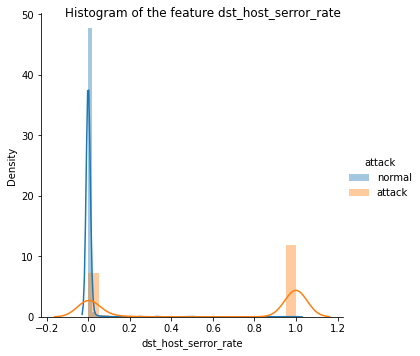

Box Plots to analyze the dst_host_serror_rate distribution


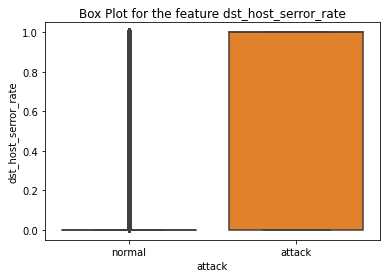

count    122637.000000
mean          0.291361
std           0.448241
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: dst_host_serror_rate, dtype: float64


In [68]:
feature = "dst_host_serror_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Bar Plots to analyze the dst_host_srv_serror_rate distribution


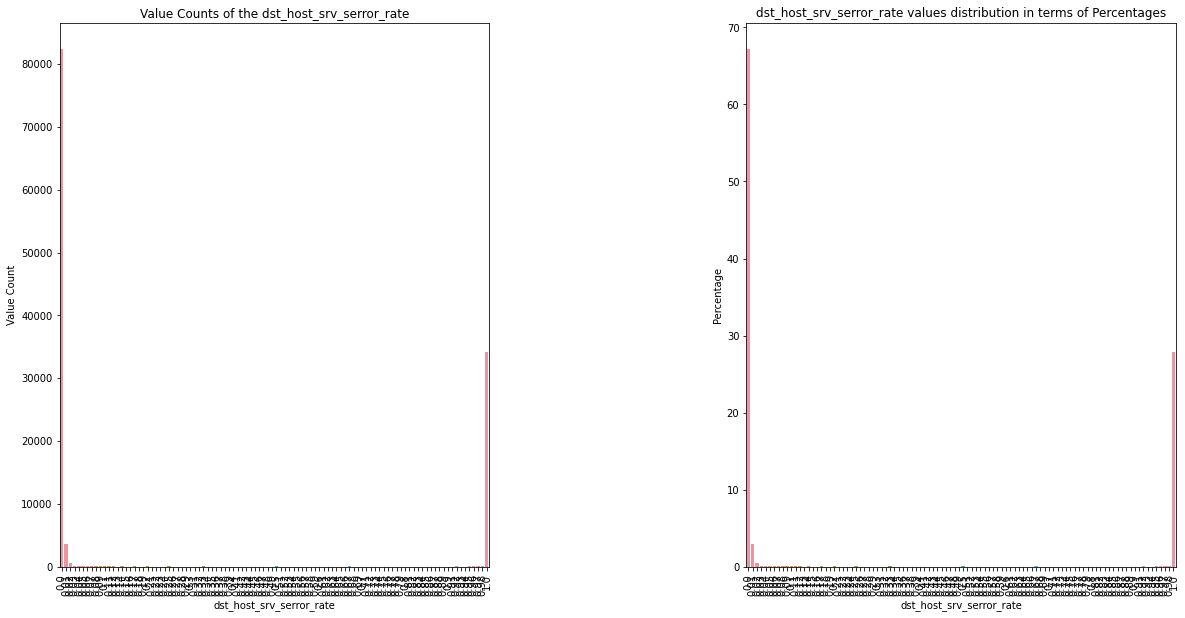

    dst_host_srv_serror_rate  counts  Percentage
0                       0.00   82425     67.2105
1                       1.00   34252     27.9296
2                       0.01    3628      2.9583
3                       0.02     605      0.4933
4                       0.03     139      0.1133
..                       ...     ...         ...
95                      0.35       4      0.0033
96                      0.59       3      0.0024
97                      0.44       3      0.0024
98                      0.46       2      0.0016
99                      0.23       2      0.0016

[100 rows x 3 columns]


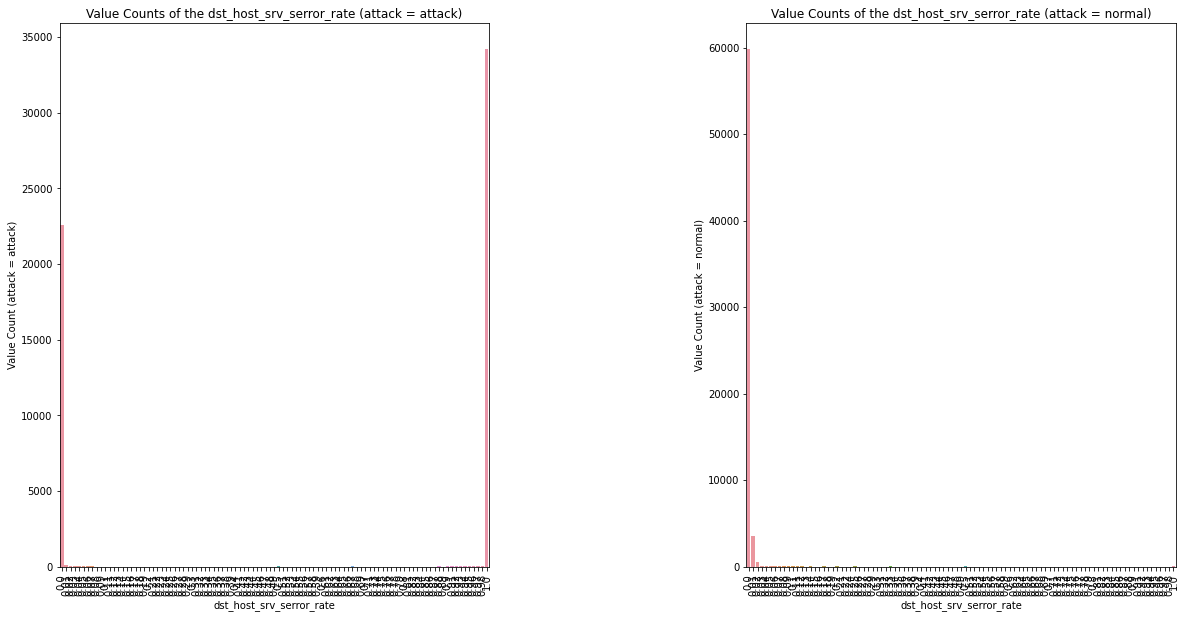

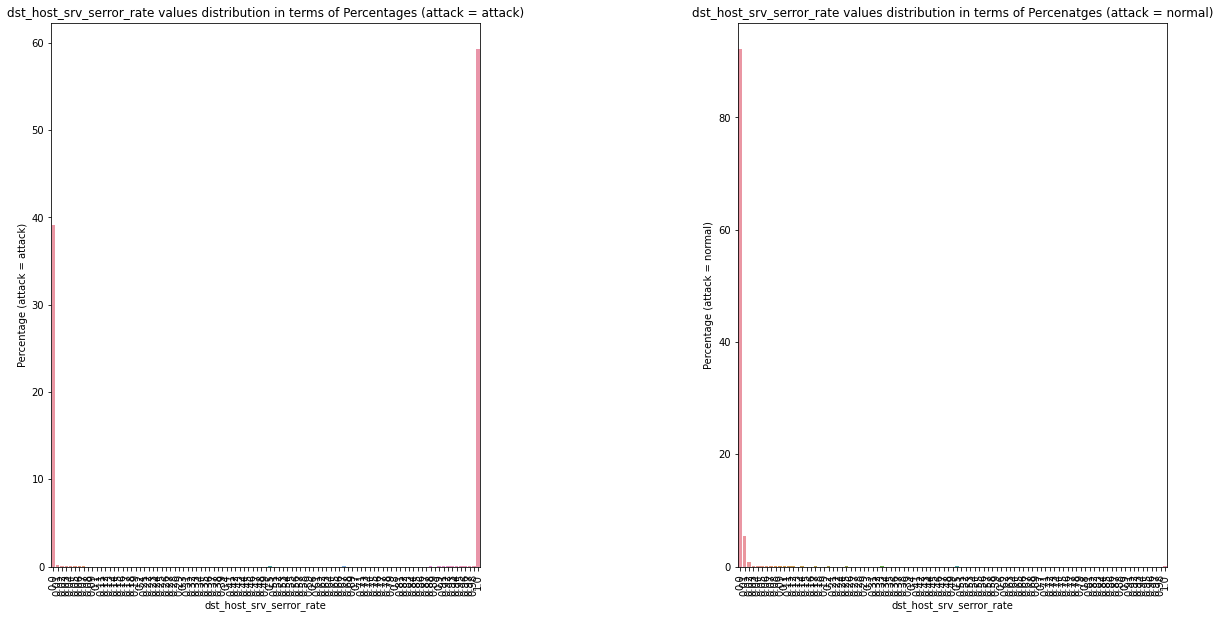

     dst_host_srv_serror_rate  Counts (attack = attack)  \
1                        1.00                     34222   
2                        0.00                     22561   
5                        0.01                       119   
7                        0.50                        74   
9                        0.02                        64   
..                        ...                       ...   
186                      0.15                         1   
188                      0.77                         1   
191                      0.59                         1   
192                      0.46                         1   
195                      0.47                         1   

     Percentage (attack = attack)  
1                         59.3010  
2                         39.0944  
5                          0.2062  
7                          0.1282  
9                          0.1109  
..                            ...  
186                        0.0017  
188

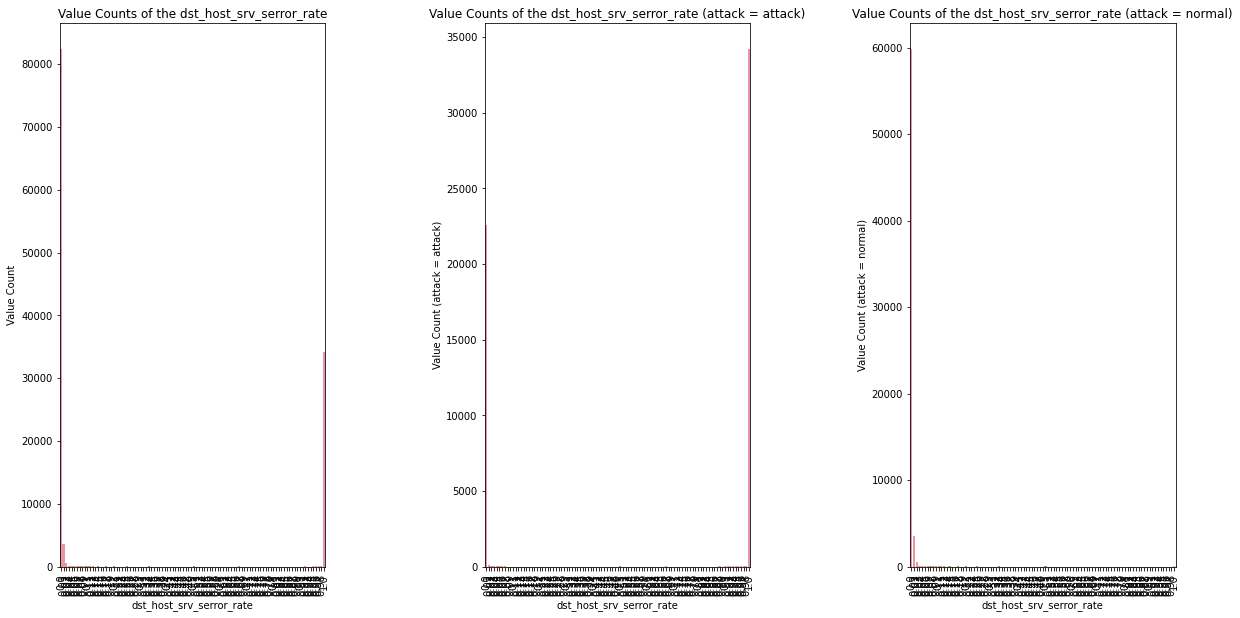

Histograms to analyze the dst_host_srv_serror_rate distribution


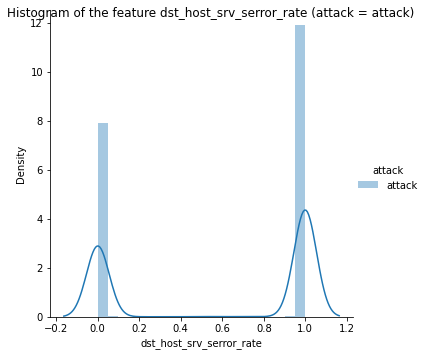

count    57709.000000
mean         0.600721
std          0.488025
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: dst_host_srv_serror_rate, dtype: float64


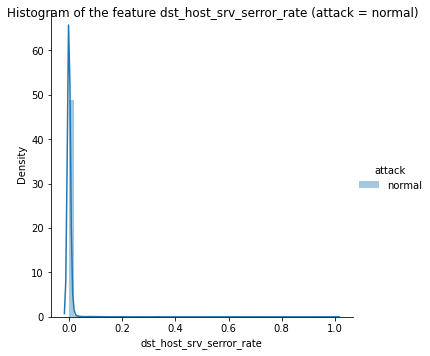

count    64928.000000
mean         0.005127
std          0.050859
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_srv_serror_rate, dtype: float64


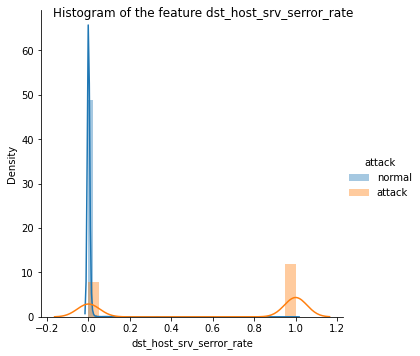

Box Plots to analyze the dst_host_srv_serror_rate distribution


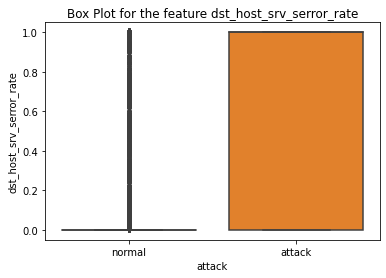

count    122637.000000
mean          0.285394
std           0.449243
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: dst_host_srv_serror_rate, dtype: float64


In [69]:
feature = "dst_host_srv_serror_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Bar Plots to analyze the dst_host_rerror_rate distribution


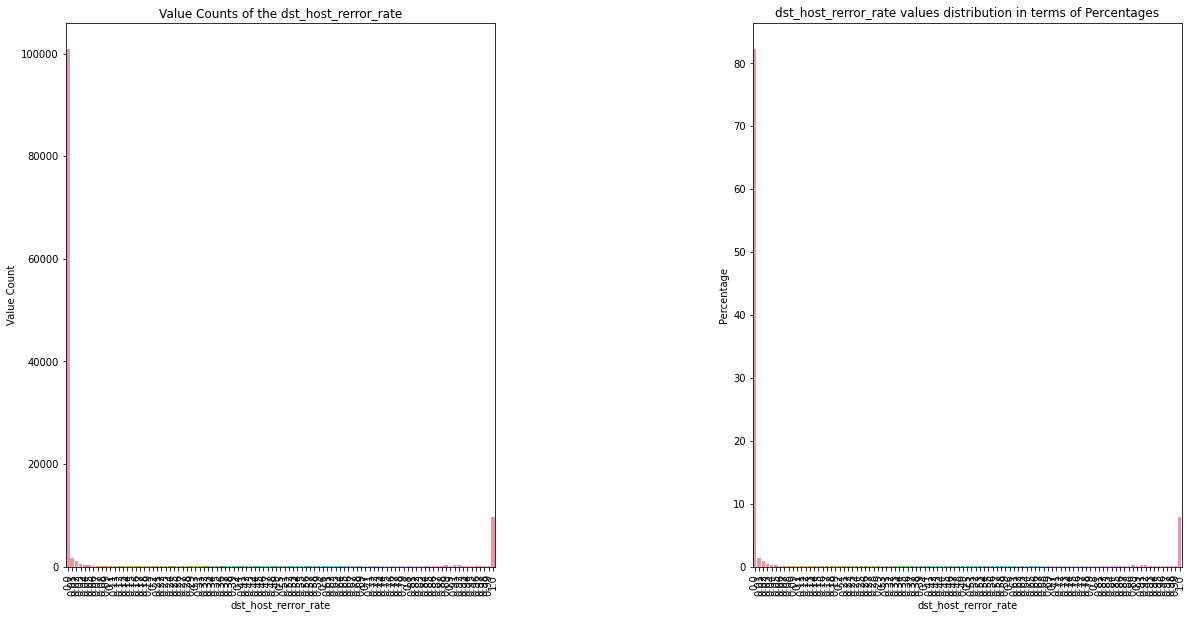

     dst_host_rerror_rate  counts  Percentage
0                    0.00  100920     82.2916
1                    1.00    9621      7.8451
2                    0.01    1742      1.4205
3                    0.02    1180      0.9622
4                    0.03     479      0.3906
..                    ...     ...         ...
96                   0.54      48      0.0391
97                   0.70      45      0.0367
98                   0.66      42      0.0342
99                   0.72      41      0.0334
100                  0.68      37      0.0302

[101 rows x 3 columns]


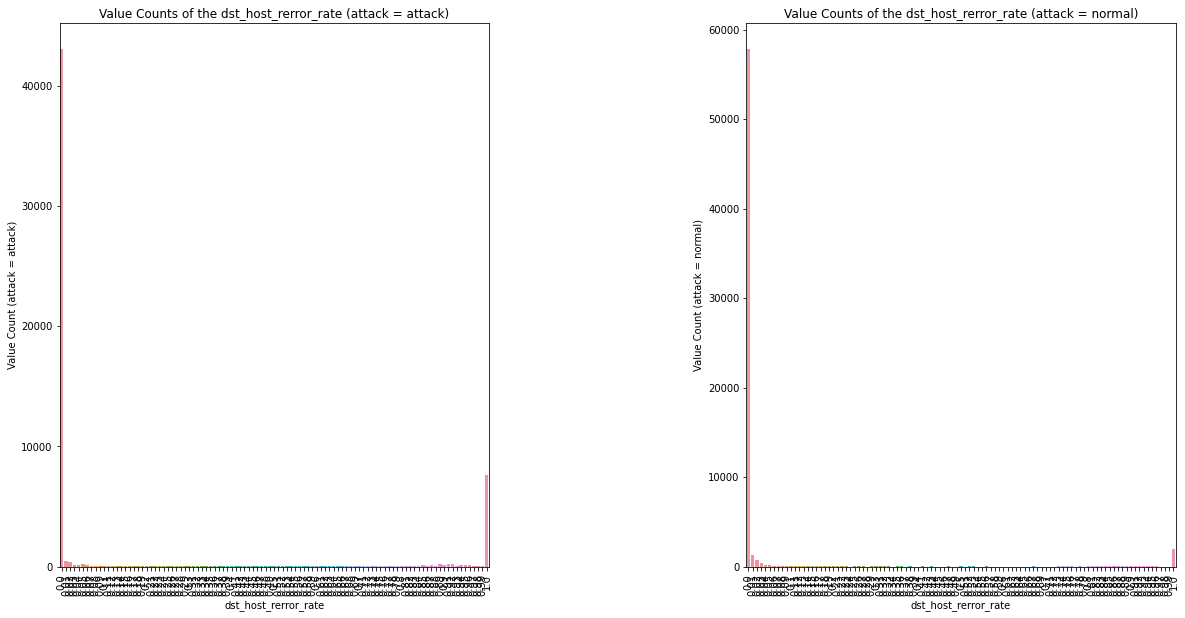

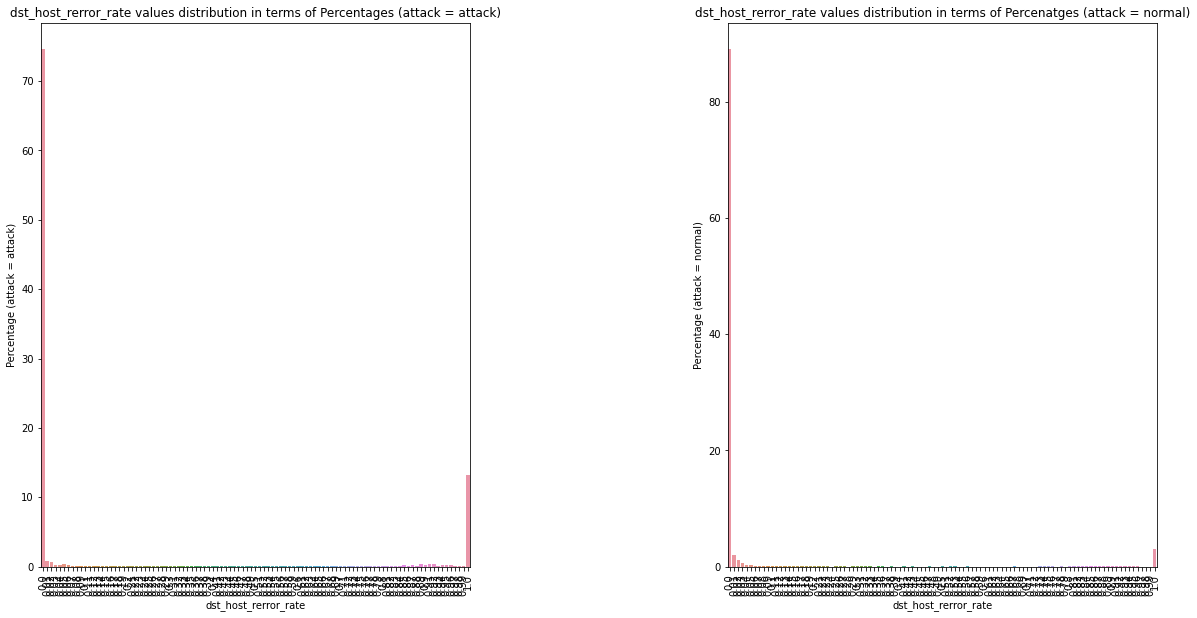

     dst_host_rerror_rate  Counts (attack = attack)  \
1                    0.00                     43075   
2                    1.00                      7601   
6                    0.01                       491   
7                    0.02                       412   
9                    0.91                       241   
..                    ...                       ...   
127                  0.66                        28   
128                  0.14                        27   
130                  0.12                        27   
134                  0.72                        26   
135                  0.68                        26   

     Percentage (attack = attack)  
1                         74.6417  
2                         13.1713  
6                          0.8508  
7                          0.7139  
9                          0.4176  
..                            ...  
127                        0.0485  
128                        0.0468  
130            

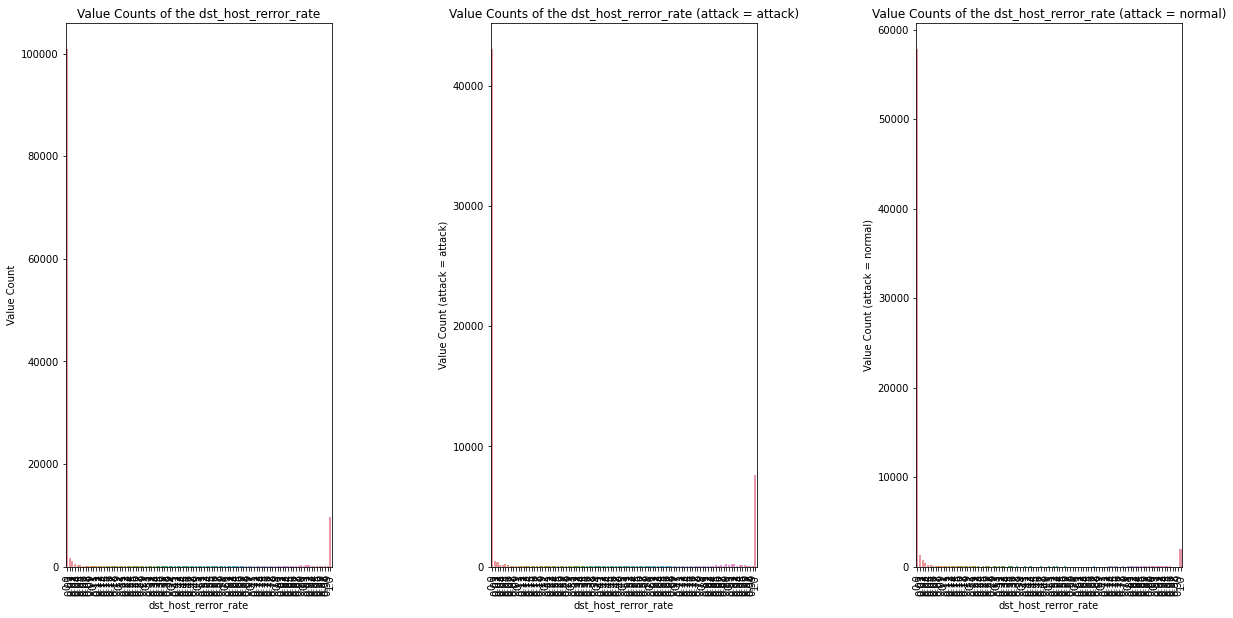

Histograms to analyze the dst_host_rerror_rate distribution


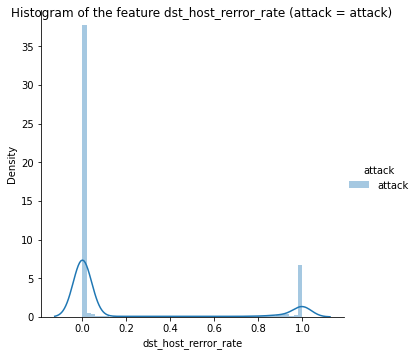

count    57709.000000
mean         0.192091
std          0.373507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.010000
max          1.000000
Name: dst_host_rerror_rate, dtype: float64


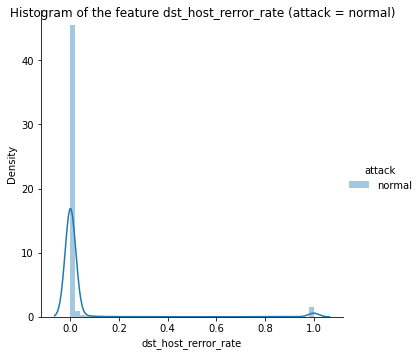

count    64928.000000
mean         0.047736
std          0.198132
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_rerror_rate, dtype: float64


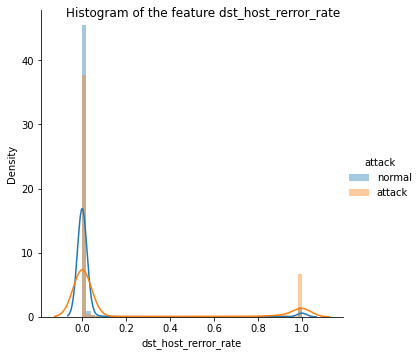

Box Plots to analyze the dst_host_rerror_rate distribution


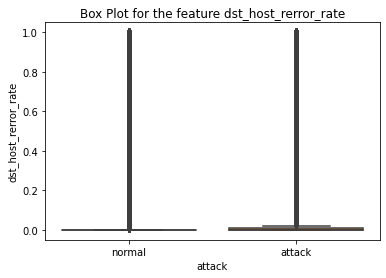

count    122637.000000
mean          0.115665
std           0.302691
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: dst_host_rerror_rate, dtype: float64


In [70]:
feature = "dst_host_rerror_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

Max value is : 1.0
Min value is : 0.0
Bar Plots to analyze the dst_host_srv_rerror_rate distribution


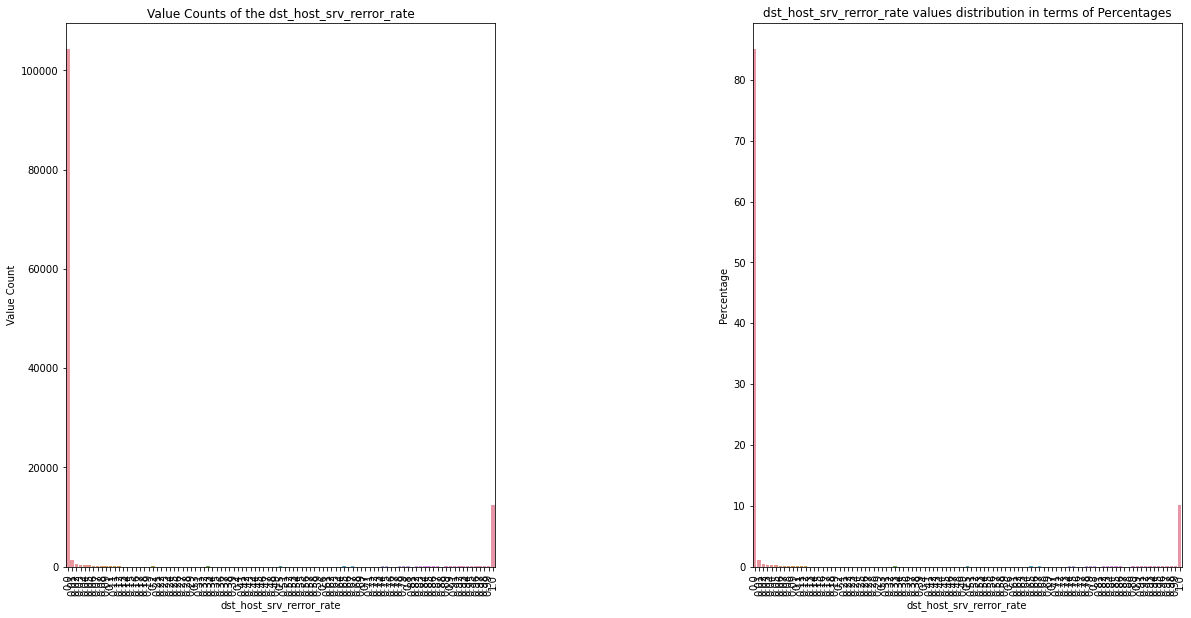

     dst_host_srv_rerror_rate  counts  Percentage
0                        0.00  104346     85.0853
1                        1.00   12405     10.1152
2                        0.01    1349      1.1000
3                        0.02     563      0.4591
4                        0.05     342      0.2789
..                        ...     ...         ...
96                       0.21       5      0.0041
97                       0.23       4      0.0033
98                       0.28       4      0.0033
99                       0.43       3      0.0024
100                      0.26       3      0.0024

[101 rows x 3 columns]


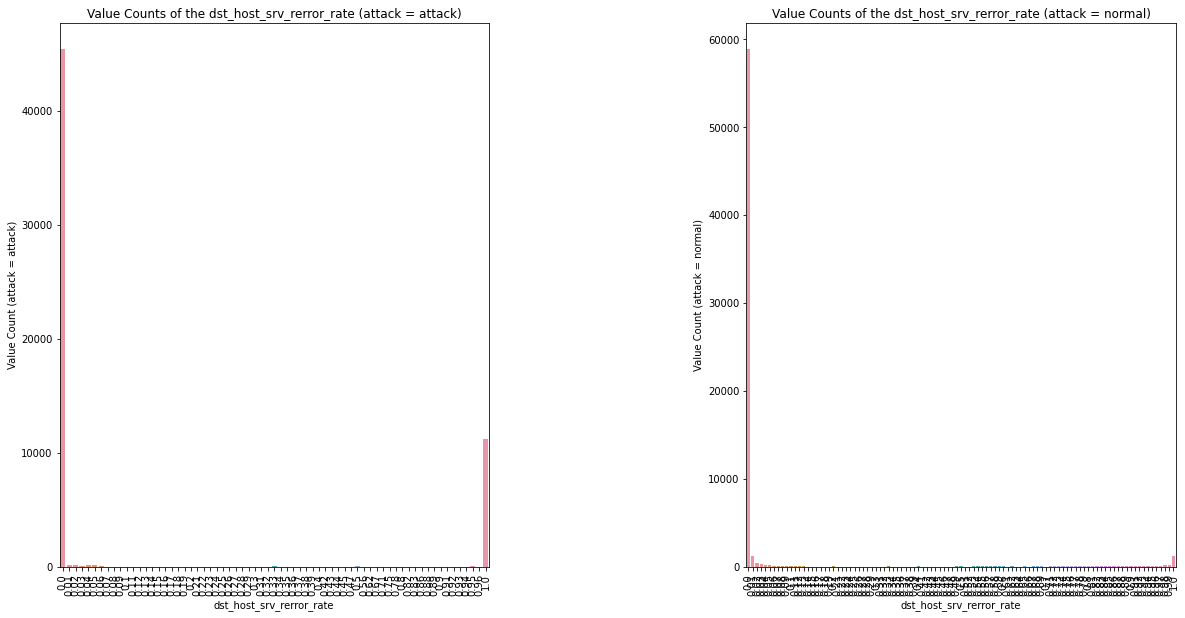

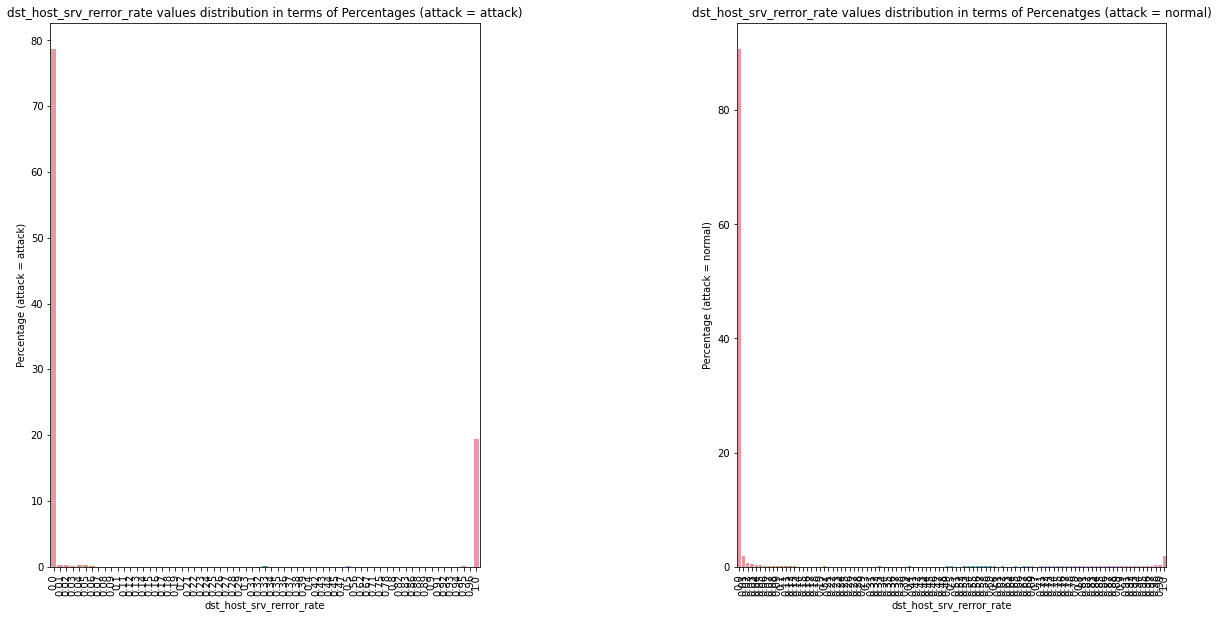

     dst_host_srv_rerror_rate  Counts (attack = attack)  \
1                        0.00                     45421   
2                        1.00                     11162   
10                       0.01                       181   
11                       0.05                       178   
13                       0.02                       148   
..                        ...                       ...   
162                      0.82                         1   
163                      0.34                         1   
164                      0.75                         1   
165                      0.88                         1   
167                      0.89                         1   

     Percentage (attack = attack)  
1                         78.7070  
2                         19.3419  
10                         0.3136  
11                         0.3084  
13                         0.2565  
..                            ...  
162                        0.0017  
163

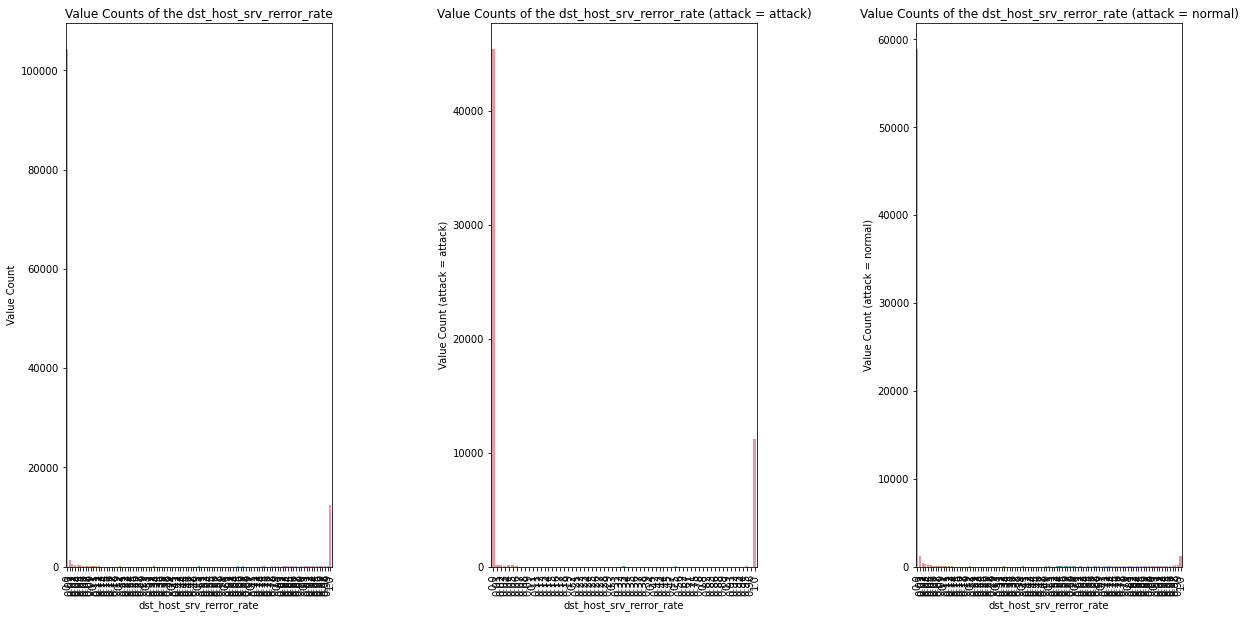

Histograms to analyze the dst_host_srv_rerror_rate distribution


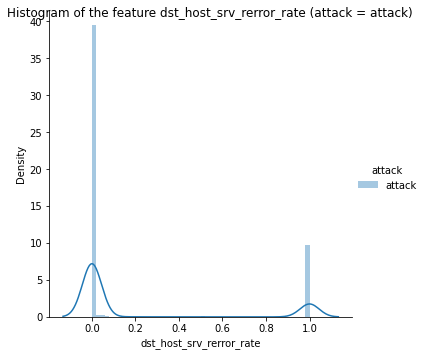

count    57709.000000
mean         0.196246
std          0.395397
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_srv_rerror_rate, dtype: float64


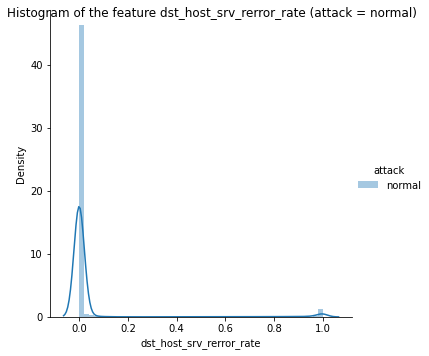

count    64928.000000
mean         0.045390
std          0.194239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dst_host_srv_rerror_rate, dtype: float64


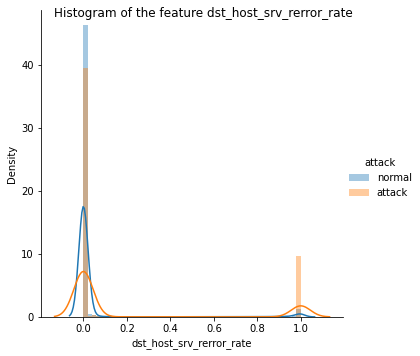

Box Plots to analyze the dst_host_srv_rerror_rate distribution


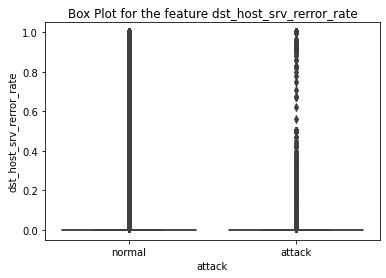

count    122637.000000
mean          0.116378
std           0.314979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: dst_host_srv_rerror_rate, dtype: float64


In [71]:
feature = "dst_host_srv_rerror_rate"
print("Max value is :",train_data[feature].max()) # Printing max value of the feature
print("Min value is :",train_data[feature].min()) #Printing min value of the feature
plot_categorical_features(feature) # For plotting the data distribution of the feature
plot_numerical_features(feature) # For plotting the data distribution of the feature

In [72]:
from sklearn.preprocessing import OneHotEncoder
protocol_type_enc = OneHotEncoder(handle_unknown='ignore')
enc_protocol_df = pd.DataFrame(protocol_type_enc.fit_transform(train_data[['protocol_type']]).toarray())


In [73]:
pickle.dump(protocol_type_enc, open('protocol_type_enc.pkl', 'wb'))

In [74]:
train_data.reset_index(drop=True,inplace=True)

In [75]:
enc_protocol_df.columns = ["protocol_type_icmp","protocol_type_tcp","protocol_type_udp"]
enc_protocol_df

protocol_type_icmp  protocol_type_tcp  protocol_type_udp
0                      0.0                1.0                0.0
1                      0.0                0.0                1.0
2                      0.0                1.0                0.0
3                      0.0                1.0                0.0
4                      0.0                1.0                0.0
...                    ...                ...                ...
122632                 0.0                1.0                0.0
122633                 0.0                0.0                1.0
122634                 0.0                1.0                0.0
122635                 0.0                1.0                0.0
122636                 0.0                1.0                0.0

[122637 rows x 3 columns]

In [76]:
train_data["protocol_type_icmp"] = enc_protocol_df["protocol_type_icmp"]
train_data["protocol_type_tcp"] = enc_protocol_df["protocol_type_tcp"]
train_data["protocol_type_udp"] = enc_protocol_df["protocol_type_udp"]
train_data

duration protocol_type   service      flag  src_bytes  dst_bytes  \
0              0           tcp  0.273363  0.154651        491          0   
1              0           udp  0.389904  0.154651        146          0   
2              0           tcp  0.953923  0.989842          0          0   
3              0           tcp  0.056722  0.154651        232       8153   
4              0           tcp  0.056722  0.154651        199        420   
...          ...           ...       ...       ...        ...        ...   
122632         0           tcp  0.953923  0.989842          0          0   
122633         8           udp  0.953923  0.154651        105        145   
122634         0           tcp  0.038572  0.154651       2231        384   
122635         0           tcp  1.000000  0.989842          0          0   
122636         0           tcp  0.273363  0.154651        151          0   

        land  wrong_fragment  urgent  hot  ...  dst_host_serror_rate  \
0          0               0       0    0  ...                  0.00   
1          0               0       0    0  ...                  0.00   
2          0               0       0    0  ...                  1.00   
3          0               0       0    0  ...                  0.03   
4          0               0       0    0  ...                  0.00   
...      ...             ...     ...  ...  ...                   ...   
122632     0               0       0    0  ...                  1.00   
122633     0               0       0    0  ...                  0.00   
122634     0               0       0    0  ...                  0.72   
122635     0               0       0    0  ...                  1.00   
122636     0               0       0    0  ...                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.05   
1                           0.00                  0.00   
2                           1.00                  0.00   
3                           0.01                  0.00   
4                           0.00                  0.00   
...                          ...                   ...   
122632                      1.00                  0.00   
122633                      0.00                  0.00   
122634                      0.00                  0.01   
122635                      1.00                  0.00   
122636                      0.00                  0.00   

        dst_host_srv_rerror_rate  attack  level  attack_encoded  \
0                           0.00  normal     20               0   
1                           0.00  normal     15               0   
2                           0.00  attack     19               1   
3                           0.01  normal     21               0   
4                           0.00  normal     21               0   
...                          ...     ...    ...             ...   
122632                      0.00  attack     20               1   
122633                      0.00  normal     21               0   
122634                      0.00  normal     18               0   
122635                      0.00  attack     20               1   
122636                      0.00  normal     21               0   

        protocol_type_icmp  protocol_type_tcp  protocol_type_udp  
0                      0.0                1.0                0.0  
1                      0.0                0.0                1.0  
2                      0.0                1.0                0.0  
3                      0.0                1.0                0.0  
4                      0.0                1.0                0.0  
...                    ...                ...                ...  
122632                 0.0                1.0                0.0  
122633                 0.0                0.0                1.0  
122634                 0.0                1.0                0.0  
122635                 0.0                1.0             

In [77]:
headers = ['duration','protocol_type_icmp','protocol_type_tcp','protocol_type_udp','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
           'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
           'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
           'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
           'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']

In [78]:
train_data = train_data[headers]
train_data

duration  protocol_type_icmp  protocol_type_tcp  protocol_type_udp  \
0              0                 0.0                1.0                0.0   
1              0                 0.0                0.0                1.0   
2              0                 0.0                1.0                0.0   
3              0                 0.0                1.0                0.0   
4              0                 0.0                1.0                0.0   
...          ...                 ...                ...                ...   
122632         0                 0.0                1.0                0.0   
122633         8                 0.0                0.0                1.0   
122634         0                 0.0                1.0                0.0   
122635         0                 0.0                1.0                0.0   
122636         0                 0.0                1.0                0.0   

         service      flag  src_bytes  dst_bytes  land  wrong_fragment  ...  \
0       0.273363  0.154651        491          0     0               0  ...   
1       0.389904  0.154651        146          0     0               0  ...   
2       0.953923  0.989842          0          0     0               0  ...   
3       0.056722  0.154651        232       8153     0               0  ...   
4       0.056722  0.154651        199        420     0               0  ...   
...          ...       ...        ...        ...   ...             ...  ...   
122632  0.953923  0.989842          0          0     0               0  ...   
122633  0.953923  0.154651        105        145     0               0  ...   
122634  0.038572  0.154651       2231        384     0               0  ...   
122635  1.000000  0.989842          0          0     0               0  ...   
122636  0.273363  0.154651        151          0     0               0  ...   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                         0.17                    0.03   
1                         0.00                    0.60   
2                         0.10                    0.05   
3                         1.00                    0.00   
4                         1.00                    0.00   
...                        ...                     ...   
122632                    0.10                    0.06   
122633                    0.96                    0.01   
122634                    0.12                    0.06   
122635                    0.03                    0.05   
122636                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.17                         0.00   
1                              0.88                         0.00   
2                              0.00                         0.00   
3                              0.03                         0.04   
4                              0.00                         0.00   
...                             ...                          ...   
122632                         0.00                         0.00   
122633                         0.01                         0.00   
122634                         0.00                         0.00   
122635                         0.00                         0.00   
122636                         0.30                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.05   
1                       0.00                      0.00                  0.00   
2                       1.00                      1.00                  0.00   
3                       0.03                      0.01                  0.00   
4                       0.00                      0.00                  0.00   
...                      ...                       ...                   ...   
122632                  1.00                    

In [79]:
train_data["attack"] = train_data["attack"].apply(lambda x:1 if x=="attack" else 0)
train_data.drop(columns=["level"],axis=1,inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
train_data

array([[0.  , 0.  , 1.  , ..., 0.05, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 1.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ]])

In [80]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [81]:
headers = ['duration','protocol_type_icmp','protocol_type_tcp','protocol_type_udp','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
           'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
           'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
           'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
           'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class']

In [82]:
train_data = pd.DataFrame(train_data, columns=headers)
train_data

duration  protocol_type_icmp  protocol_type_tcp  protocol_type_udp  \
0       0.000000                 0.0                1.0                0.0   
1       0.000000                 0.0                0.0                1.0   
2       0.000000                 0.0                1.0                0.0   
3       0.000000                 0.0                1.0                0.0   
4       0.000000                 0.0                1.0                0.0   
...          ...                 ...                ...                ...   
122632  0.000000                 0.0                1.0                0.0   
122633  0.000834                 0.0                0.0                1.0   
122634  0.000000                 0.0                1.0                0.0   
122635  0.000000                 0.0                1.0                0.0   
122636  0.000000                 0.0                1.0                0.0   

         service      flag  src_bytes  dst_bytes  land  wrong_fragment  ...  \
0       0.273363  0.145284   0.009003   0.000000   0.0             0.0  ...   
1       0.389904  0.145284   0.002677   0.000000   0.0             0.0  ...   
2       0.953923  0.989729   0.000000   0.000000   0.0             0.0  ...   
3       0.056722  0.145284   0.004254   0.329867   0.0             0.0  ...   
4       0.056722  0.145284   0.003649   0.016993   0.0             0.0  ...   
...          ...       ...        ...        ...   ...             ...  ...   
122632  0.953923  0.989729   0.000000   0.000000   0.0             0.0  ...   
122633  0.953923  0.145284   0.001925   0.005867   0.0             0.0  ...   
122634  0.038572  0.145284   0.040906   0.015536   0.0             0.0  ...   
122635  1.000000  0.989729   0.000000   0.000000   0.0             0.0  ...   
122636  0.273363  0.145284   0.002769   0.000000   0.0             0.0  ...   

        dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                 0.098039                    0.17                    0.03   
1                 0.003922                    0.00                    0.60   
2                 0.101961                    0.10                    0.05   
3                 1.000000                    1.00                    0.00   
4                 1.000000                    1.00                    0.00   
...                    ...                     ...                     ...   
122632            0.098039                    0.10                    0.06   
122633            0.956863                    0.96                    0.01   
122634            0.117647                    0.12                    0.06   
122635            0.031373                    0.03                    0.05   
122636            0.301961                    0.30                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                              0.17                         0.00   
1                              0.88                         0.00   
2                              0.00                         0.00   
3                              0.03                         0.04   
4                              0.00                         0.00   
...                             ...                          ...   
122632                         0.00                         0.00   
122633                         0.01                         0.00   
122634                         0.00                         0.00   
122635                         0.00                         0.00   
122636                         0.30                         0.00   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                       0.00                      0.00                  0.05   
1                       0.00                      0.00                  0.00   
2                       1.00                      1.00                  0.00   
3                       0.03                    

In [83]:
train_data.dtypes

duration                       float64
protocol_type_icmp             float64
protocol_type_tcp              float64
protocol_type_udp              float64
service                        float64
flag                           float64
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                

In [84]:
train_data["class"] = train_data["class"].astype("int64")

In [85]:
train_data.dtypes

duration                       float64
protocol_type_icmp             float64
protocol_type_tcp              float64
protocol_type_udp              float64
service                        float64
flag                           float64
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                

In [86]:
train_data.to_csv("Processed_train_data.csv",index=False)

In [87]:
headers = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
           'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
           'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
           'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
           'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']
test_data = pd.read_csv("KDDTest+.txt", header=None)
test_data.columns = headers

In [88]:
test_data

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             0           tcp   private   REJ          0          0     0   
2             2           tcp  ftp_data    SF      12983          0     0   
3             0          icmp     eco_i    SF         20          0     0   
4             1           tcp    telnet  RSTO          0         15     0   
...         ...           ...       ...   ...        ...        ...   ...   
22539         0           tcp      smtp    SF        794        333     0   
22540         0           tcp      http    SF        317        938     0   
22541         0           tcp      http    SF      54540       8314     0   
22542         0           udp  domain_u    SF         42         42     0   
22543         0           tcp    sunrpc   REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                   0       0    0  ...                    0.04   
1                   0       0    0  ...                    0.00   
2                   0       0    0  ...                    0.61   
3                   0       0    0  ...                    1.00   
4                   0       0    0  ...                    0.31   
...               ...     ...  ...  ...                     ...   
22539               0       0    0  ...                    0.72   
22540               0       0    0  ...                    1.00   
22541               0       0    2  ...                    1.00   
22542               0       0    0  ...                    0.99   
22543               0       0    0  ...                    0.08   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                        0.06                         0.00   
1                        0.06                         0.00   
2                        0.04                         0.61   
3                        0.00                         1.00   
4                        0.17                         0.03   
...                       ...                          ...   
22539                    0.06                         0.01   
22540                    0.00                         0.01   
22541                    0.00                         0.00   
22542                    0.01                         0.00   
22543                    0.03                         0.00   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                             0.00                  0.00   
1                             0.00                  0.00   
2                             0.02                  0.00   
3                             0.28                  0.00   
4                             0.02                  0.00   
...                            ...                   ...   
22539                         0.01                  0.01   
22540                         0.01                  0.01   
22541                         0.00                  0.00   
22542                         0.00                  0.00   
22543                         0.00                  0.00   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.0                  1.00   
1                           0.0                  1.00   
2                           0.0                  0.00   
3                           0.0                  0.00   
4                           0.0                  0.83   
...                         ...                   ...   
22539                       0.0                  0.00   
22540                       0.0                  0.00   
22541                       0.0                  0.07   
22542                       0.0                  0.00   
22543                       0.0                  0.44   

       dst_host_srv_rerror_rate   attack  level  
0                          1.00  neptune     21  
1                         

In [89]:
test_data.isna().sum()==0

duration                       True
protocol_type                  True
service                        True
flag                           True
src_bytes                      True
dst_bytes                      True
land                           True
wrong_fragment                 True
urgent                         True
hot                            True
num_failed_logins              True
logged_in                      True
num_compromised                True
root_shell                     True
su_attempted                   True
num_root                       True
num_file_creations             True
num_shells                     True
num_access_files               True
num_outbound_cmds              True
is_host_login                  True
is_guest_login                 True
count                          True
srv_count                      True
serror_rate                    True
srv_serror_rate                True
rerror_rate                    True
srv_rerror_rate             

In [90]:
test_data["service"] = service_target_encoder.transform(test_data["service"])
test_data['service'] = test_data['service'].apply(lambda x: '%.6f' % float(x)).astype(float) #Converting the precision value after decimal point to 6

In [91]:
test_data["flag"] = flag_target_encoder.transform(test_data["flag"])
test_data['flag'] = test_data['flag'].apply(lambda x: '%.6f' % float(x)).astype(float) #Converting the precision value after decimal point to 6

In [92]:
enc_protocol_df = pd.DataFrame(protocol_type_enc.transform(test_data[['protocol_type']]).toarray())
enc_protocol_df

0    1    2
0      0.0  1.0  0.0
1      0.0  1.0  0.0
2      0.0  1.0  0.0
3      1.0  0.0  0.0
4      0.0  1.0  0.0
...    ...  ...  ...
22539  0.0  1.0  0.0
22540  0.0  1.0  0.0
22541  0.0  1.0  0.0
22542  0.0  0.0  1.0
22543  0.0  1.0  0.0

[22544 rows x 3 columns]

In [93]:
enc_protocol_df.columns = ["protocol_type_icmp","protocol_type_tcp","protocol_type_udp"]
enc_protocol_df

protocol_type_icmp  protocol_type_tcp  protocol_type_udp
0                     0.0                1.0                0.0
1                     0.0                1.0                0.0
2                     0.0                1.0                0.0
3                     1.0                0.0                0.0
4                     0.0                1.0                0.0
...                   ...                ...                ...
22539                 0.0                1.0                0.0
22540                 0.0                1.0                0.0
22541                 0.0                1.0                0.0
22542                 0.0                0.0                1.0
22543                 0.0                1.0                0.0

[22544 rows x 3 columns]

In [94]:
test_data["protocol_type_icmp"] = enc_protocol_df["protocol_type_icmp"]
test_data["protocol_type_tcp"] = enc_protocol_df["protocol_type_tcp"]
test_data["protocol_type_udp"] = enc_protocol_df["protocol_type_udp"]
test_data

duration protocol_type   service      flag  src_bytes  dst_bytes  land  \
0             0           tcp  0.953923  0.760260          0          0     0   
1             0           tcp  0.953923  0.760260          0          0     0   
2             2           tcp  0.273363  0.154651      12983          0     0   
3             0          icmp  0.891627  0.154651         20          0     0   
4             1           tcp  0.660673  0.863578          0         15     0   
...         ...           ...       ...       ...        ...        ...   ...   
22539         0           tcp  0.038572  0.154651        794        333     0   
22540         0           tcp  0.056722  0.154651        317        938     0   
22541         0           tcp  0.056722  0.154651      54540       8314     0   
22542         0           udp  0.000995  0.154651         42         42     0   
22543         0           tcp  1.000000  0.760260          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_diff_host_rate  \
0                   0       0    0  ...                         0.00   
1                   0       0    0  ...                         0.00   
2                   0       0    0  ...                         0.02   
3                   0       0    0  ...                         0.28   
4                   0       0    0  ...                         0.02   
...               ...     ...  ...  ...                          ...   
22539               0       0    0  ...                         0.01   
22540               0       0    0  ...                         0.01   
22541               0       0    2  ...                         0.00   
22542               0       0    0  ...                         0.00   
22543               0       0    0  ...                         0.00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.00                       0.0                  1.00   
1                      0.00                       0.0                  1.00   
2                      0.00                       0.0                  0.00   
3                      0.00                       0.0                  0.00   
4                      0.00                       0.0                  0.83   
...                     ...                       ...                   ...   
22539                  0.01                       0.0                  0.00   
22540                  0.01                       0.0                  0.00   
22541                  0.00                       0.0                  0.07   
22542                  0.00                       0.0                  0.00   
22543                  0.00                       0.0                  0.44   

       dst_host_srv_rerror_rate   attack  level  protocol_type_icmp  \
0                          1.00  neptune     21                 0.0   
1                          1.00  neptune     21                 0.0   
2                          0.00   normal     21                 0.0   
3                          0.00    saint     15                 1.0   
4                          0.71    mscan     11                 0.0   
...                         ...      ...    ...                 ...   
22539                      0.00   normal     21                 0.0   
22540                      0.00   normal     21                 0.0   
22541                      0.07     back     15                 0.0   
22542                      0.00   normal     21                 0.0   
22543                      1.00    mscan     14                 0.0   

       protocol_type_tcp  protocol_type_udp  
0                    1.0                0.0  
1                    1.0                0.0  
2                    1.0                0.0  
3                    0.0                0.0  
4                    1.0                0.0  
...                  ...                ...  
22539                1.0                0.0  

In [95]:
headers = ['duration','protocol_type_icmp','protocol_type_tcp','protocol_type_udp','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
           'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
           'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
           'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
           'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level']
test_data = test_data[headers]

In [96]:
test_data

duration  protocol_type_icmp  protocol_type_tcp  protocol_type_udp  \
0             0                 0.0                1.0                0.0   
1             0                 0.0                1.0                0.0   
2             2                 0.0                1.0                0.0   
3             0                 1.0                0.0                0.0   
4             1                 0.0                1.0                0.0   
...         ...                 ...                ...                ...   
22539         0                 0.0                1.0                0.0   
22540         0                 0.0                1.0                0.0   
22541         0                 0.0                1.0                0.0   
22542         0                 0.0                0.0                1.0   
22543         0                 0.0                1.0                0.0   

        service      flag  src_bytes  dst_bytes  land  wrong_fragment  ...  \
0      0.953923  0.760260          0          0     0               0  ...   
1      0.953923  0.760260          0          0     0               0  ...   
2      0.273363  0.154651      12983          0     0               0  ...   
3      0.891627  0.154651         20          0     0               0  ...   
4      0.660673  0.863578          0         15     0               0  ...   
...         ...       ...        ...        ...   ...             ...  ...   
22539  0.038572  0.154651        794        333     0               0  ...   
22540  0.056722  0.154651        317        938     0               0  ...   
22541  0.056722  0.154651      54540       8314     0               0  ...   
22542  0.000995  0.154651         42         42     0               0  ...   
22543  1.000000  0.760260          0          0     0               0  ...   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                        0.04                    0.06   
1                        0.00                    0.06   
2                        0.61                    0.04   
3                        1.00                    0.00   
4                        0.31                    0.17   
...                       ...                     ...   
22539                    0.72                    0.06   
22540                    1.00                    0.00   
22541                    1.00                    0.00   
22542                    0.99                    0.01   
22543                    0.08                    0.03   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                             0.00                         0.00   
1                             0.00                         0.00   
2                             0.61                         0.02   
3                             1.00                         0.28   
4                             0.03                         0.02   
...                            ...                          ...   
22539                         0.01                         0.01   
22540                         0.01                         0.01   
22541                         0.00                         0.00   
22542                         0.00                         0.00   
22543                         0.00                         0.00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.00                       0.0                  1.00   
1                      0.00                       0.0                  1.00   
2                      0.00                       0.0                  0.00   
3                      0.00                       0.0                  0.00   
4                      0.00                       0.0                  0.83   
...                     ...                       ...                   ...   
22539                  0.01                       0.0                  0.00   
22540                  

In [97]:
test_data["attack"] = test_data["attack"].apply(lambda x:1 if x!="normal" else 0)
test_data.drop(columns=["level"],axis=1,inplace=True)

In [98]:
test_data = scaler.transform(test_data)
test_data

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.08550574e-04, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        7.00000000e-02, 7.00000000e-02, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.40000000e-01, 1.00000000e+00, 1.00000000e+00]])

In [99]:
headers = ['duration','protocol_type_icmp','protocol_type_tcp','protocol_type_udp','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
           'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
           'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
           'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
           'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class']
test_data = pd.DataFrame(test_data,columns=headers)
test_data

duration  protocol_type_icmp  protocol_type_tcp  protocol_type_udp  \
0      0.000000                 0.0                1.0                0.0   
1      0.000000                 0.0                1.0                0.0   
2      0.000209                 0.0                1.0                0.0   
3      0.000000                 1.0                0.0                0.0   
4      0.000104                 0.0                1.0                0.0   
...         ...                 ...                ...                ...   
22539  0.000000                 0.0                1.0                0.0   
22540  0.000000                 0.0                1.0                0.0   
22541  0.000000                 0.0                1.0                0.0   
22542  0.000000                 0.0                0.0                1.0   
22543  0.000000                 0.0                1.0                0.0   

        service      flag  src_bytes  dst_bytes  land  wrong_fragment  ...  \
0      0.953923  0.757604   0.000000   0.000000   0.0             0.0  ...   
1      0.953923  0.757604   0.000000   0.000000   0.0             0.0  ...   
2      0.273363  0.145284   0.238045   0.000000   0.0             0.0  ...   
3      0.891627  0.145284   0.000367   0.000000   0.0             0.0  ...   
4      0.660673  0.862066   0.000000   0.000607   0.0             0.0  ...   
...         ...       ...        ...        ...   ...             ...  ...   
22539  0.038572  0.145284   0.014558   0.013473   0.0             0.0  ...   
22540  0.056722  0.145284   0.005812   0.037951   0.0             0.0  ...   
22541  0.056722  0.145284   1.000000   0.336381   0.0             0.0  ...   
22542  0.000995  0.145284   0.000770   0.001699   0.0             0.0  ...   
22543  1.000000  0.757604   0.000000   0.000000   0.0             0.0  ...   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                0.039216                    0.04                    0.06   
1                0.003922                    0.00                    0.06   
2                0.337255                    0.61                    0.04   
3                0.223529                    1.00                    0.00   
4                0.337255                    0.31                    0.17   
...                   ...                     ...                     ...   
22539            0.552941                    0.72                    0.06   
22540            1.000000                    1.00                    0.00   
22541            1.000000                    1.00                    0.00   
22542            0.988235                    0.99                    0.01   
22543            0.082353                    0.08                    0.03   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                             0.00                         0.00   
1                             0.00                         0.00   
2                             0.61                         0.02   
3                             1.00                         0.28   
4                             0.03                         0.02   
...                            ...                          ...   
22539                         0.01                         0.01   
22540                         0.01                         0.01   
22541                         0.00                         0.00   
22542                         0.00                         0.00   
22543                         0.00                         0.00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.00                       0.0                  1.00   
1                      0.00                       0.0                  1.00   
2                      0.00                       0.0                  0.00   
3                      0.00                       0.0                  0.00   
4                   

In [100]:
test_data["class"] = test_data["class"].astype("int64")

In [101]:
test_data.to_csv("Processed_test_data.csv",index=False)

In [102]:
train_data.shape

(122637, 44)

In [103]:
test_data.shape

(22544, 44)

In [104]:
#Feature Filtering - Removing Features which are Constant Features - whose variance is 0
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold = 0)
v_threshold.fit(train_data)
print(v_threshold.get_support())
print("Variances of the features",v_threshold.variances_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Variances of the features [3.12825263e-03 6.30354498e-02 1.52799658e-01 1.06074064e-01
 1.86267582e-01 1.52966166e-01 8.29789654e-03 1.33917978e-02
 2.03812093e-04 7.33455972e-03 1.42693399e-05 3.53749919e-03
 7.26865108e-05 2.37681185e-01 2.28001128e-05 6.43762567e-04
 5.91115576e-05 3.01316023e-05 4.58845156e-05 1.24307491e-04
 7.48414854e-04 0.00000000e+00 8.15407949e-06 7.35717919e-03
 5.08720417e-02 2.06885389e-02 2.02237335e-01 2.02839540e-01
 9.97402244e-02 1.01801200e-01 1.95353749e-01 3.28928593e-02
 6.83958841e-02 1.50923674e-01 1.88354553e-01 2.01818718e-01
 3.38102684e-02 9.15043022e-02 1.28628772e-02 2.00918531e-01
 2.01817521e-01 9.16211954e-02 9.92109773e-02 2.49133734e-01]


In [105]:
columns = v_threshold.get_feature_names_out()

In [106]:
train_data = train_data[columns]
train_data.shape

(122637, 43)

In [107]:
test_data = test_data[columns]
test_data.shape

(22544, 43)

In [108]:
train_data_corr = train_data.corr()
train_data_corr

duration  protocol_type_icmp  protocol_type_tcp  \
duration                     1.000000           -0.026685          -0.126197   
protocol_type_icmp          -0.026685            1.000000          -0.559197   
protocol_type_tcp           -0.126197           -0.559197           1.000000   
protocol_type_udp            0.172033           -0.099729          -0.769134   
service                     -0.024875            0.233540          -0.010839   
flag                        -0.027455           -0.218635           0.390981   
src_bytes                   -0.010595           -0.023752           0.059445   
dst_bytes                   -0.000948           -0.101339           0.173631   
land                        -0.001415           -0.003845           0.006876   
wrong_fragment              -0.008989            0.000604          -0.188367   
urgent                       0.000029           -0.001453           0.002599   
hot                          0.002964           -0.022857           0.040874   
num_failed_logins            0.012856           -0.006954           0.012435   
logged_in                   -0.059724           -0.214860           0.384230   
num_compromised              0.020711           -0.008068           0.014428   
root_shell                   0.004519           -0.006837           0.012226   
su_attempted                 0.022473           -0.002713           0.004852   
num_root                     0.011378           -0.008566           0.015318   
num_file_creations           0.033972           -0.006467           0.011566   
num_shells                  -0.000064           -0.005022           0.008980   
num_access_files            -0.001921           -0.013082           0.023395   
is_host_login               -0.000022           -0.000769           0.001375   
is_guest_login               0.004124           -0.023269           0.041612   
count                       -0.072444            0.083093          -0.042938   
srv_count                   -0.036330            0.380477          -0.530397   
serror_rate                 -0.063969           -0.174270           0.308565   
srv_serror_rate             -0.063483           -0.173009           0.309389   
rerror_rate                  0.044628           -0.098905           0.176782   
srv_rerror_rate              0.046203           -0.099041           0.177113   
same_srv_rate                0.049091            0.175843          -0.278196   
diff_srv_rate                0.032963           -0.019567           0.011799   
srv_diff_host_rate          -0.035889            0.340639          -0.174979   
dst_host_count               0.042144           -0.195707          -0.010342   
dst_host_srv_count          -0.098637           -0.010787          -0.106302   
dst_host_same_srv_rate      -0.103101            0.156807          -0.207503   
dst_host_diff_srv_rate       0.271852           -0.088215          -0.027979   
dst_host_same_src_port_rate  0.221037            0.576785          -0.493802   
dst_host_srv_diff_host_rate -0.027987            0.483155          -0.225143   
dst_host_serror_rate        -0.061401           -0.171054           0.307500   
dst_host_srv_serror_rate    -0.060246           -0.171064           0.305910   
dst_host_rerror_rate         0.027471           -0.093918           0.135112   
dst_host_srv_rerror_rate     0.042700           -0.099491           0.177918   
class                       -0.057015            0.200445           0.055233   

                             protocol_type_udp   service      flag  src_bytes  \
duration                              0.172033 -0.024875 -0.027455  -0.010595   
protocol_type_icmp                   -0.099729  0.233540 -0.218635  -0.023752   
protocol_type_tcp                    -0.769134 -0.010839  0.390981   0.059445   
protocol_type_udp                     1.000000 -0.167023 -0.300716  -0.053036   
service                              -0.167023  1.000000  0.693833  -0.123152   
flag                  

In [109]:
#Function to plot the heatmap for the obtained correlations
def plot_correlationMatrix(inp_matrix,title):
    #plt.subplots(figsize = (100,100))
    fig = plt.figure(figsize=(50,50))
    sns.heatmap(inp_matrix,cmap='Blues',annot=True)
    plt.title(title)
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.show();
    fig = plt.figure(figsize=(50,30))
    mask = np.triu(np.ones_like(inp_matrix, dtype=bool))
    sns.heatmap(inp_matrix,cmap='Blues',annot=True, mask =mask)
    plt.title(title)
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.show();

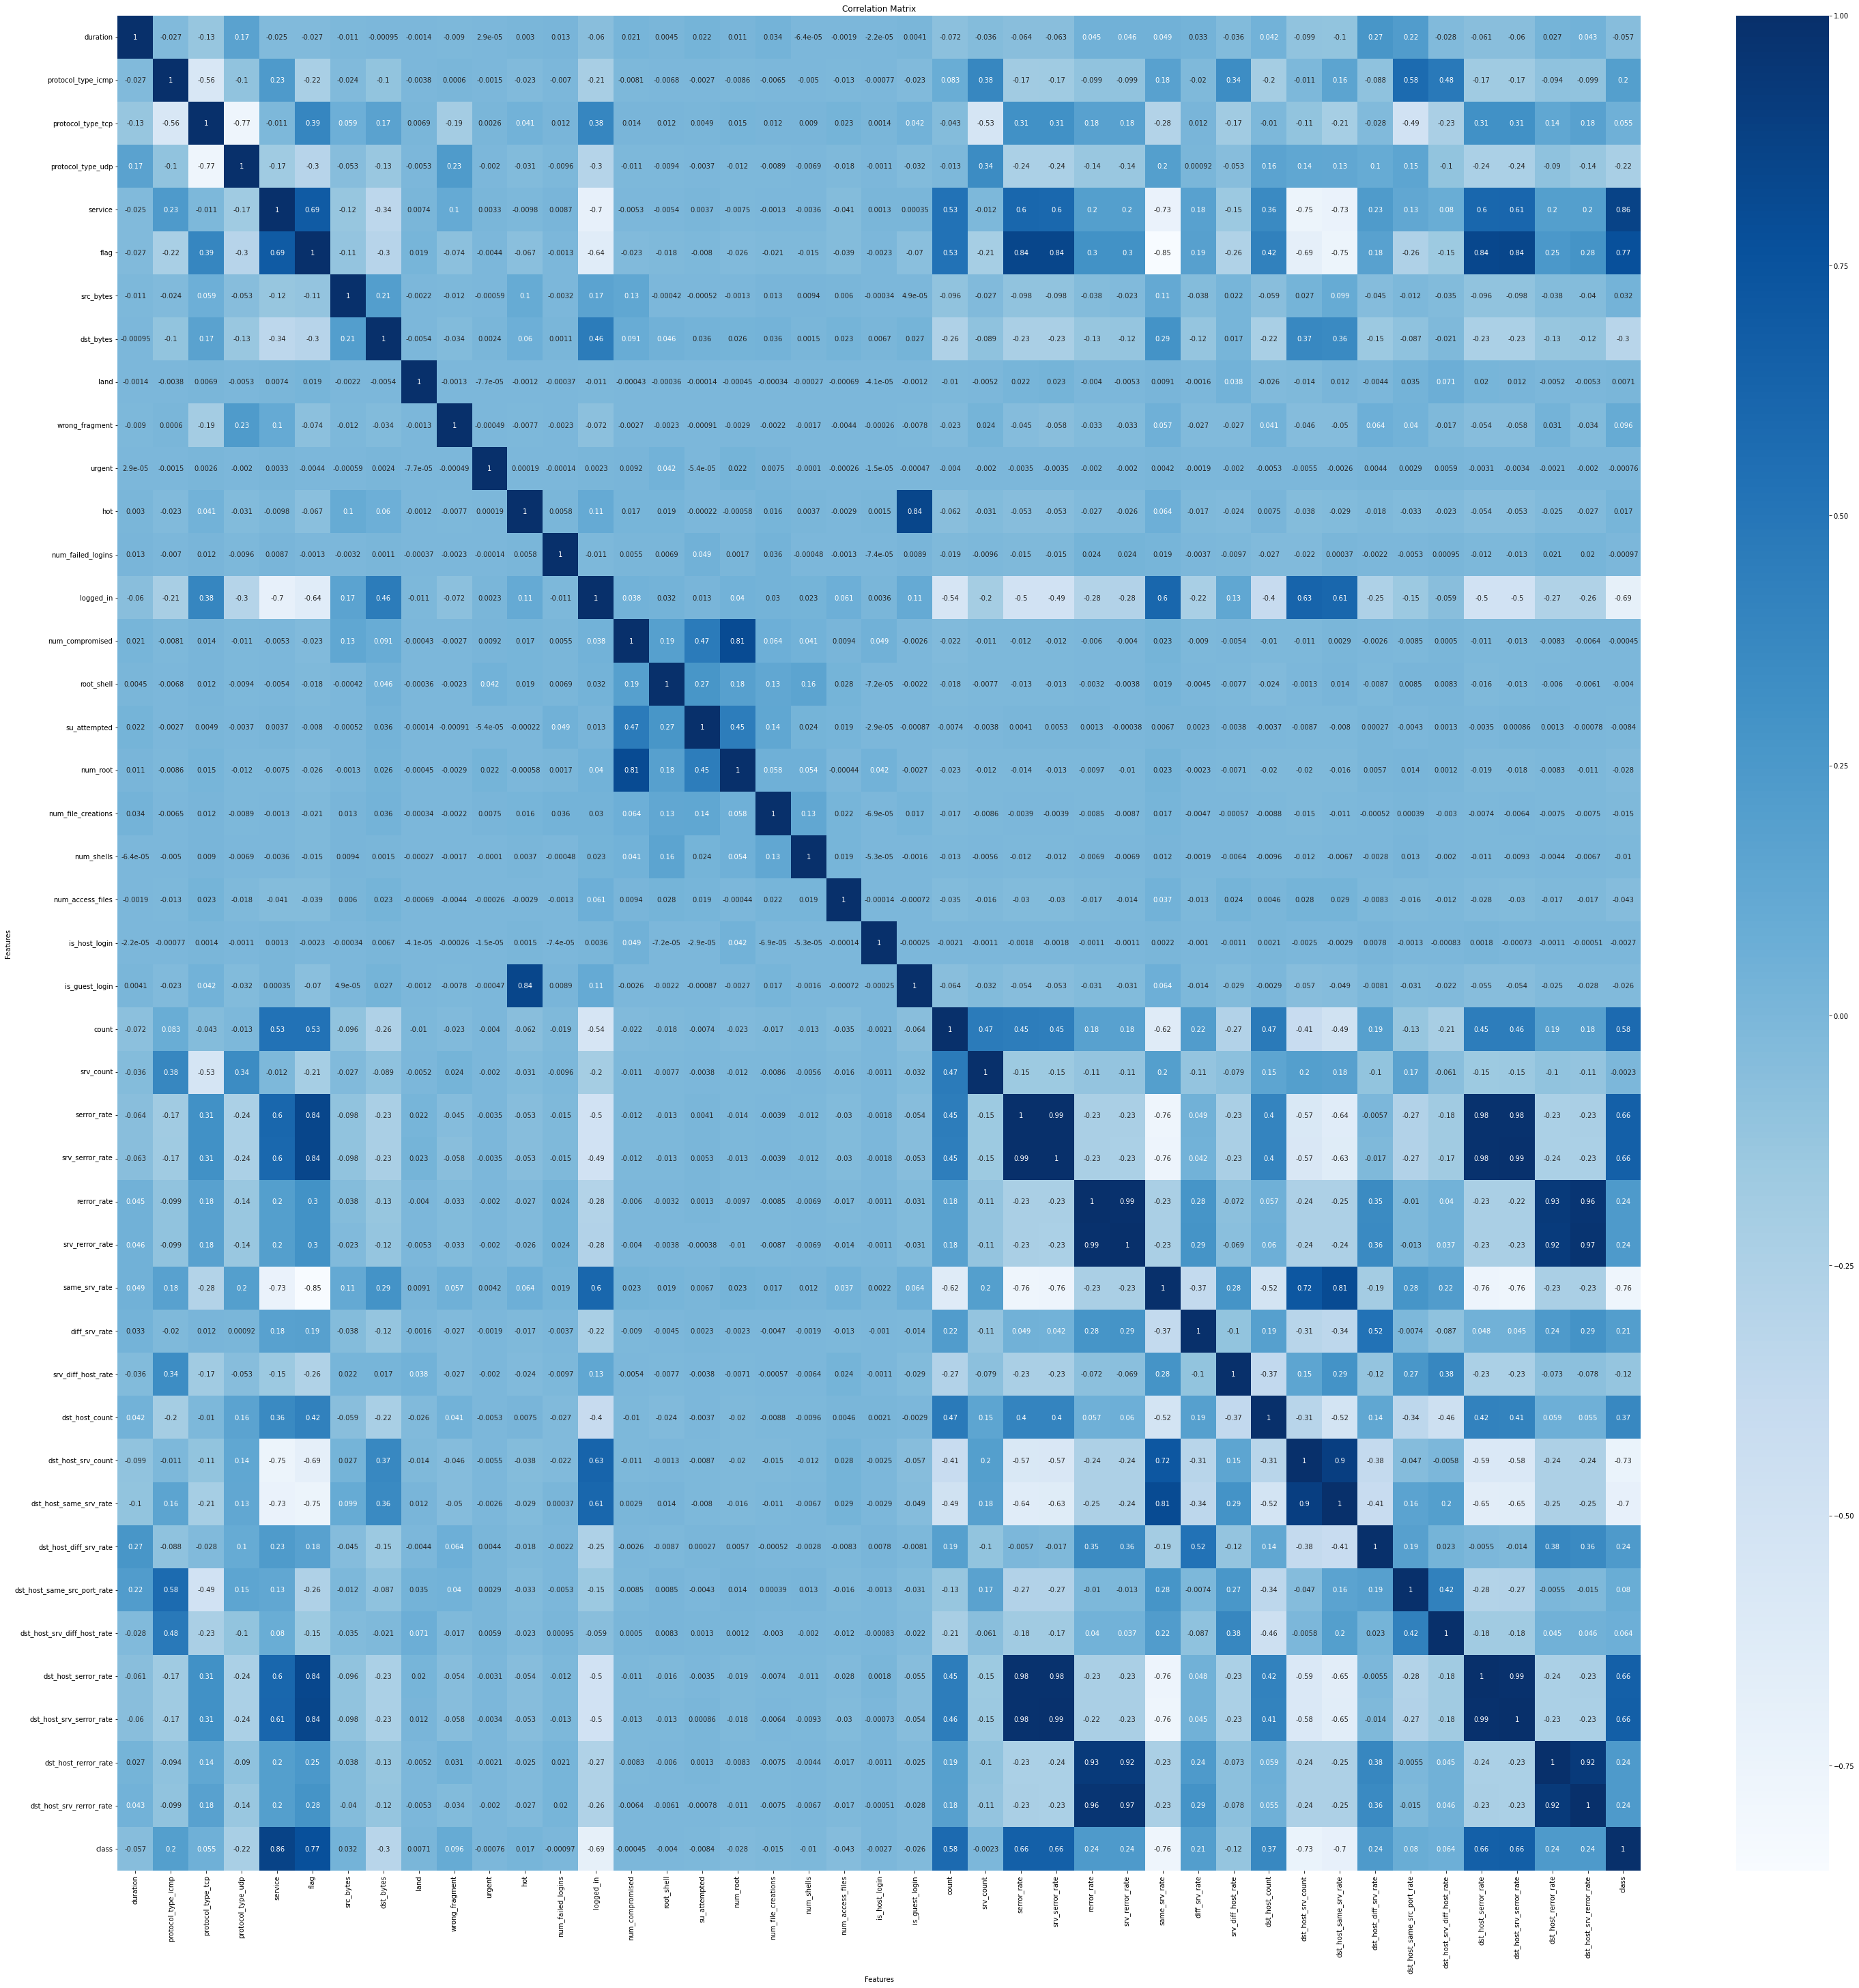

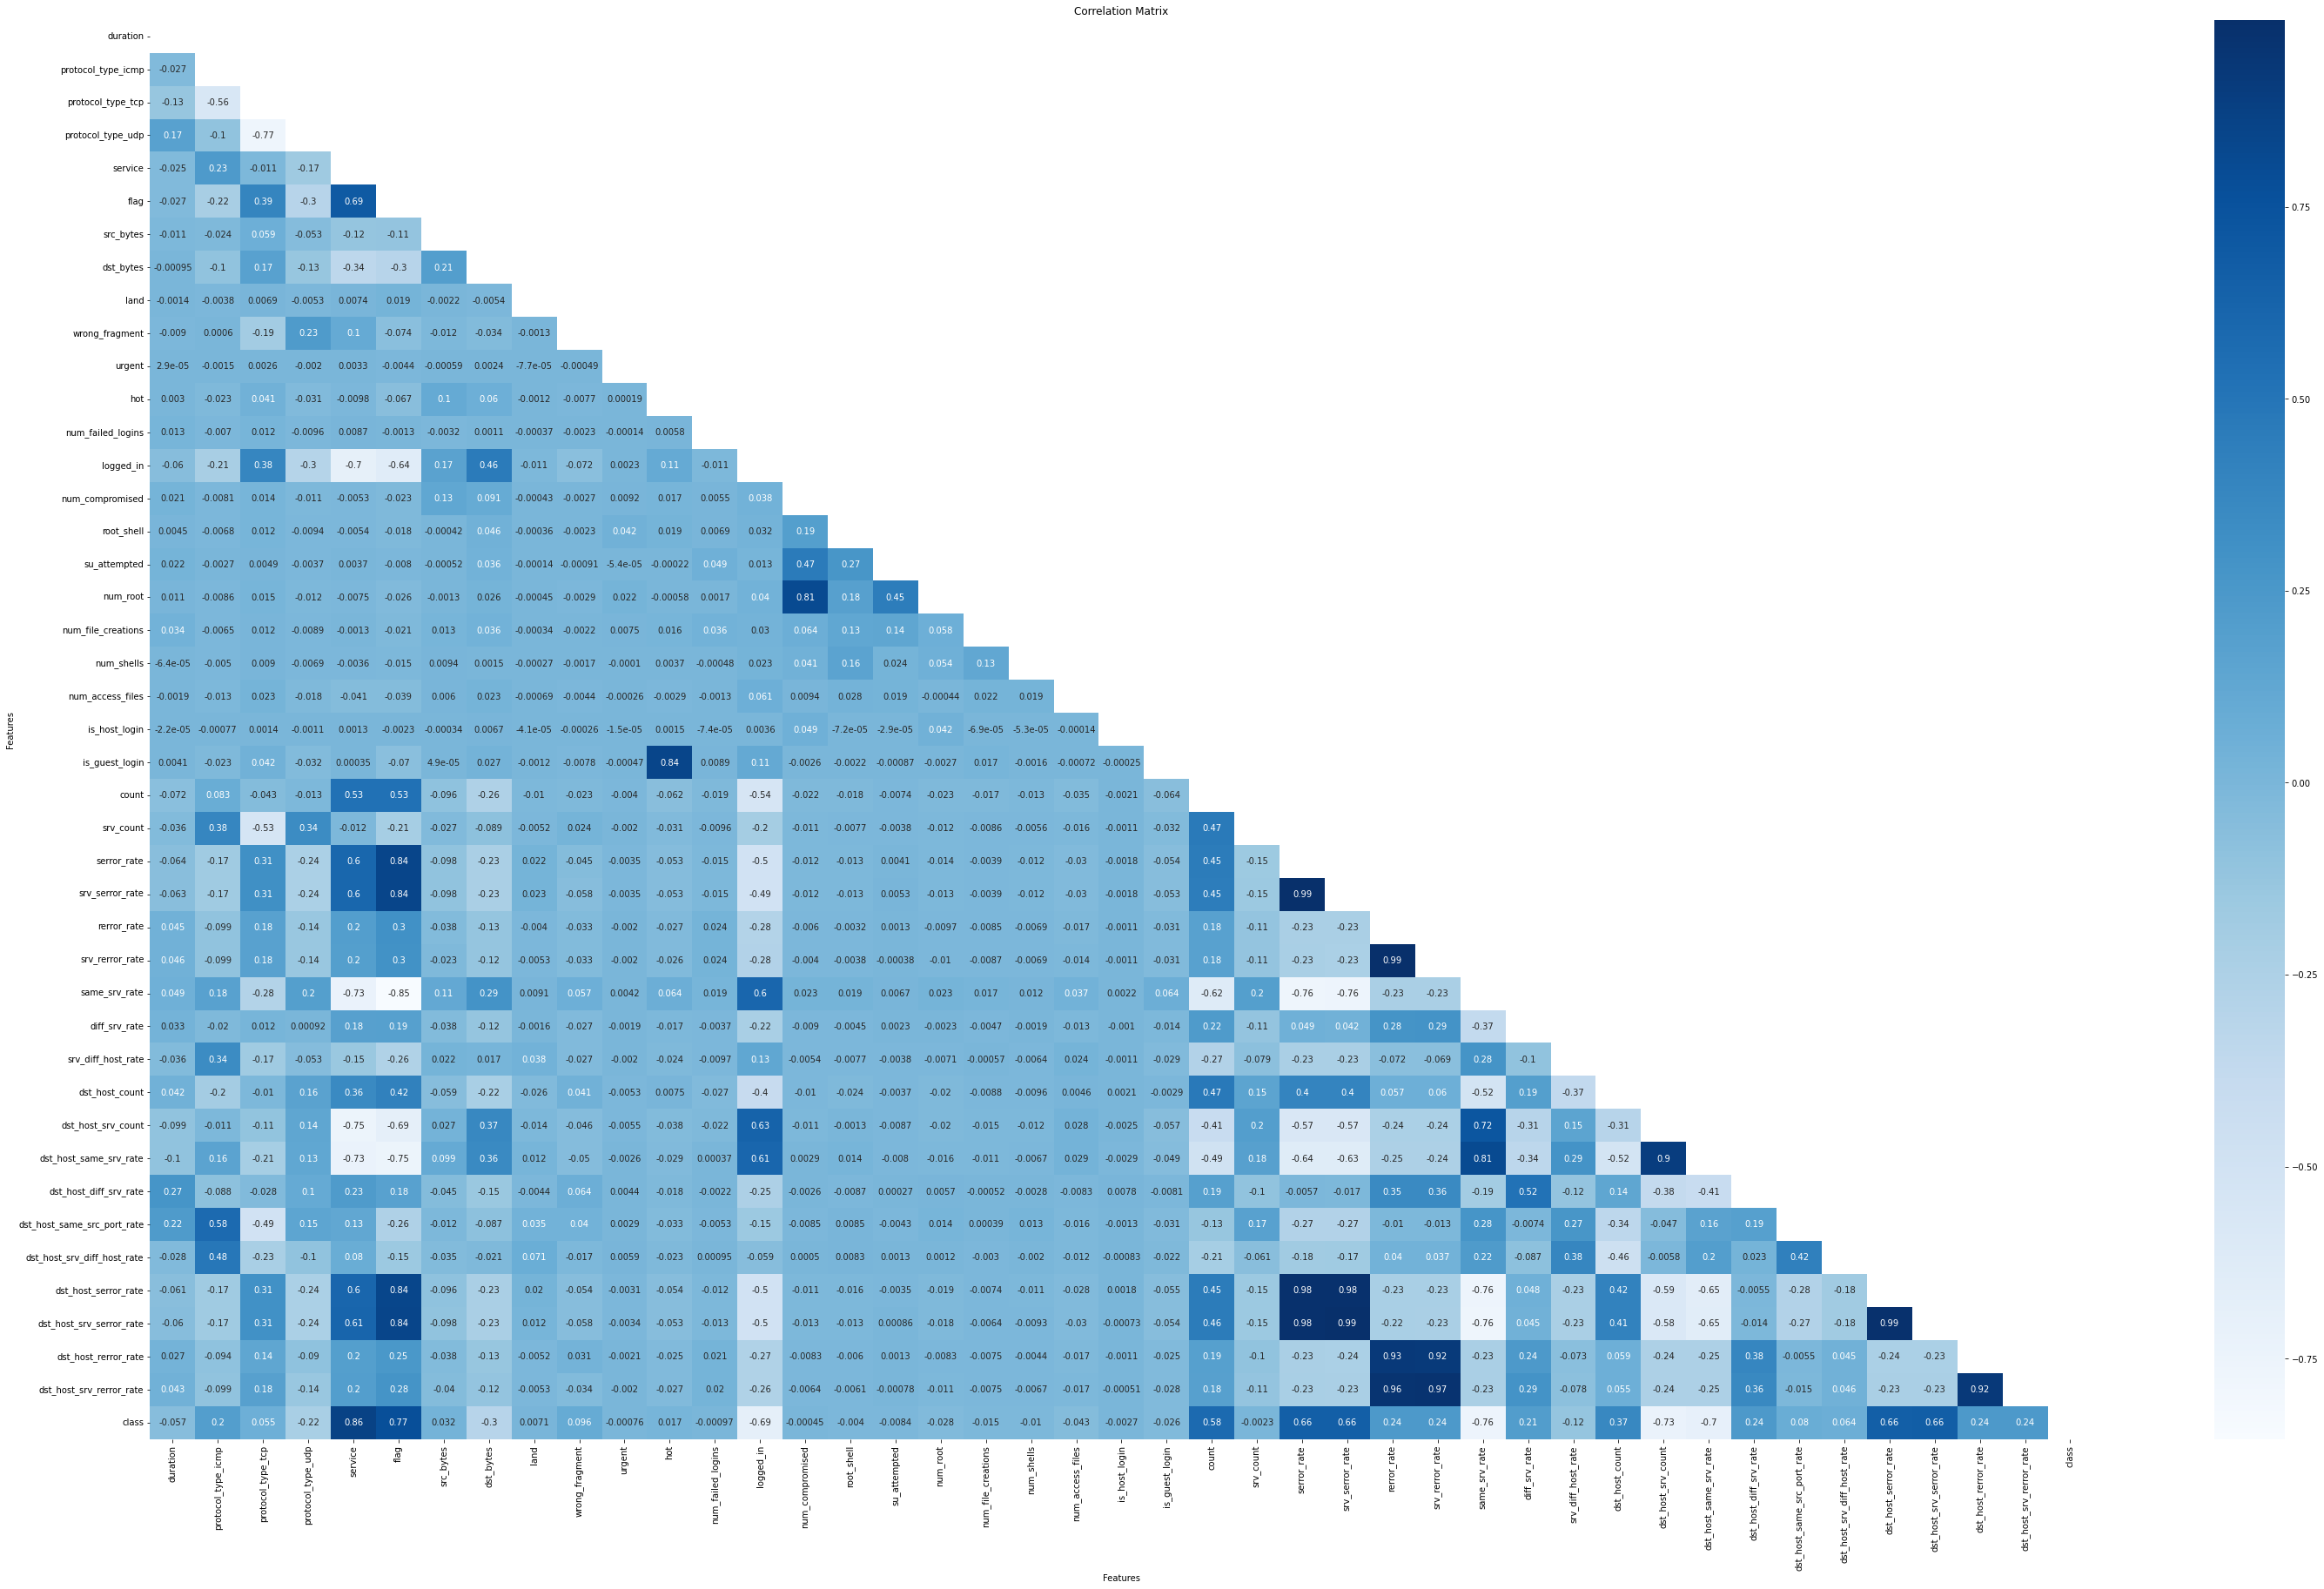

In [110]:
plot_correlationMatrix(train_data_corr,"Correlation Matrix")

In [111]:
#Feature Filtering - Removing Features which are highly correlated by choosing a threshold of 0.95
#https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
correlated_features = set()
for i in range(len(train_data_corr.columns)):
    for j in range(i):
        if abs(train_data_corr.iloc[i, j]) > 0.90:
            print(train_data_corr.columns[i],train_data_corr.columns[j])
            colname = train_data_corr.columns[i]
            correlated_features.add(colname)
print(correlated_features)

srv_serror_rate serror_rate
srv_rerror_rate rerror_rate
dst_host_serror_rate serror_rate
dst_host_serror_rate srv_serror_rate
dst_host_srv_serror_rate serror_rate
dst_host_srv_serror_rate srv_serror_rate
dst_host_srv_serror_rate dst_host_serror_rate
dst_host_rerror_rate rerror_rate
dst_host_rerror_rate srv_rerror_rate
dst_host_srv_rerror_rate rerror_rate
dst_host_srv_rerror_rate srv_rerror_rate
dst_host_srv_rerror_rate dst_host_rerror_rate
{'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'dst_host_srv_rerror_rate'}


In [112]:
#Feature Filtering - Removing Features which are highly correlated by choosing a threshold of 0.95
#https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
correlated_features = set()
class_feature = len(train_data_corr.columns)-1
for i in range(len(train_data_corr.columns)):
    for j in range(i):
        if abs(train_data_corr.iloc[i, j]) > 0.90:
            print(train_data_corr.columns[i],train_data_corr.columns[j])
            if abs(train_data_corr.iloc[i,class_feature]) > abs(train_data_corr.iloc[j,class_feature]):
                colname = train_data_corr.columns[j]
            else:
                colname = train_data_corr.columns[i]
            correlated_features.add(colname)
print(correlated_features)

srv_serror_rate serror_rate
srv_rerror_rate rerror_rate
dst_host_serror_rate serror_rate
dst_host_serror_rate srv_serror_rate
dst_host_srv_serror_rate serror_rate
dst_host_srv_serror_rate srv_serror_rate
dst_host_srv_serror_rate dst_host_serror_rate
dst_host_rerror_rate rerror_rate
dst_host_rerror_rate srv_rerror_rate
dst_host_srv_rerror_rate rerror_rate
dst_host_srv_rerror_rate srv_rerror_rate
dst_host_srv_rerror_rate dst_host_rerror_rate
{'dst_host_rerror_rate', 'rerror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'dst_host_srv_rerror_rate', 'serror_rate'}


In [113]:
correlated_features = list(correlated_features)

In [114]:
correlated_features

['dst_host_rerror_rate',
 'rerror_rate',
 'dst_host_serror_rate',
 'srv_serror_rate',
 'dst_host_srv_rerror_rate',
 'serror_rate']

In [115]:
train_data.drop(columns = correlated_features, inplace=True,axis=1)

In [116]:
train_data.shape

(122637, 37)

In [117]:
test_data.drop(columns = correlated_features, inplace=True,axis=1)
test_data.shape

(22544, 37)

In [118]:
train_data.to_csv("Processed_train_data.csv",index=False)
test_data.to_csv("Processed_test_data.csv",index=False)

In [119]:
test_data["class"].value_counts()

1    12833
0     9711
Name: class, dtype: int64

In [120]:
req_columns = train_data.columns
req_columns

Index(['duration', 'protocol_type_icmp', 'protocol_type_tcp',
       'protocol_type_udp', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
       'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'class'],
      dtype='object')

In [122]:
req_columns = list(req_columns)
pickle.dump(req_columns, open('req_columns.pkl', 'wb'))